In [77]:
import numpy as np
import matplotlib
from matplotlib.animation import FuncAnimation
import time
import matplotlib.pyplot as plt
import seaborn
import os
import imageio

In [65]:
global t,x,h,u
t = np.arange(0, 100, 0.01)
x = np.arange(0, 10, 0.01)

In [162]:
h = np.zeros((len(t), len(x)))
u = np.zeros((len(t), len(x)))
for i in range(len(t)):
    h[i] = np.multiply(np.sin(x+i), 1000000)
    u[i][0] = 0
    u[i][len(x)-1] = 0
u[0] = np.sin(3*x)

In [173]:
def MakeGif(k, ylim):
    fig, ax = plt.subplots()
    
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax.set_ylabel('temperature', fontsize=17)
    ax.set_xlabel('len of stick', fontsize=17)
    ax.set_ylim(-ylim, ylim)
    ax.set_title('{0} ms'.format(k))
    
    ax.plot(u[k])
    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

In [163]:
start_time = time.time()

for k in range(1, 300):
    for i in range(1, len(x)-1):
        coeffs[i][i] = 1
        coeffs[i][i-1] = deltat/(deltax*deltax + 2*deltat)
        coeffs[i][i+1] = deltat/(deltax*deltax + 2*deltat)
        b[i] = h[k][i]*deltat*deltax*deltax - deltax*deltax*u[k-1][i]
    u[k] = np.linalg.solve(coeffs, b)
    
    if k % 100 == 0:
        print(k)
    
print("--- %s seconds ---" % (time.time() - start_time))

100
200
--- 7.1619977951049805 seconds ---


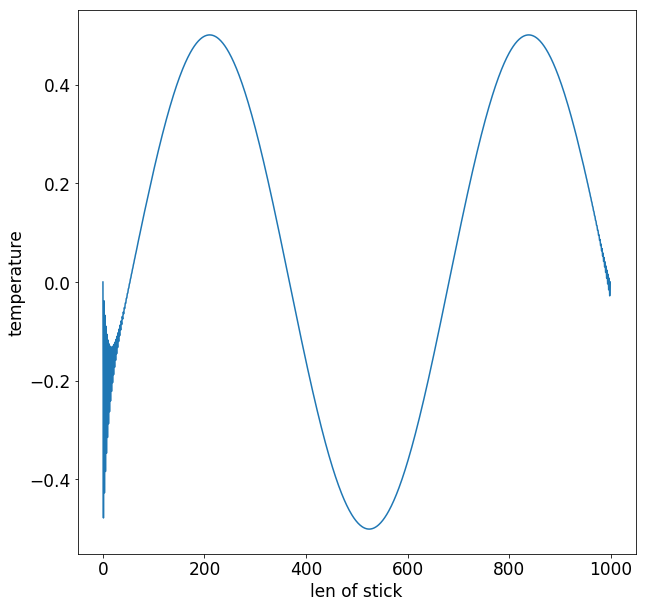

In [166]:
plt.figure(figsize=(10,10))
plt.ylabel('temperature')
plt.xlabel('len of stick')
plt.rcParams.update({'font.size': 17})
plt.plot(u[100])
plt.show()

D:\programming\Anaconda1\envs\NNapr\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


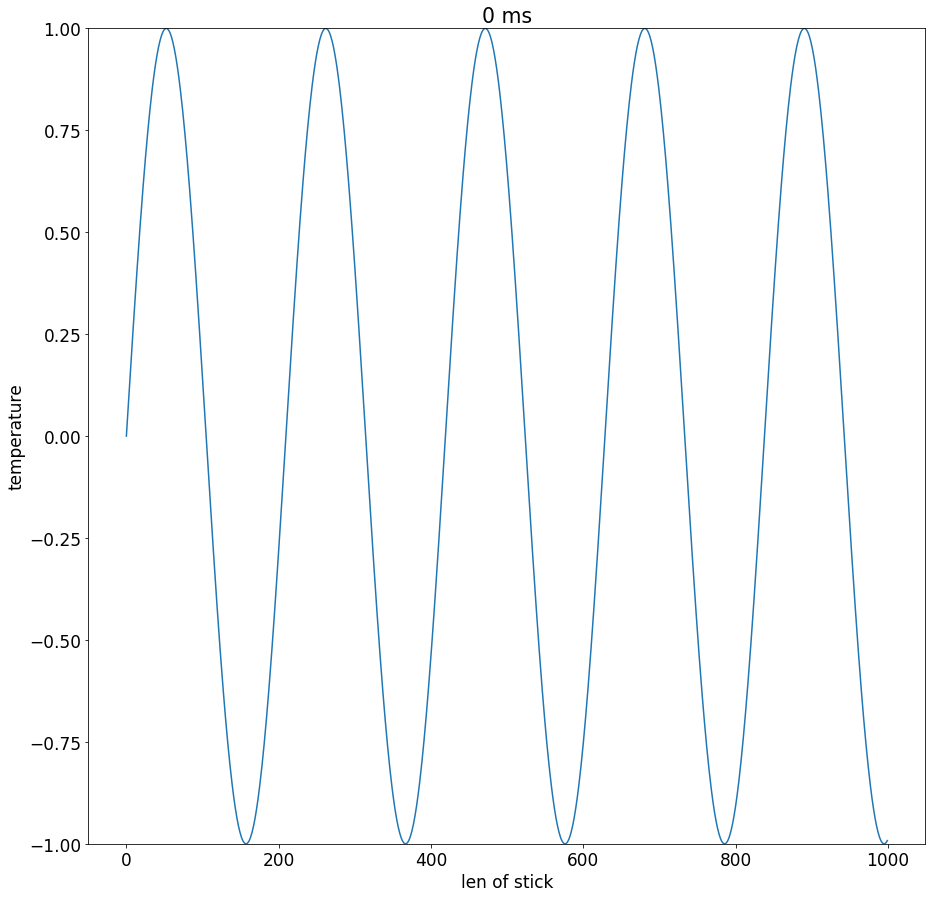

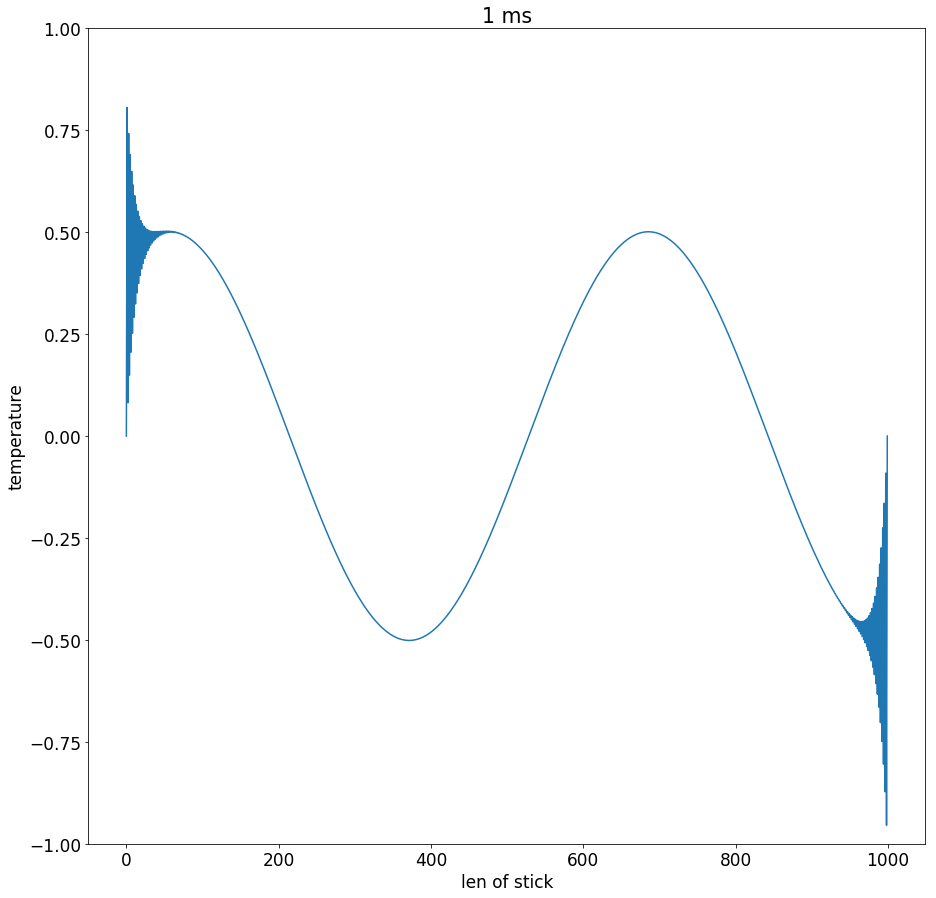

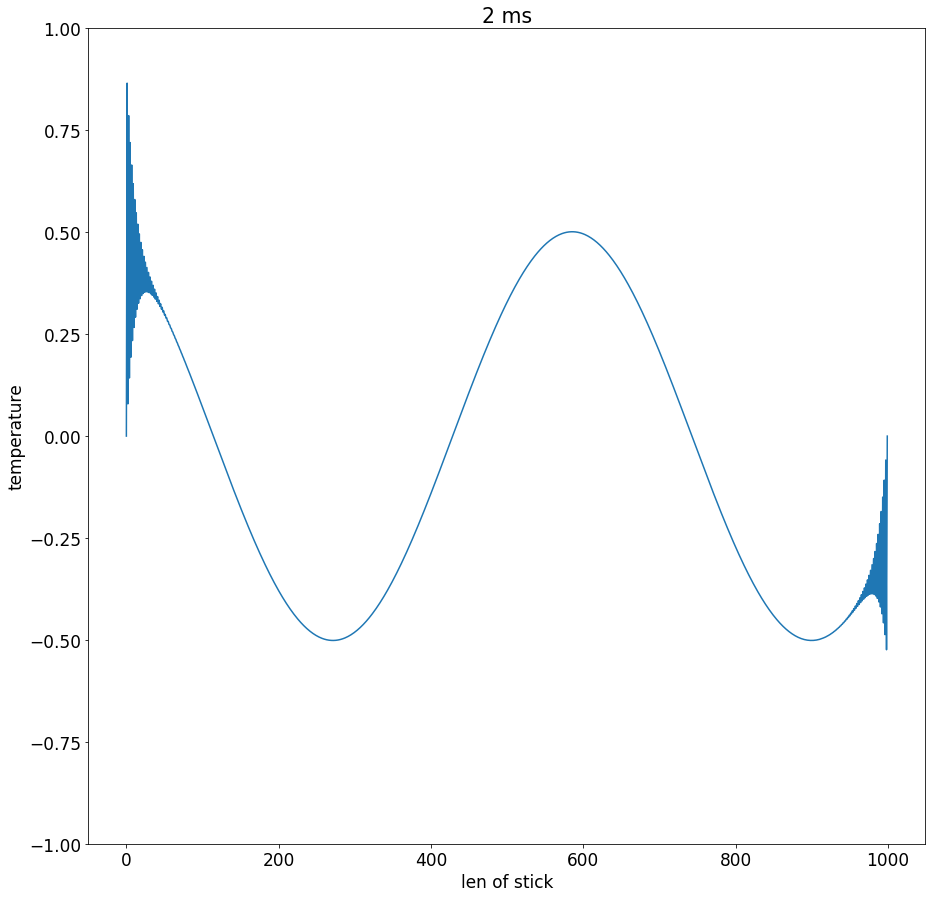

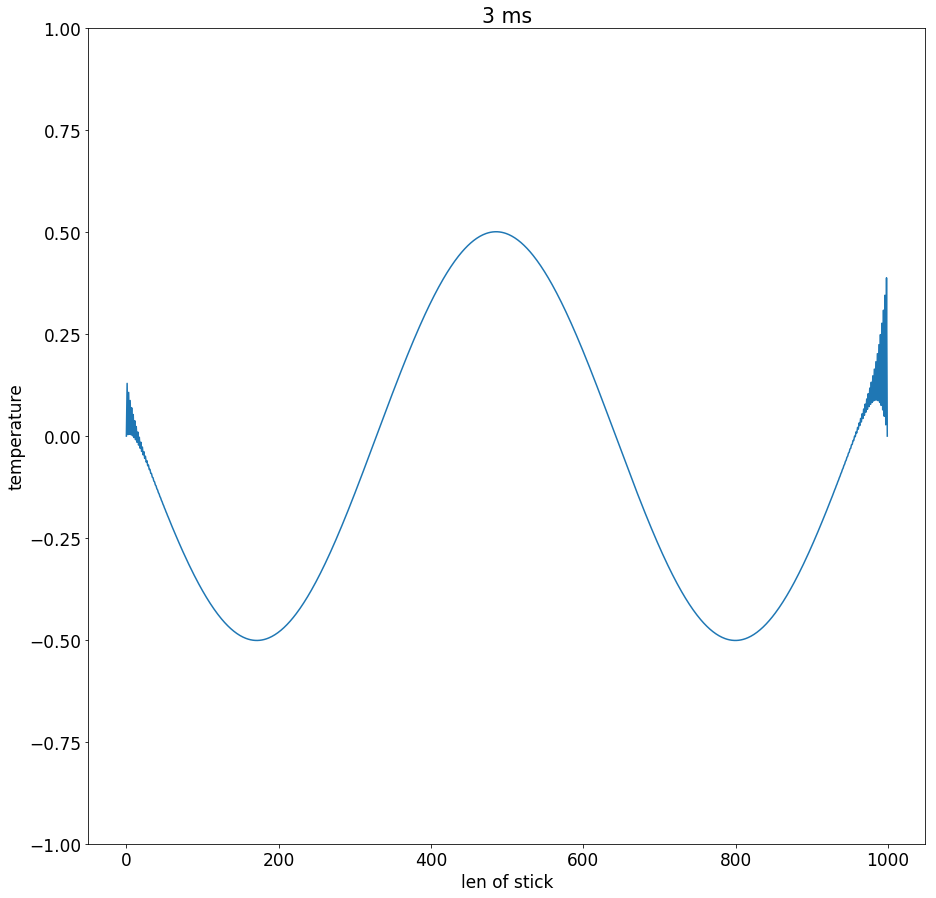

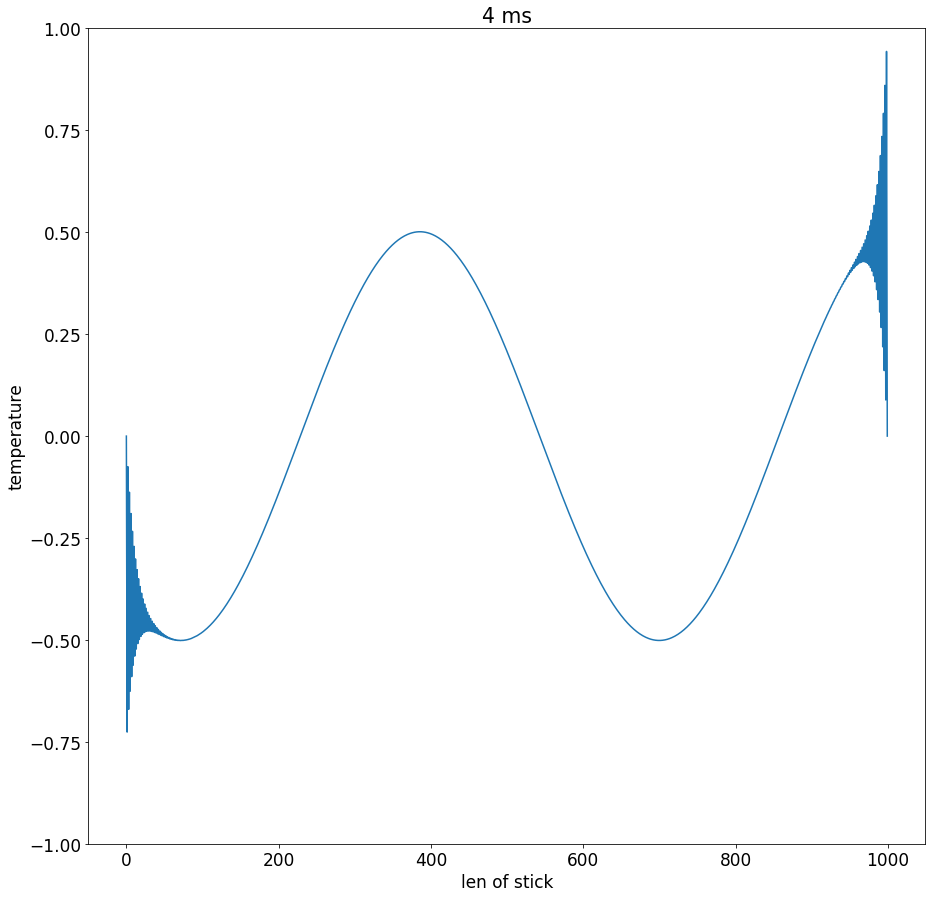

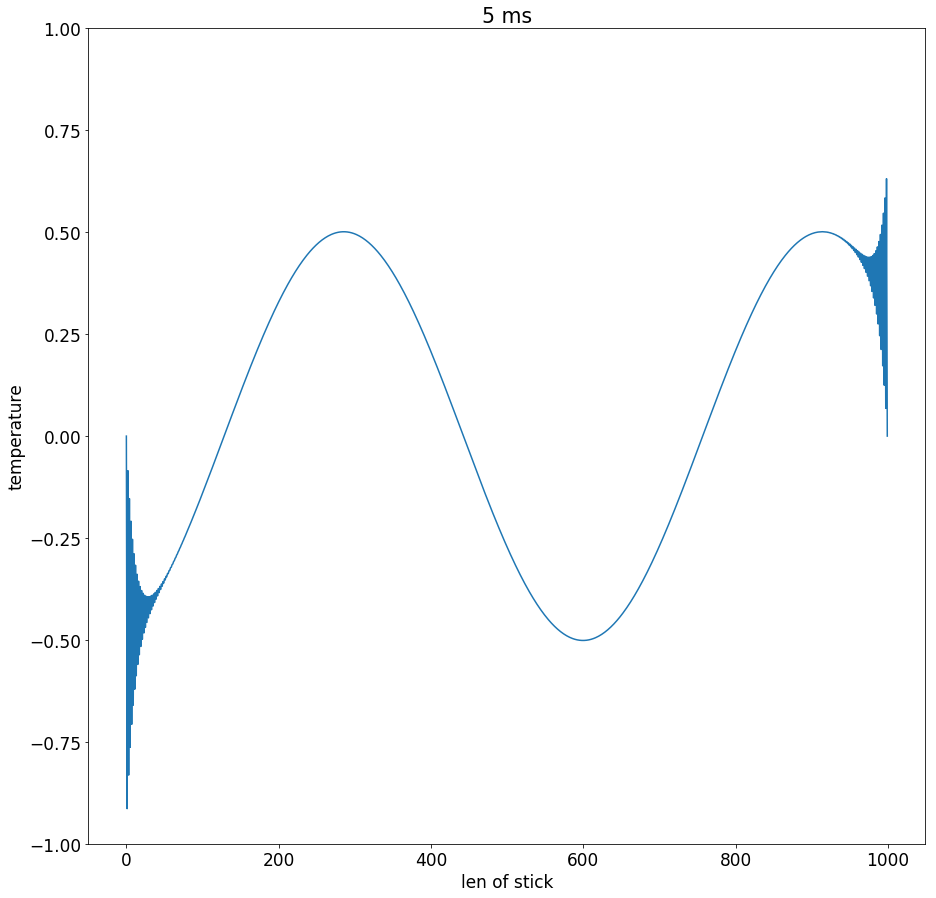

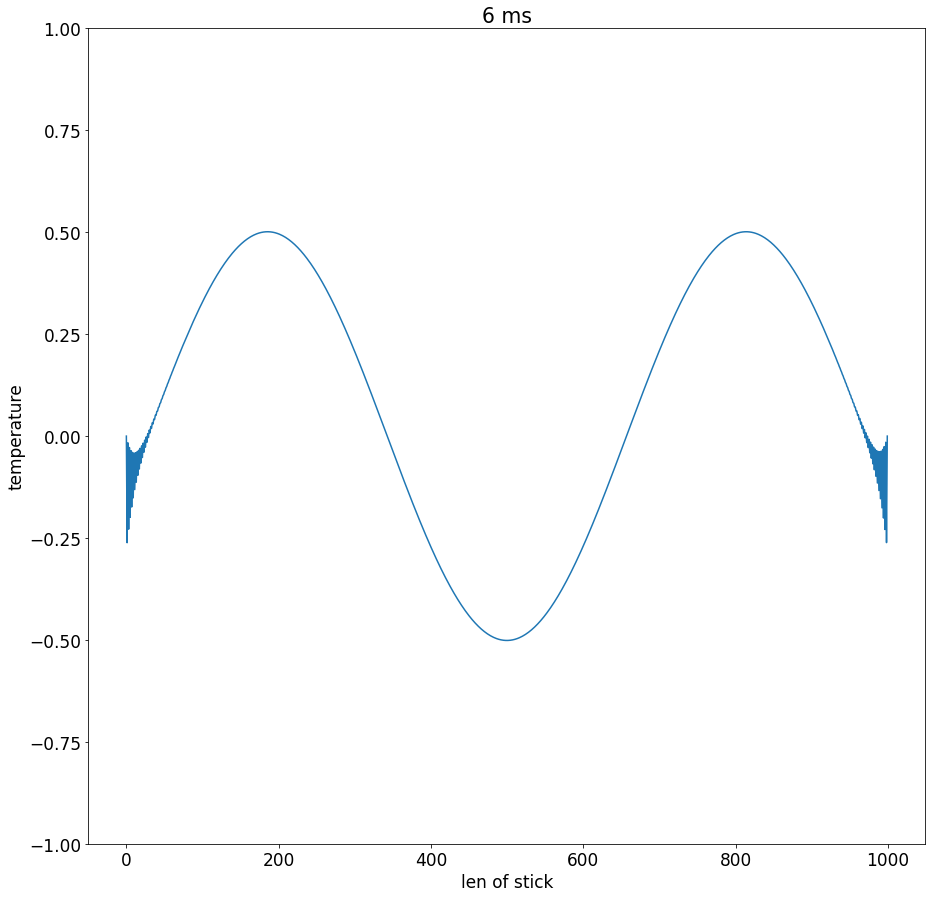

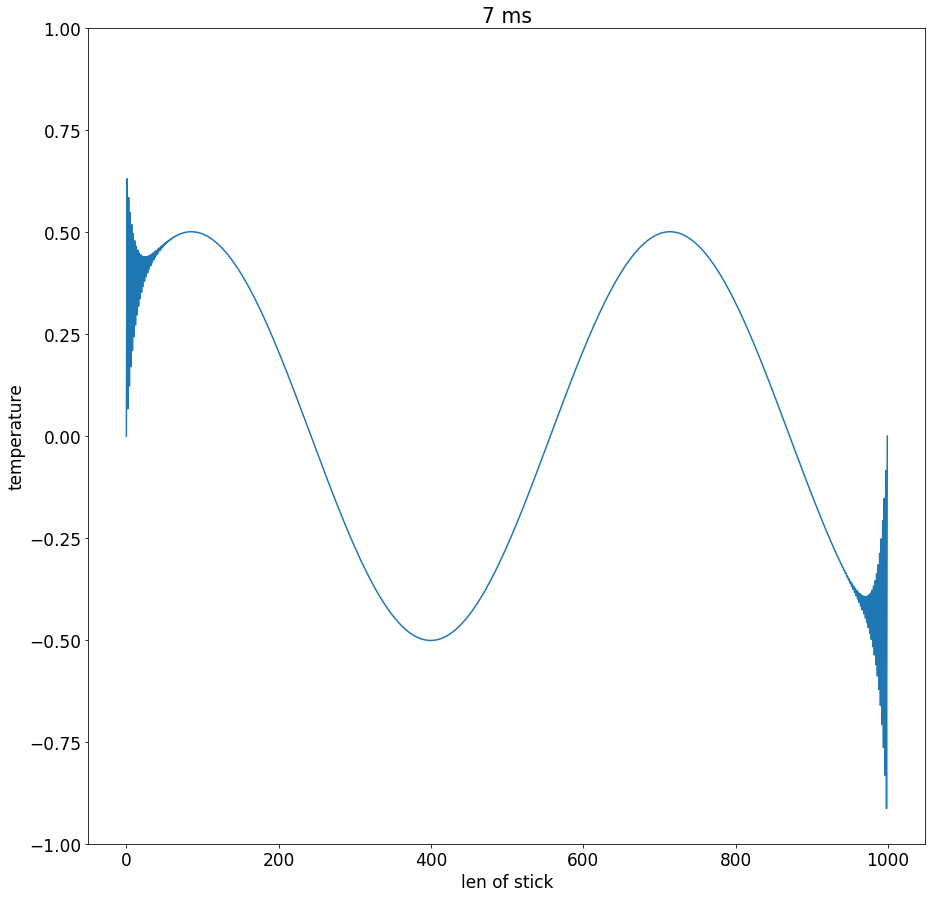

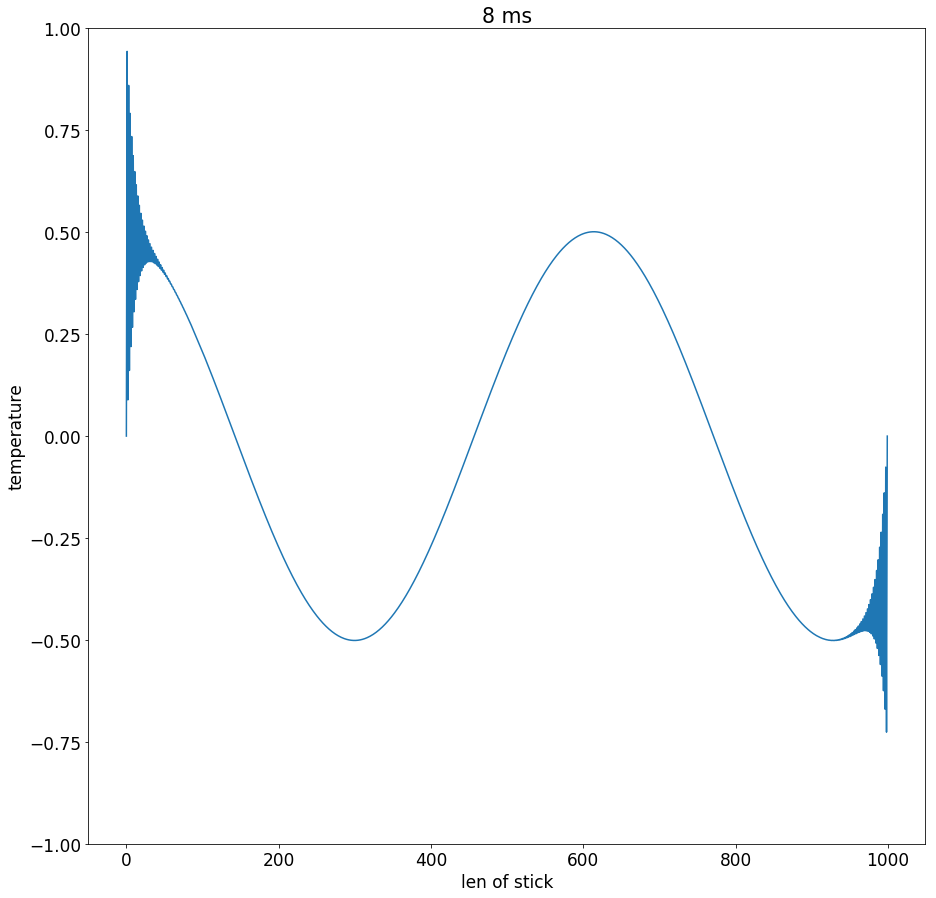

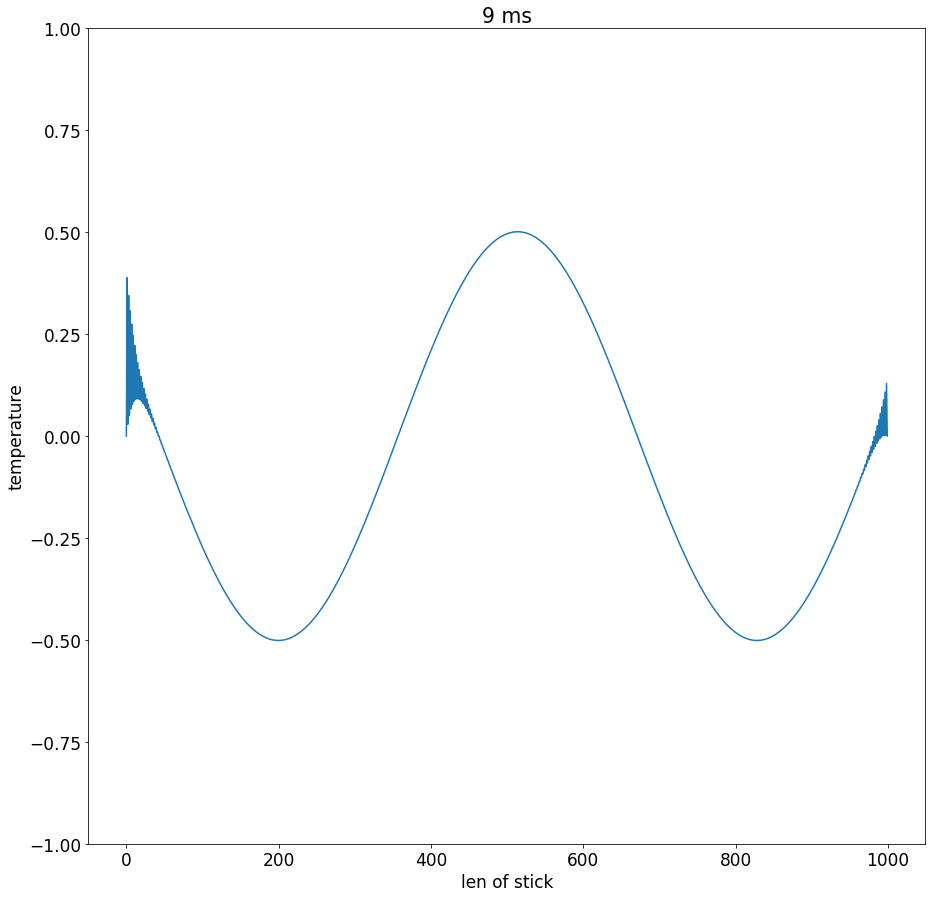

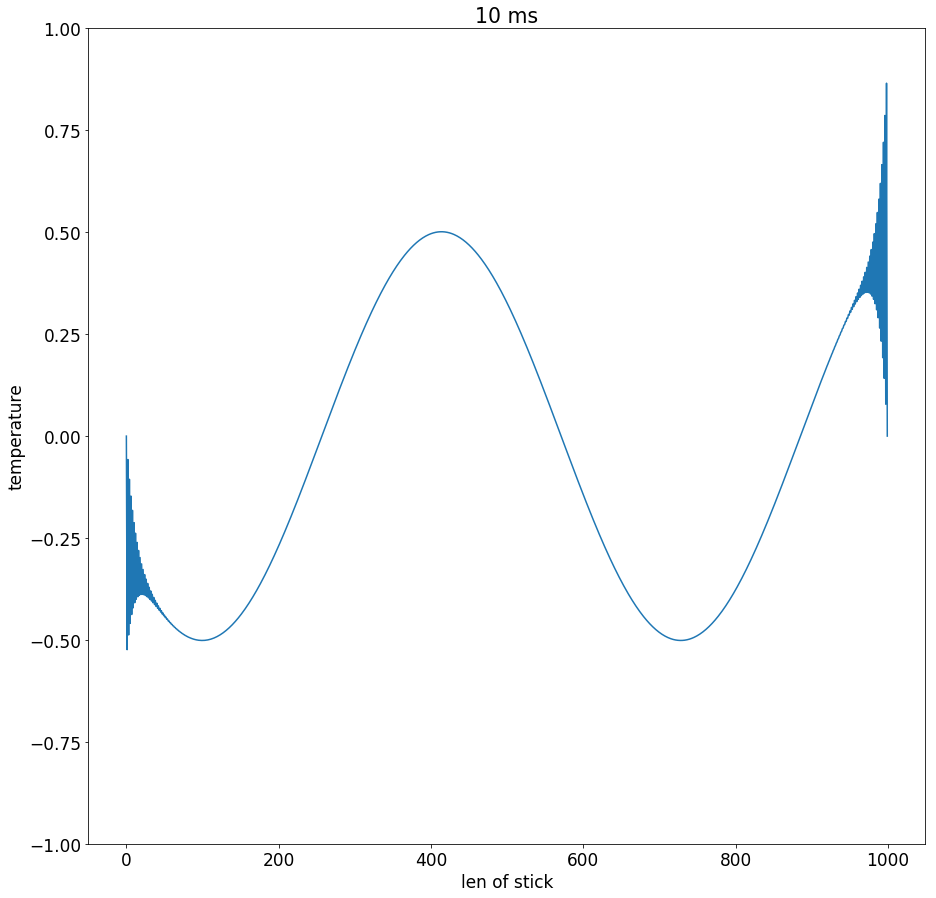

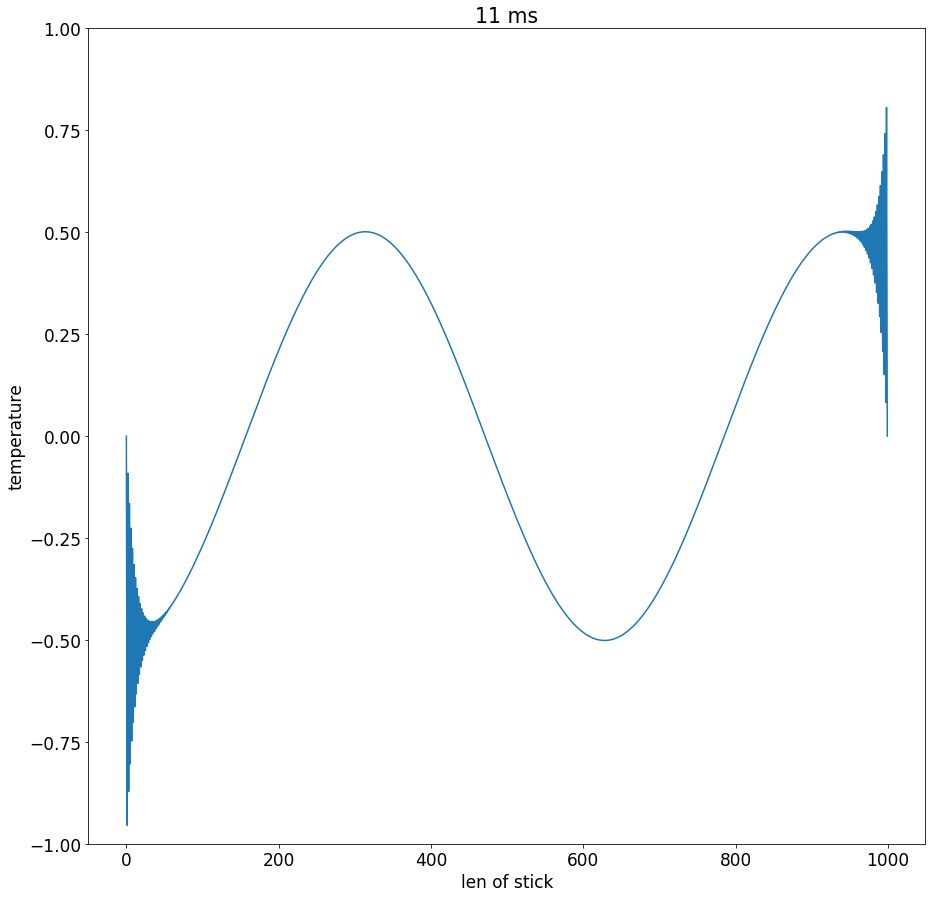

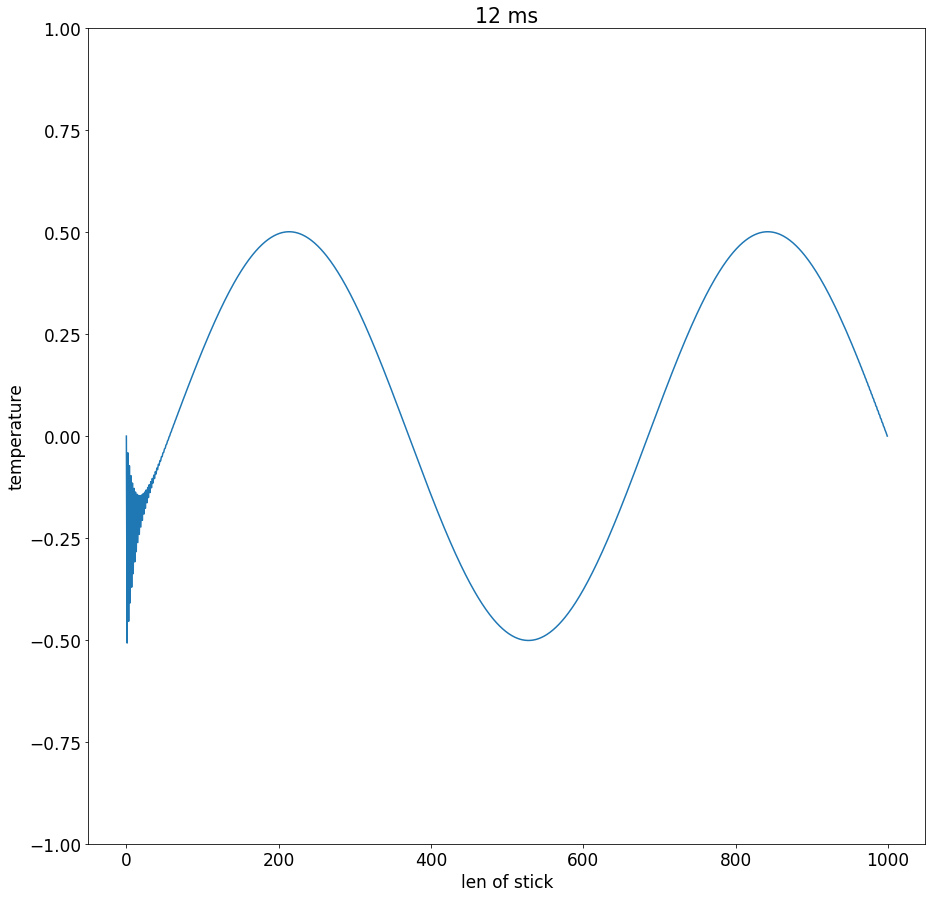

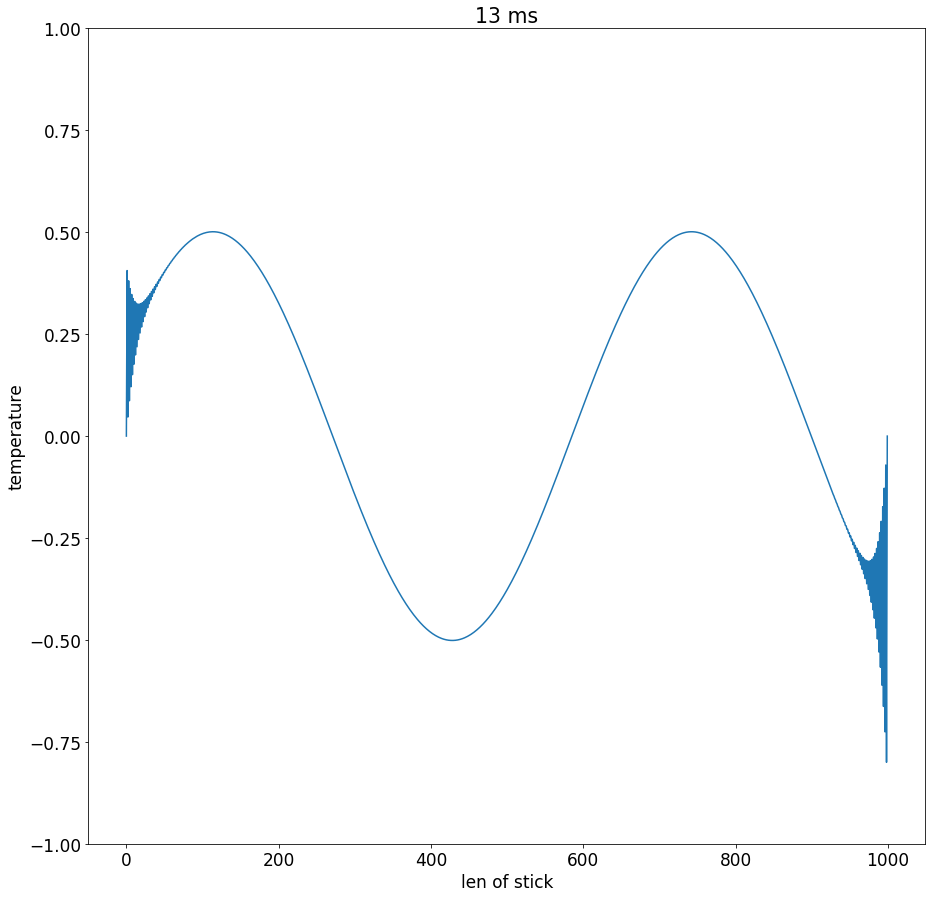

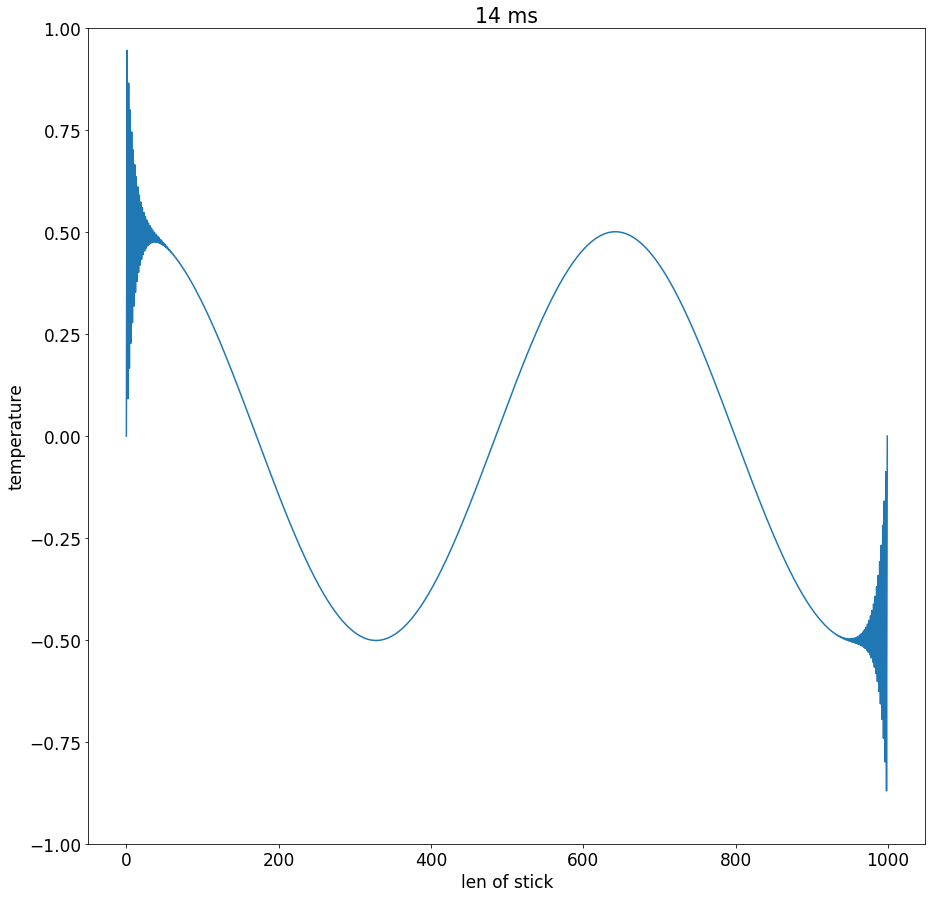

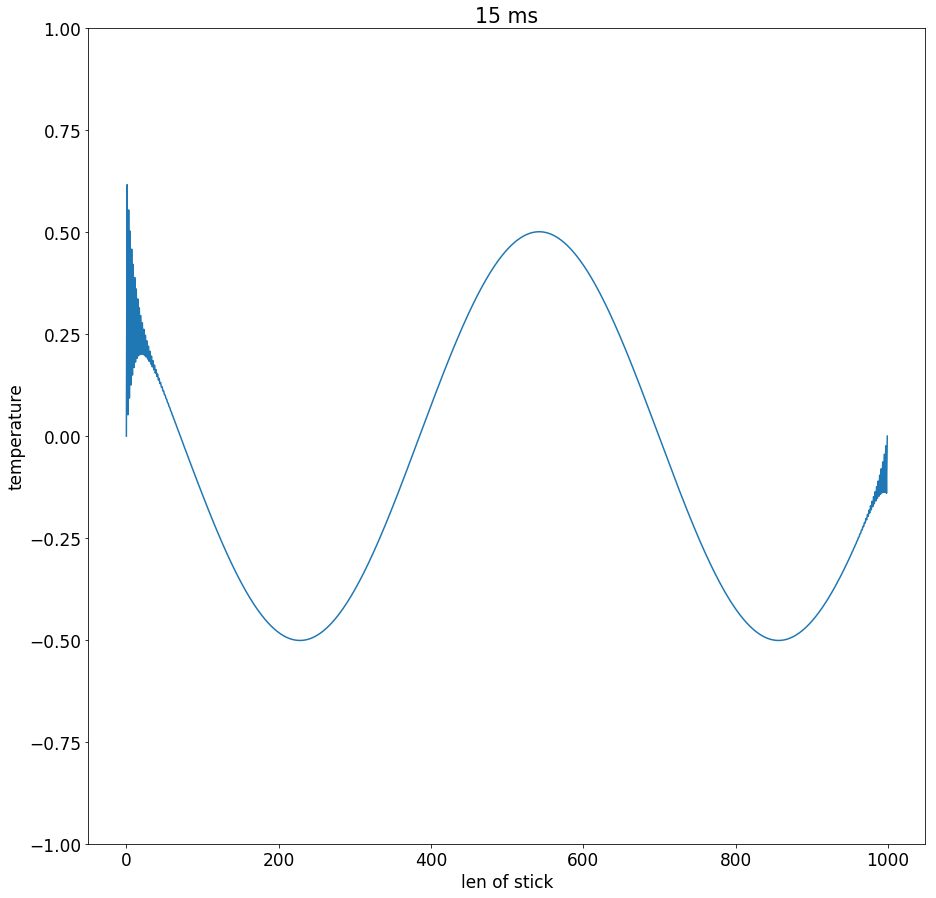

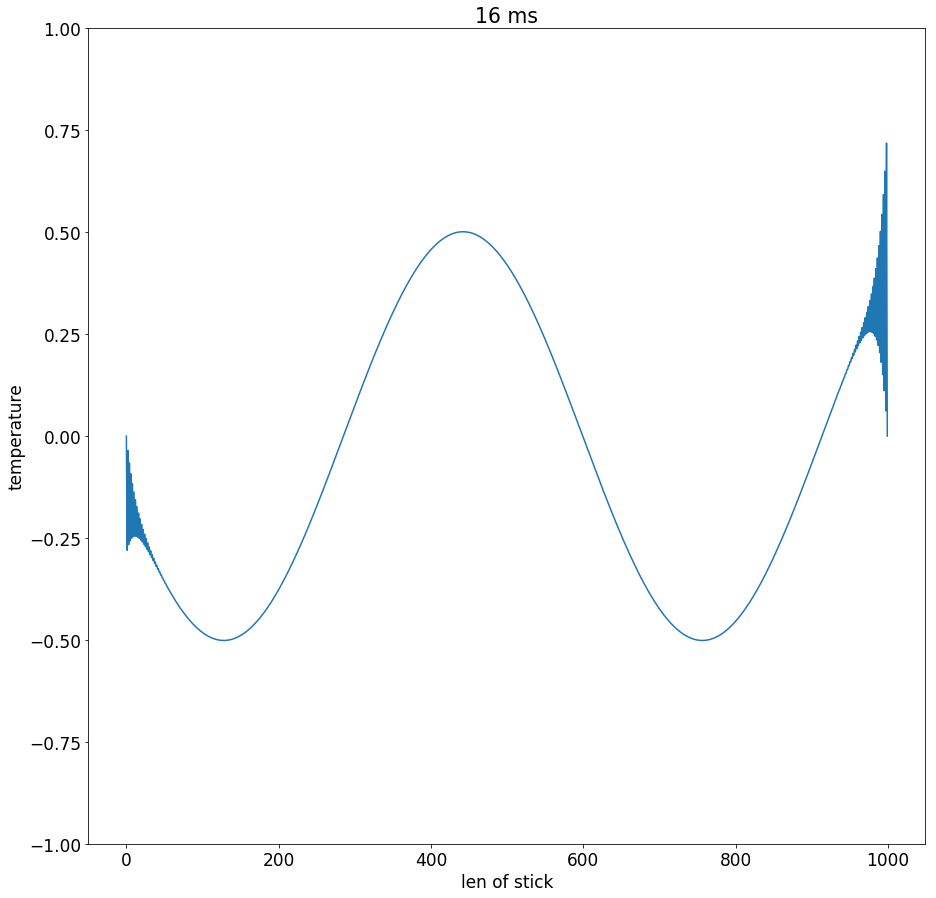

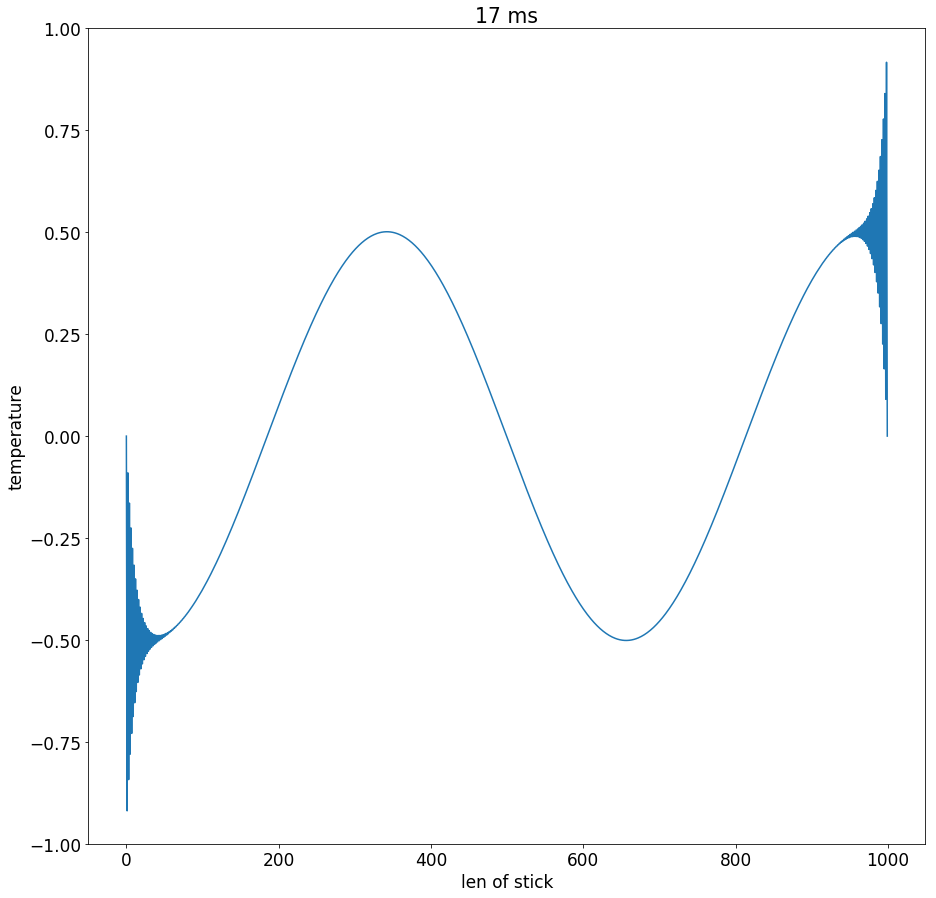

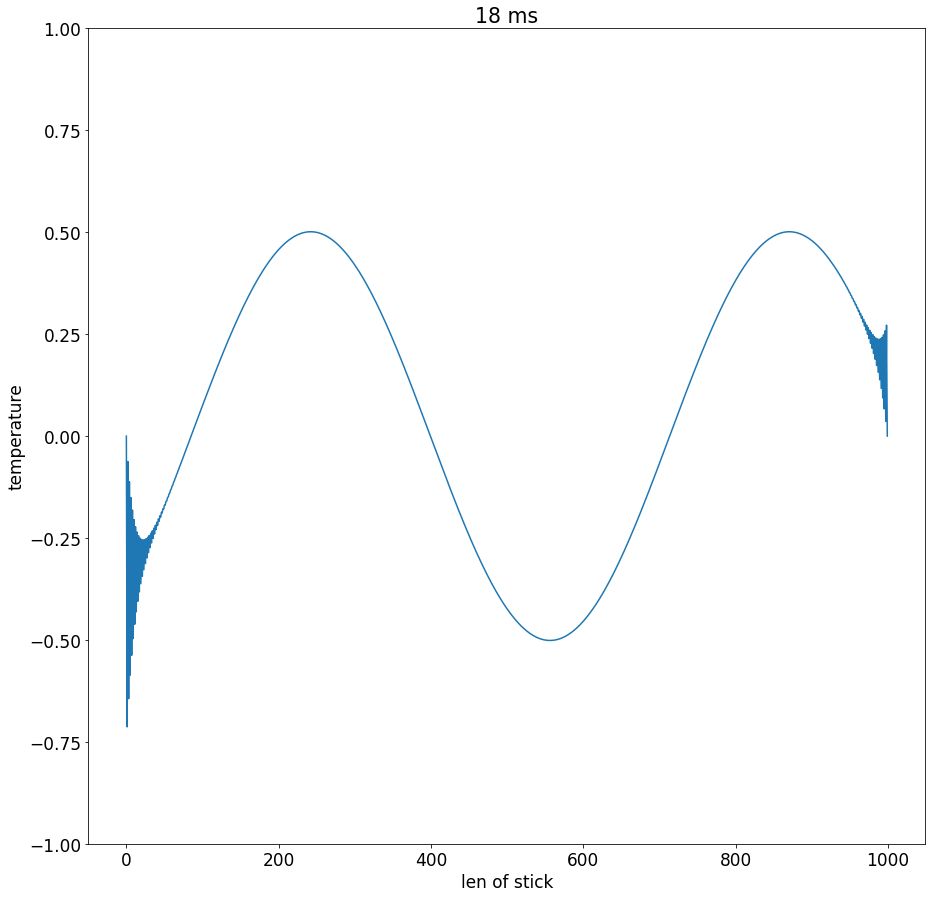

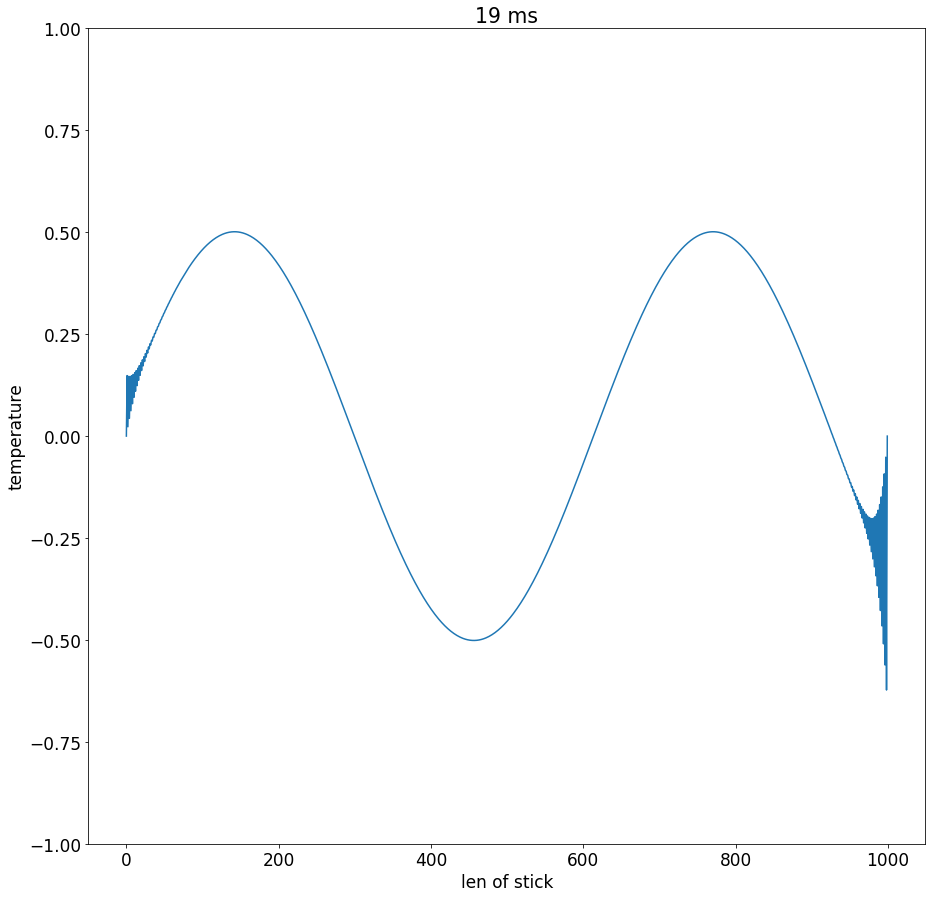

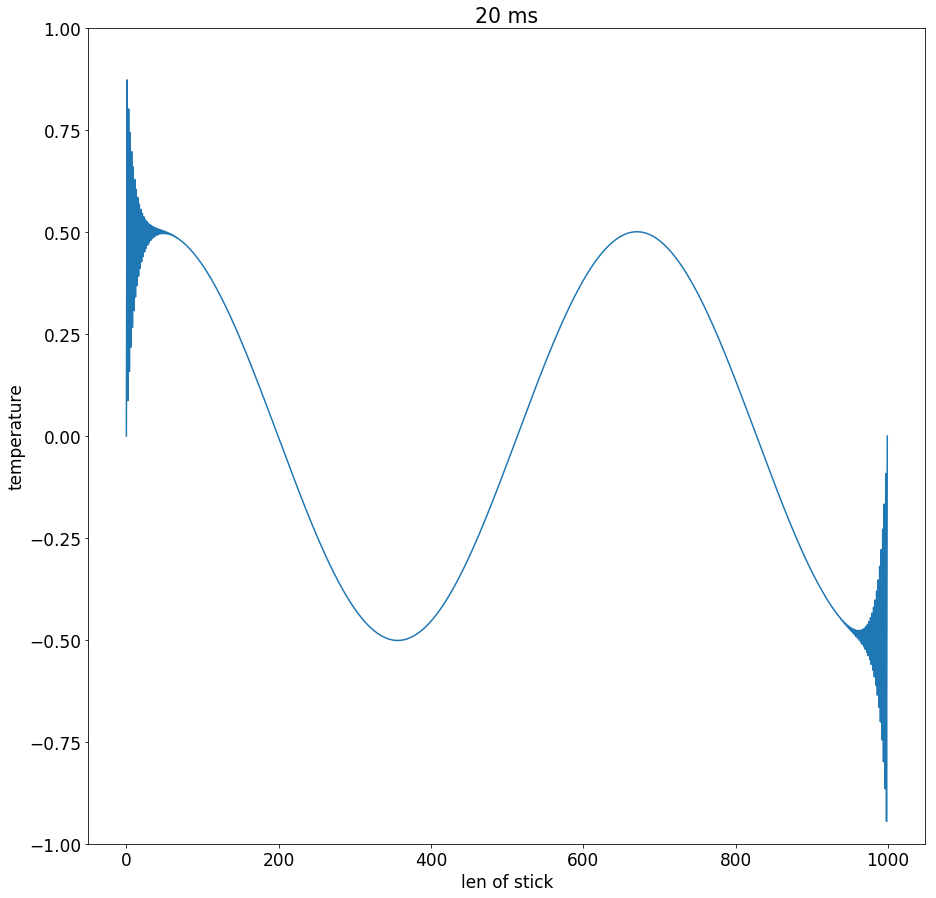

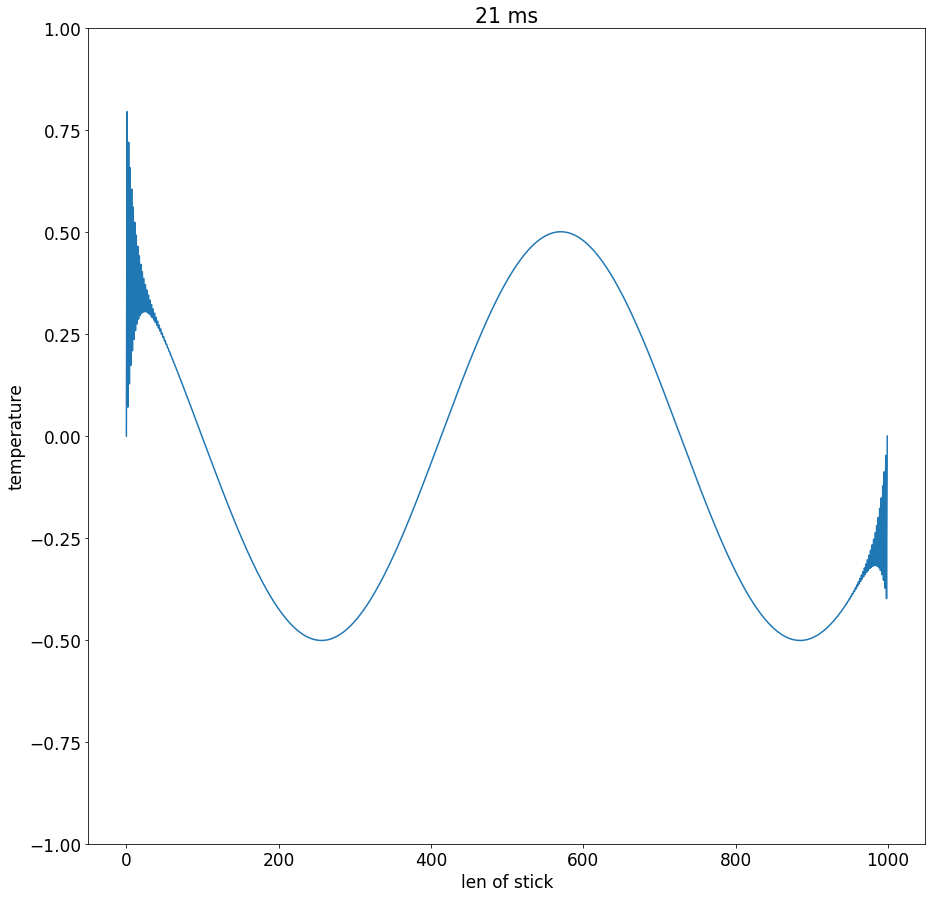

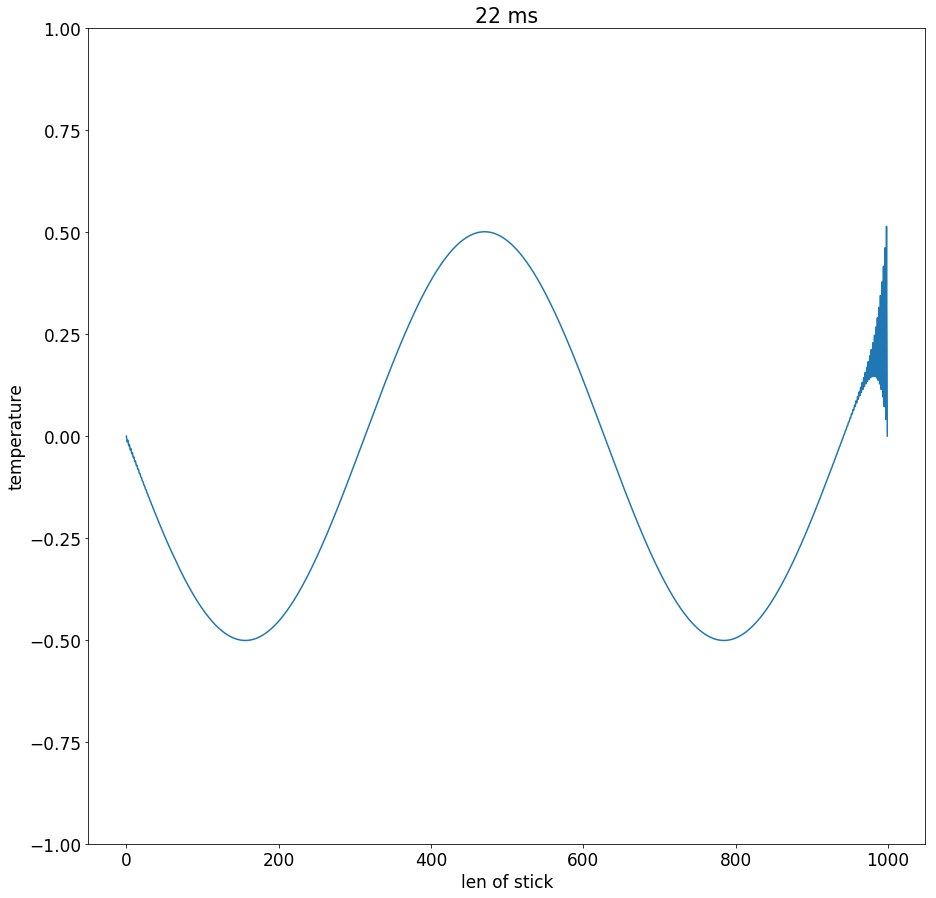

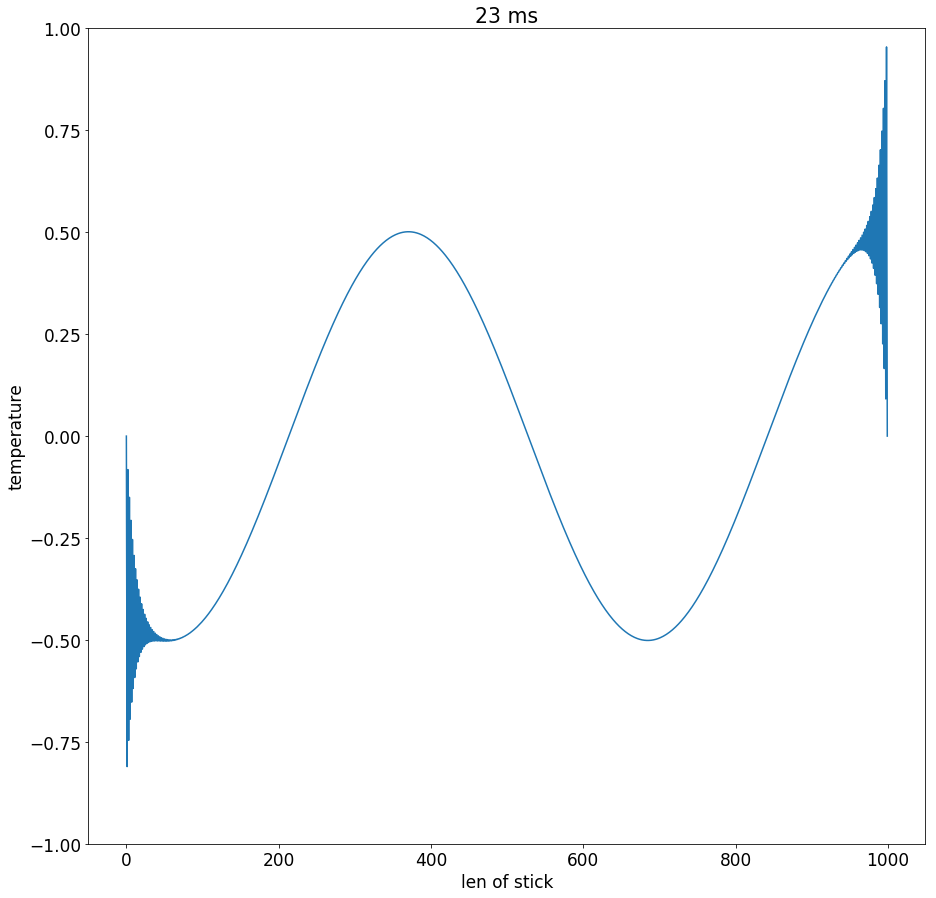

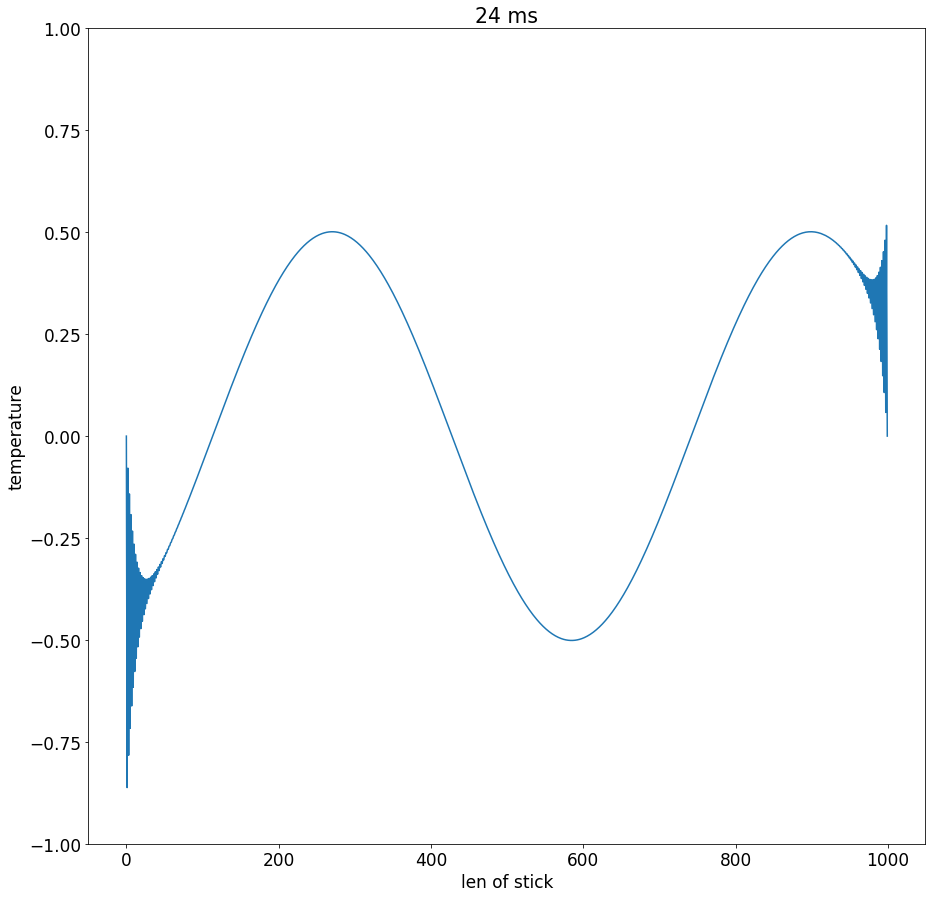

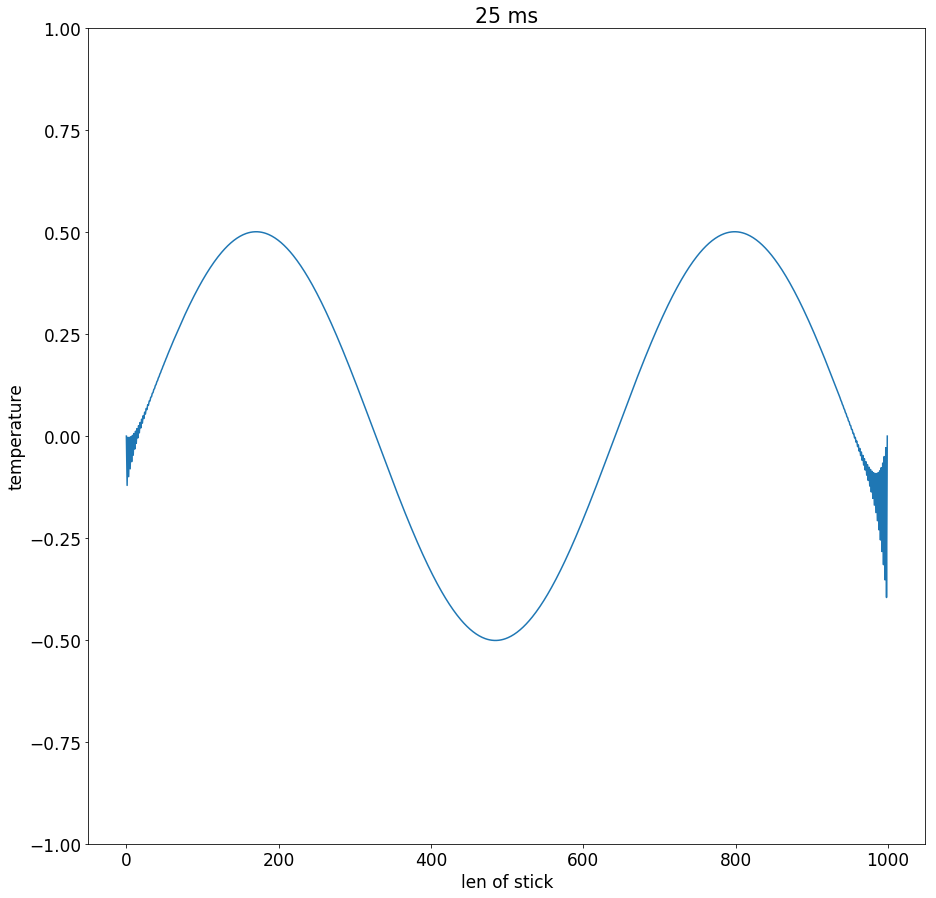

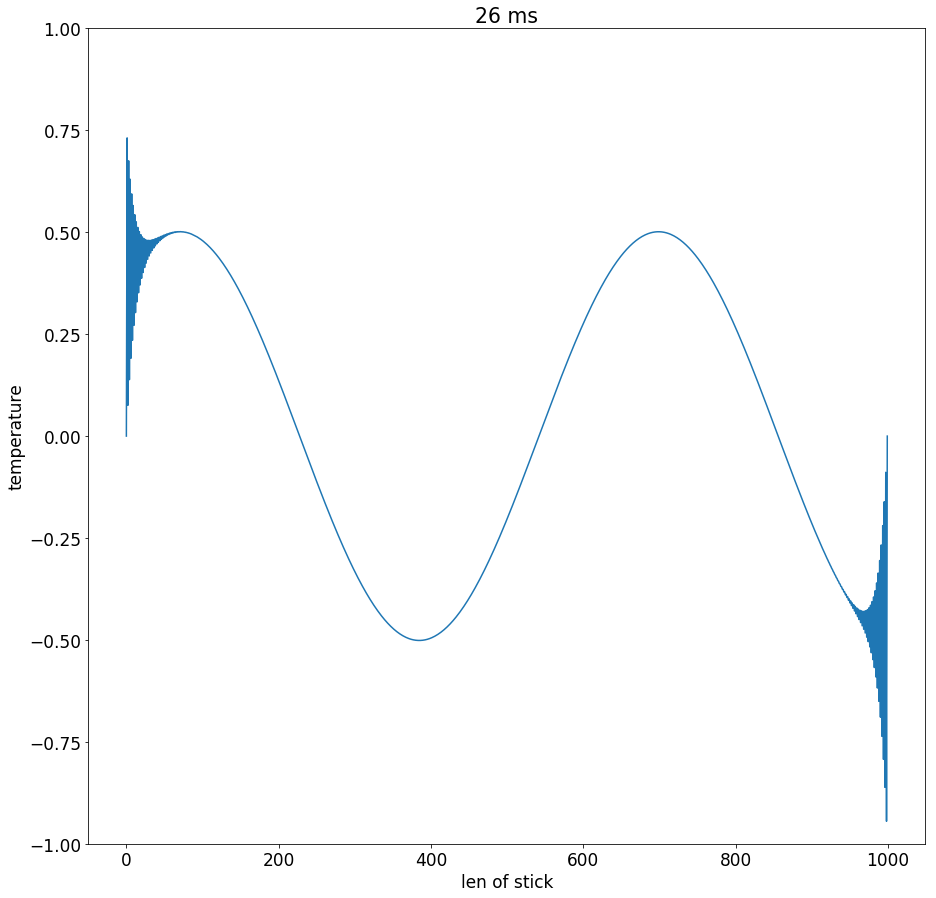

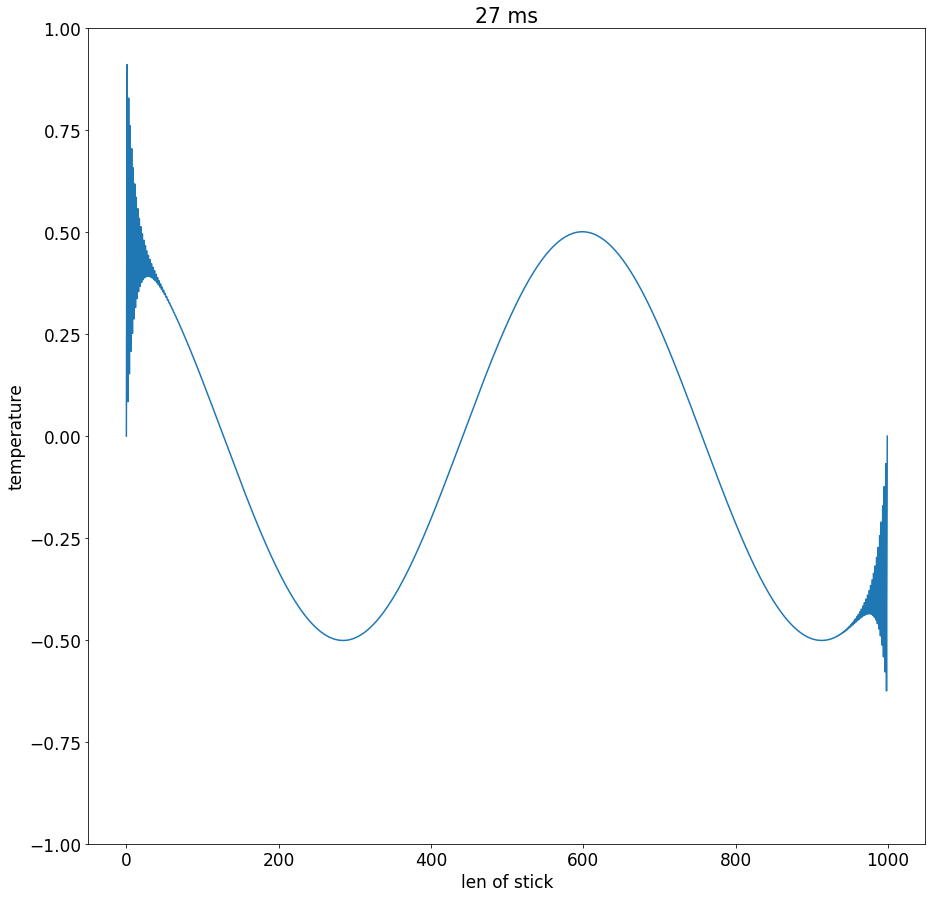

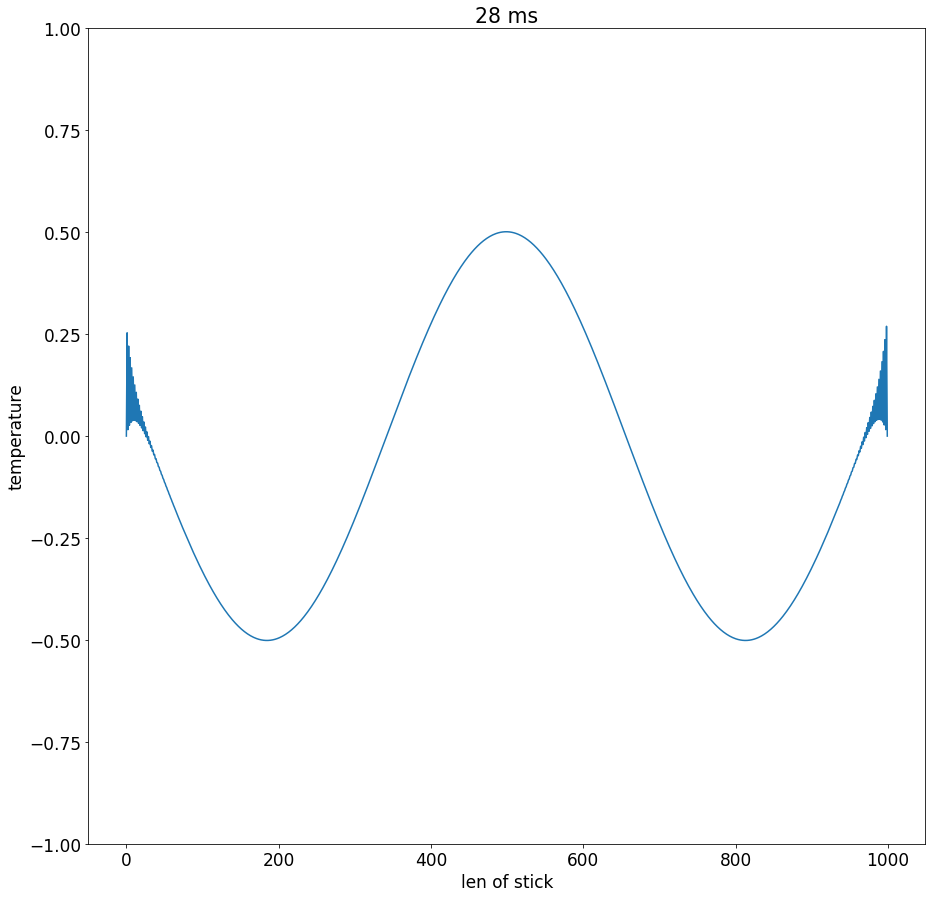

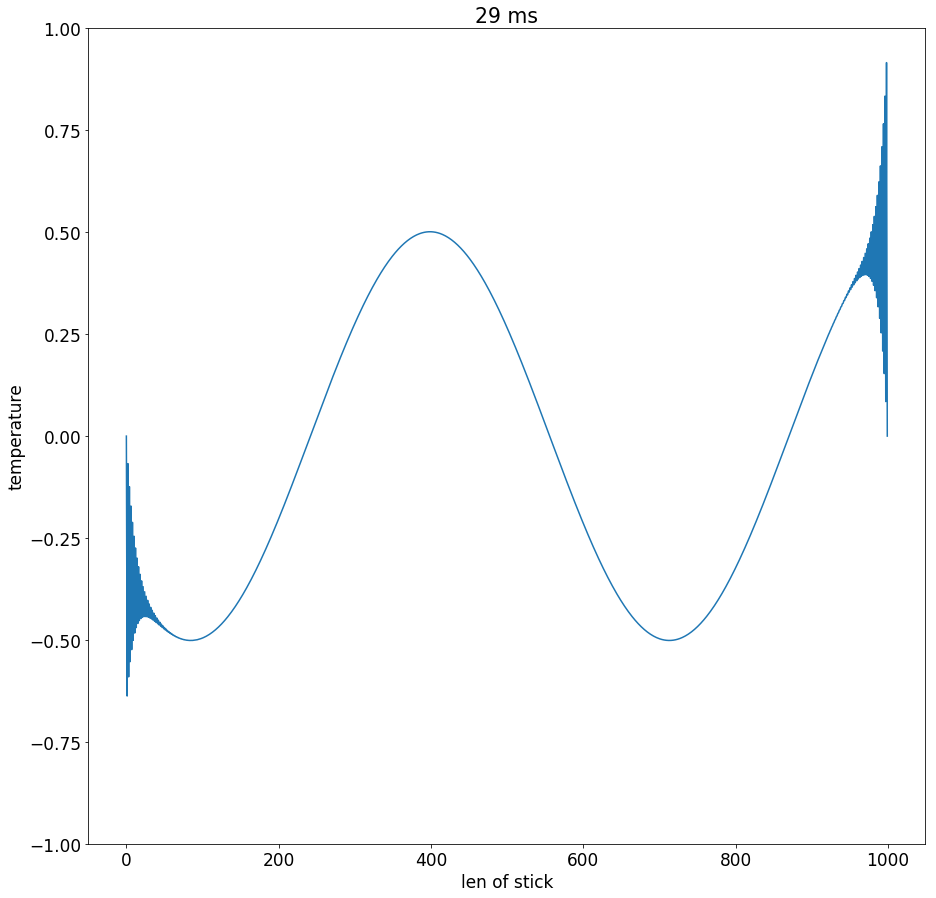

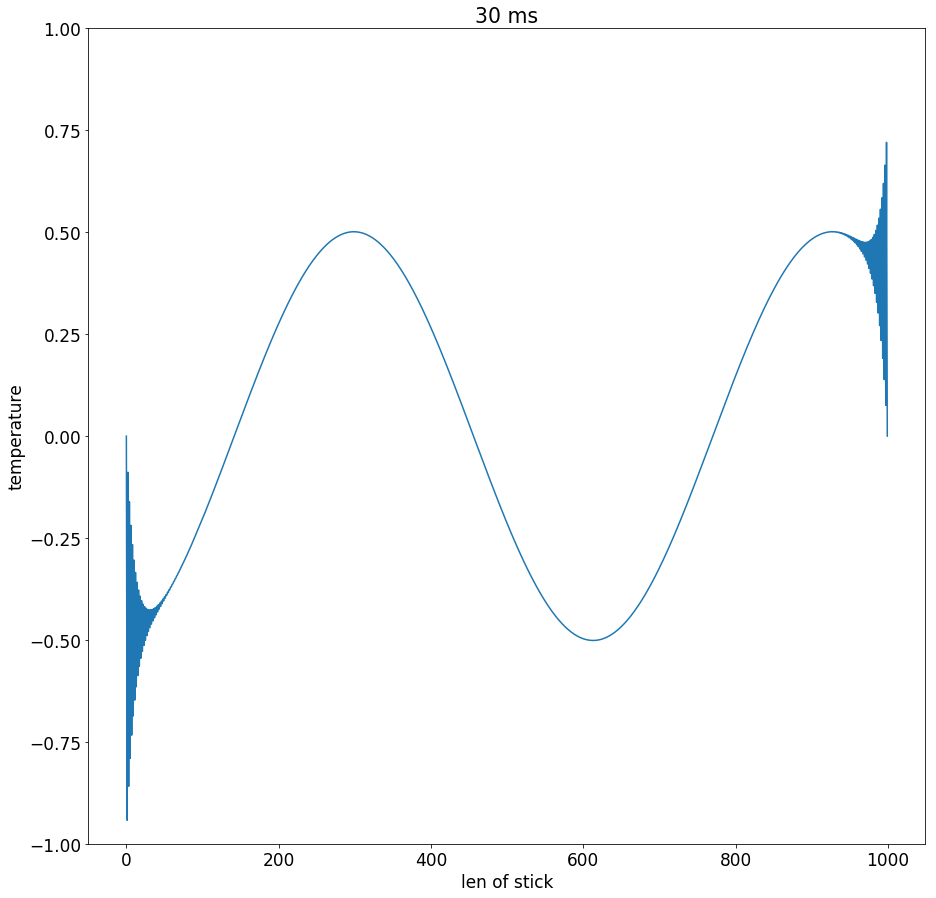

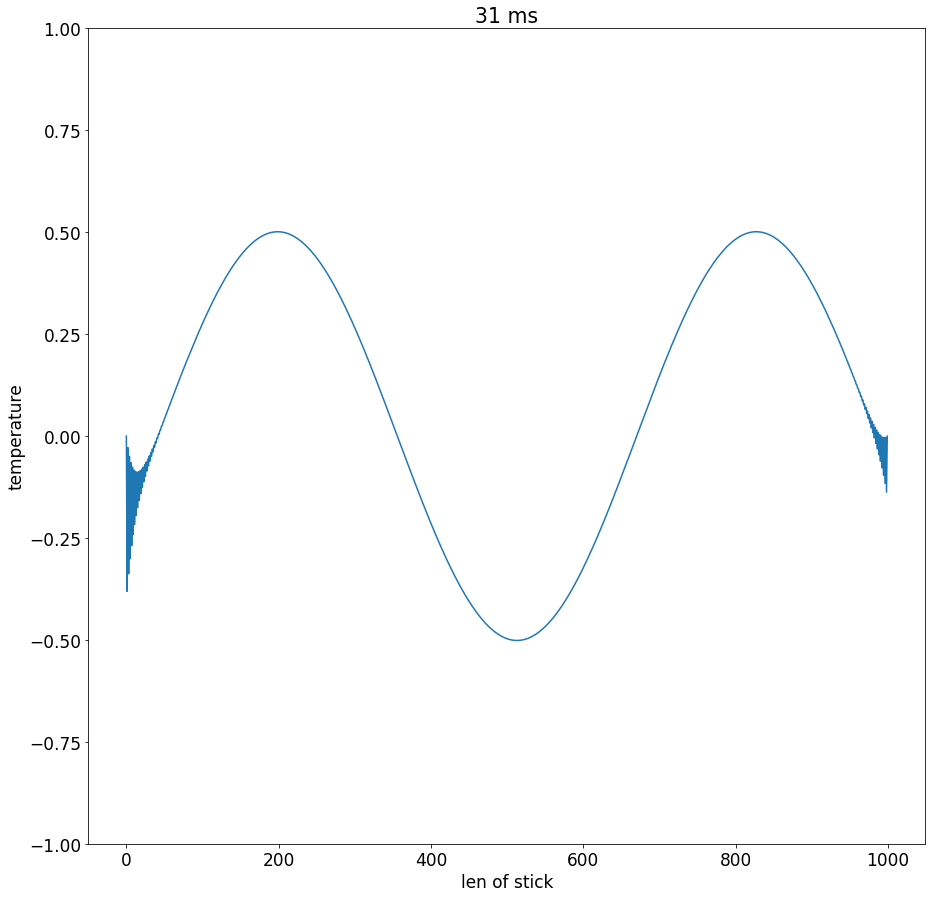

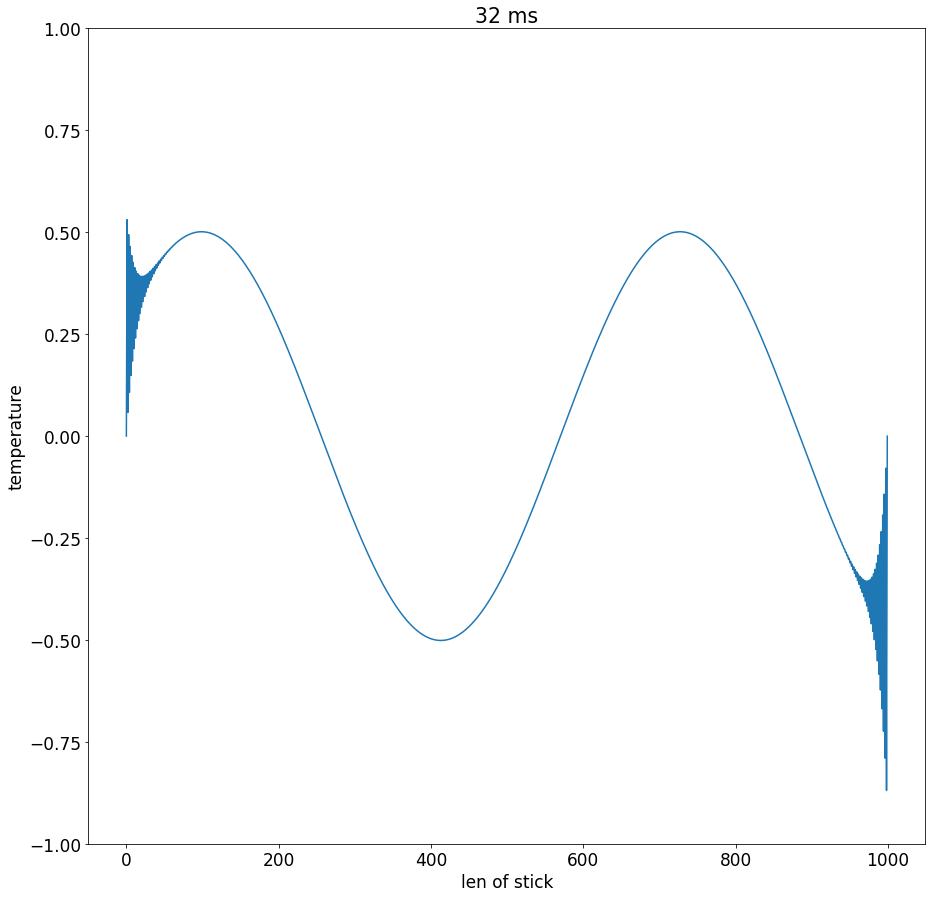

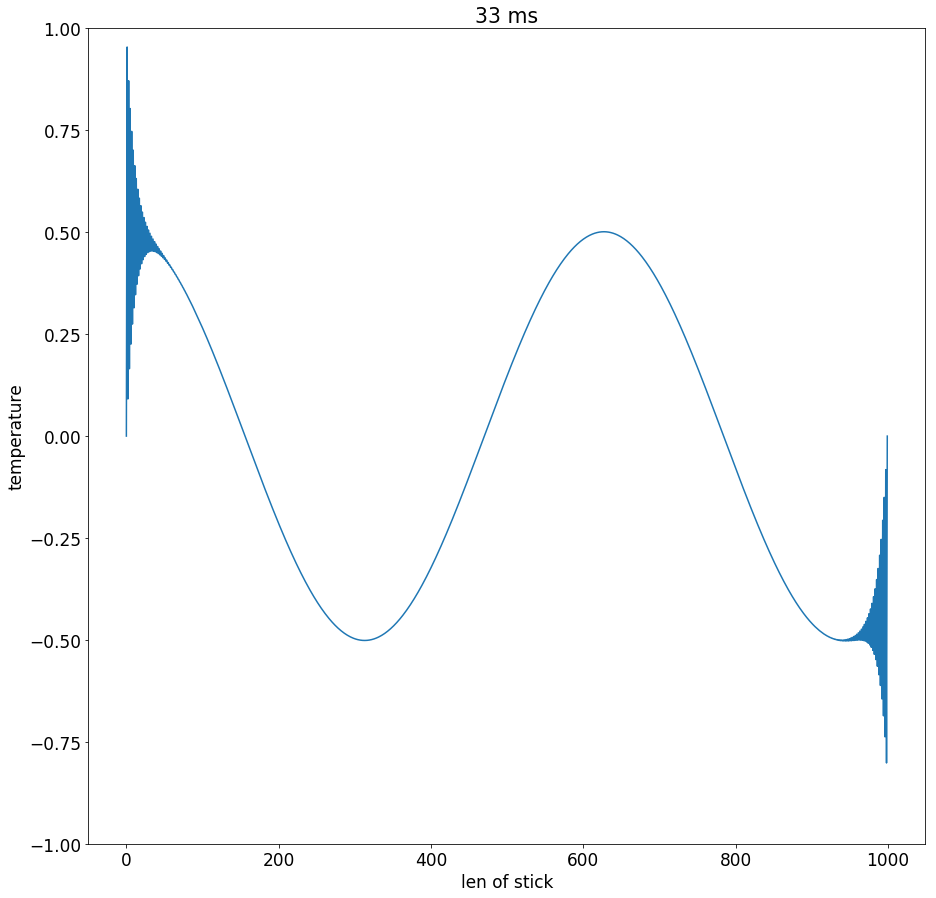

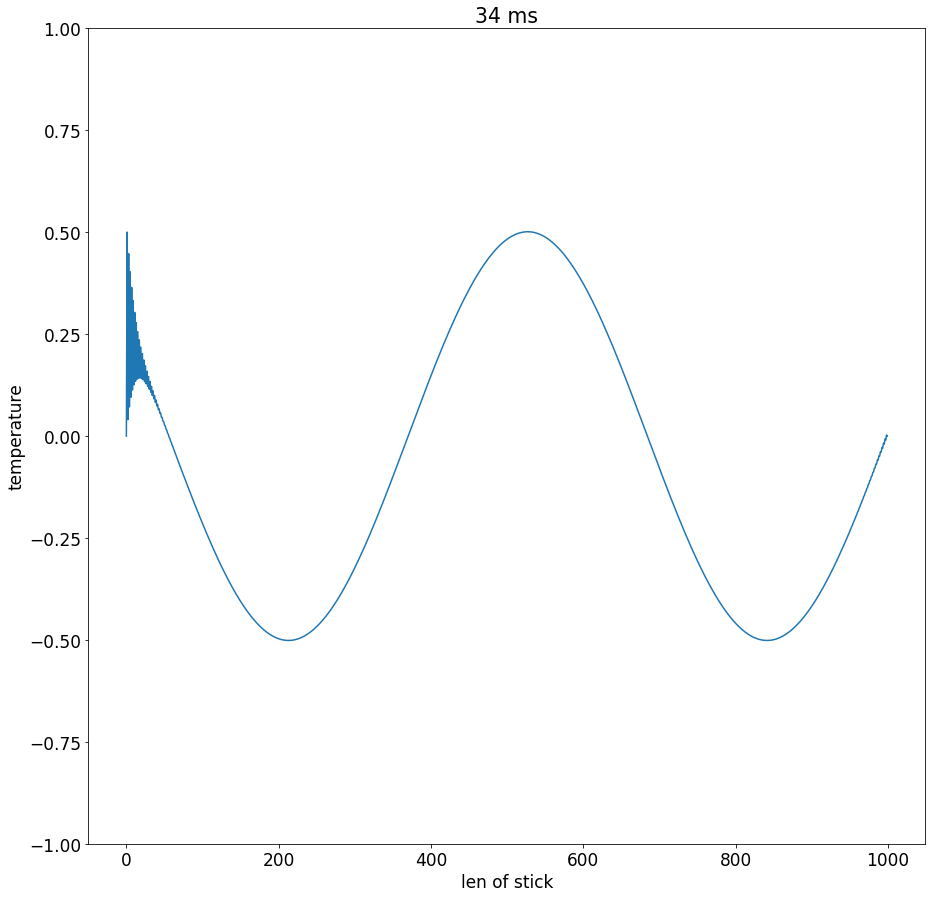

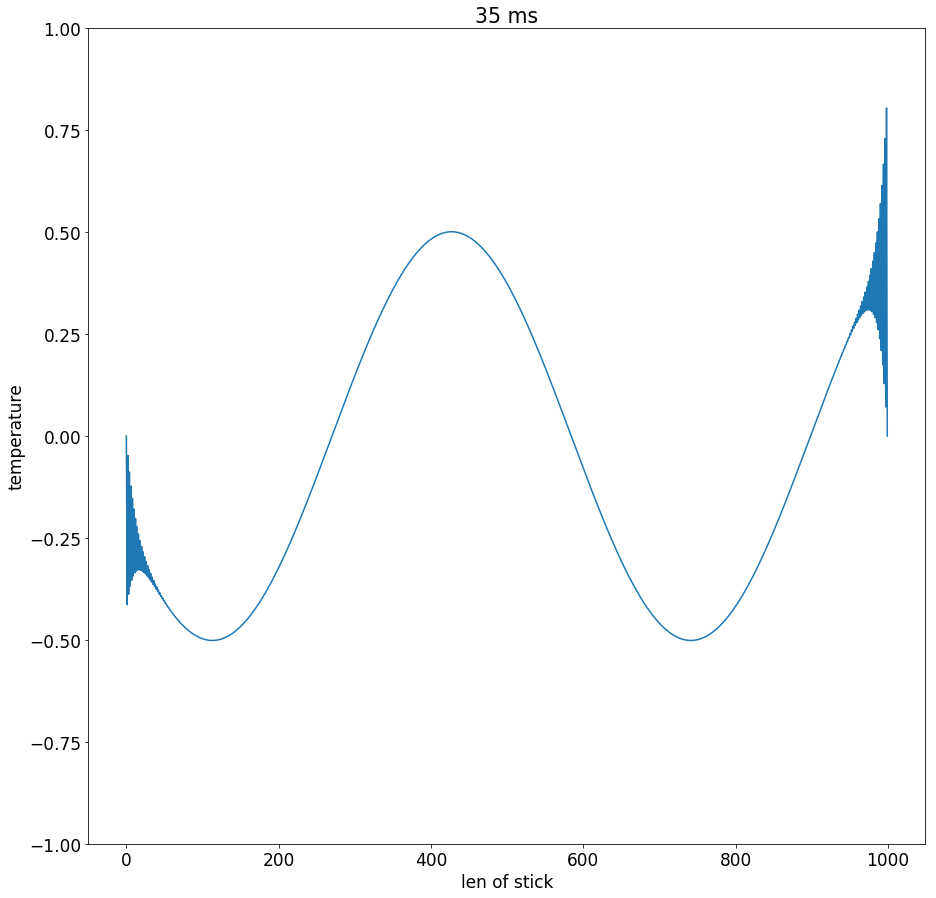

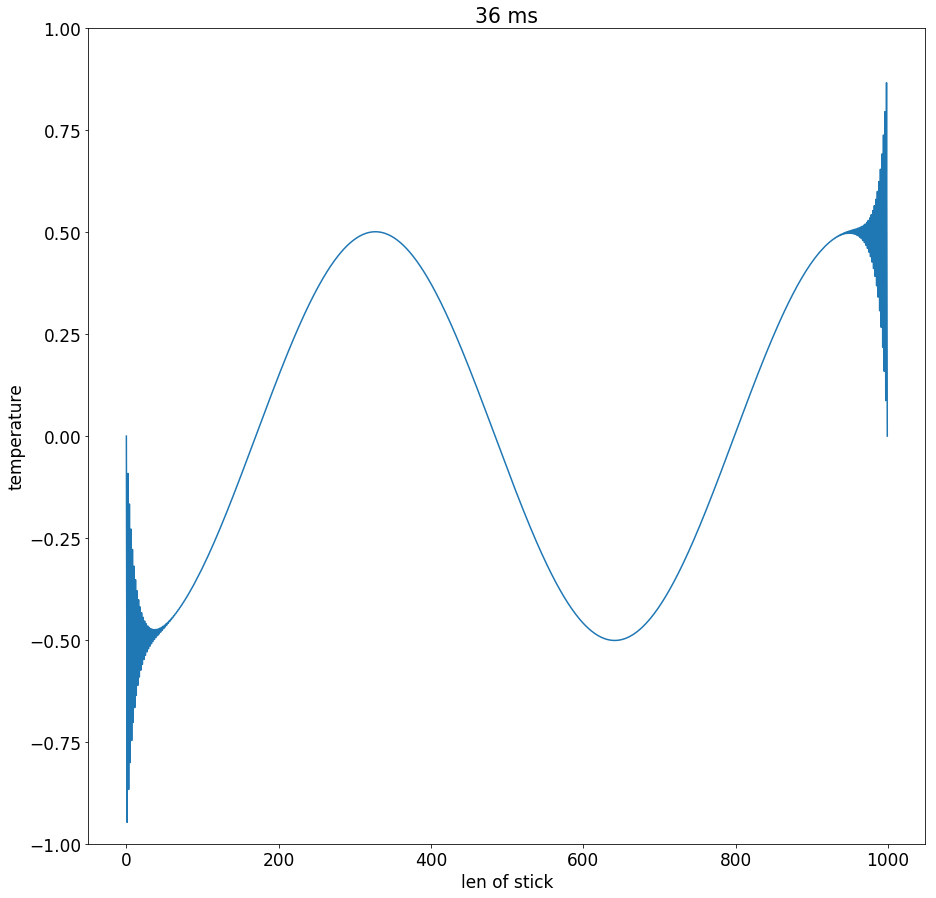

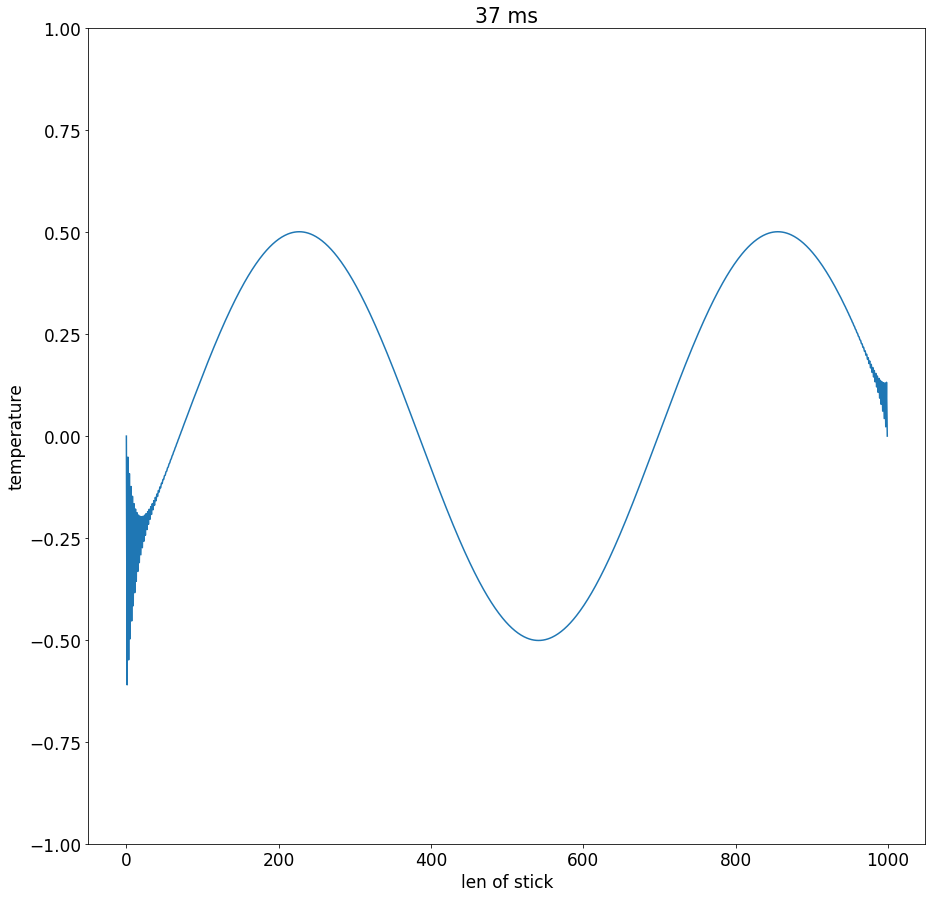

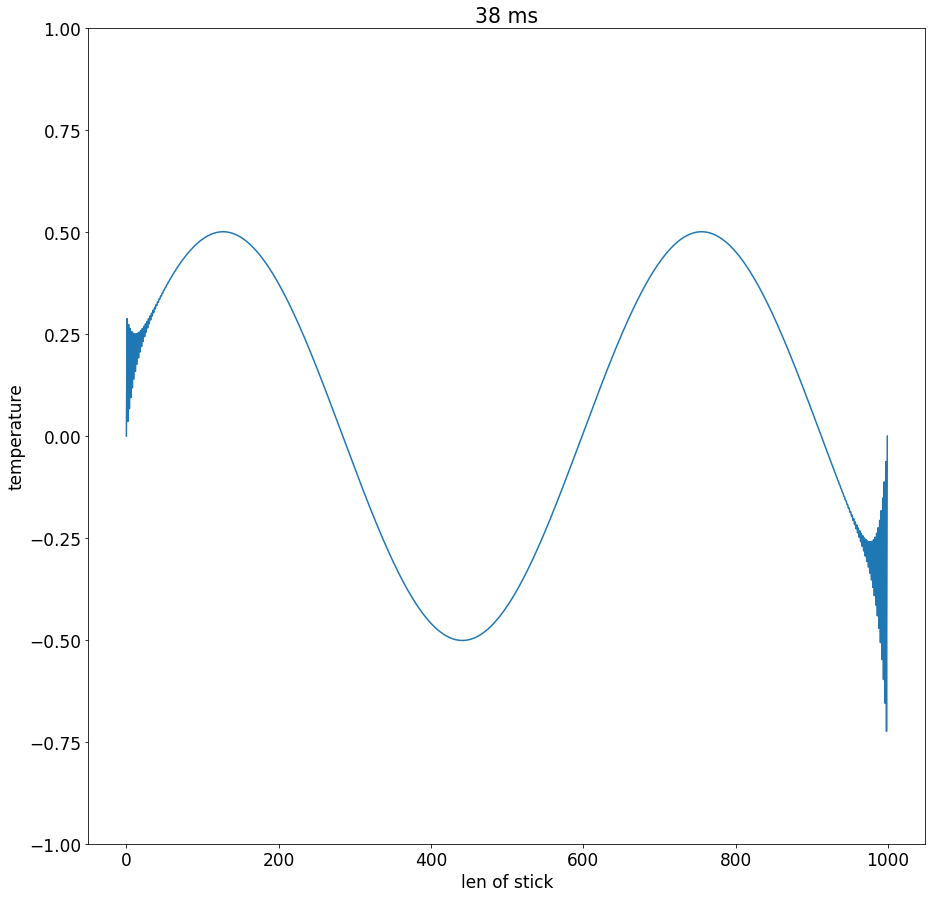

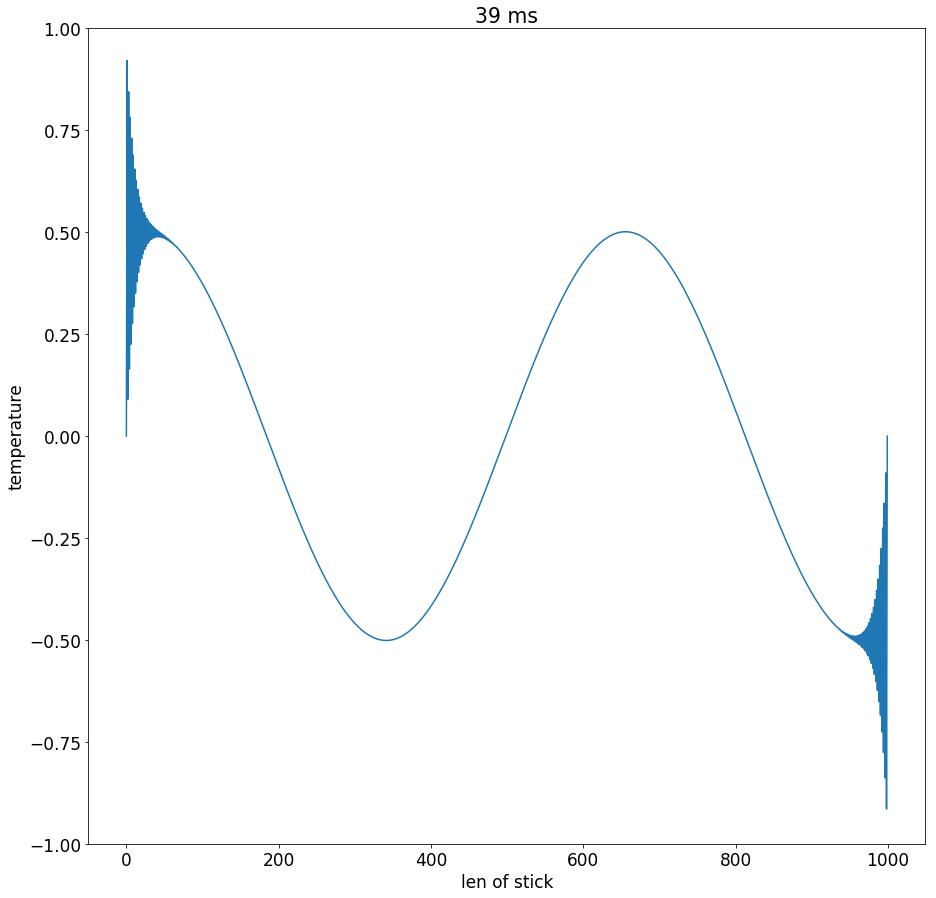

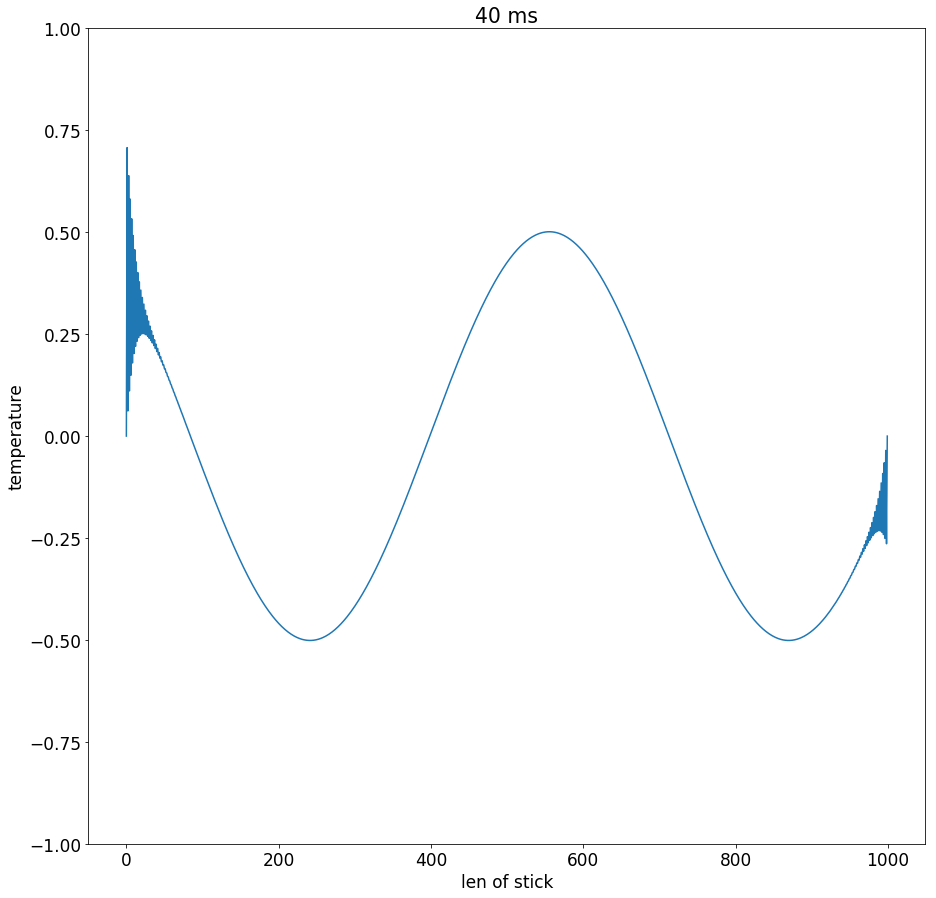

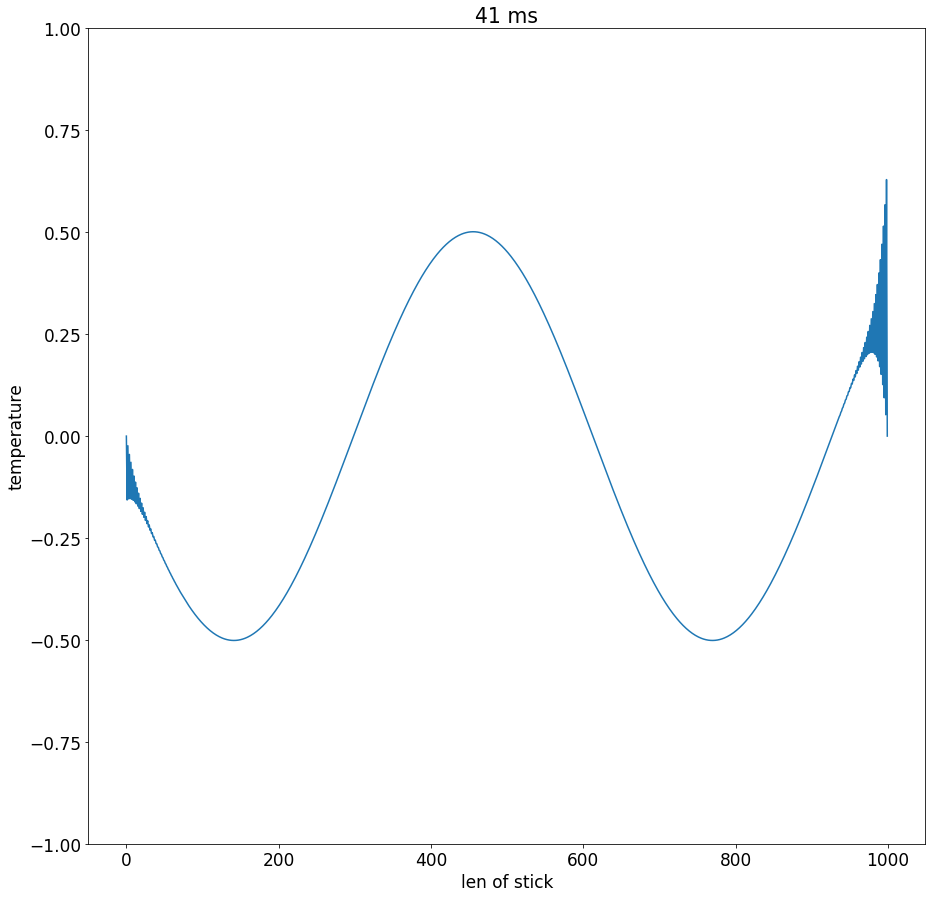

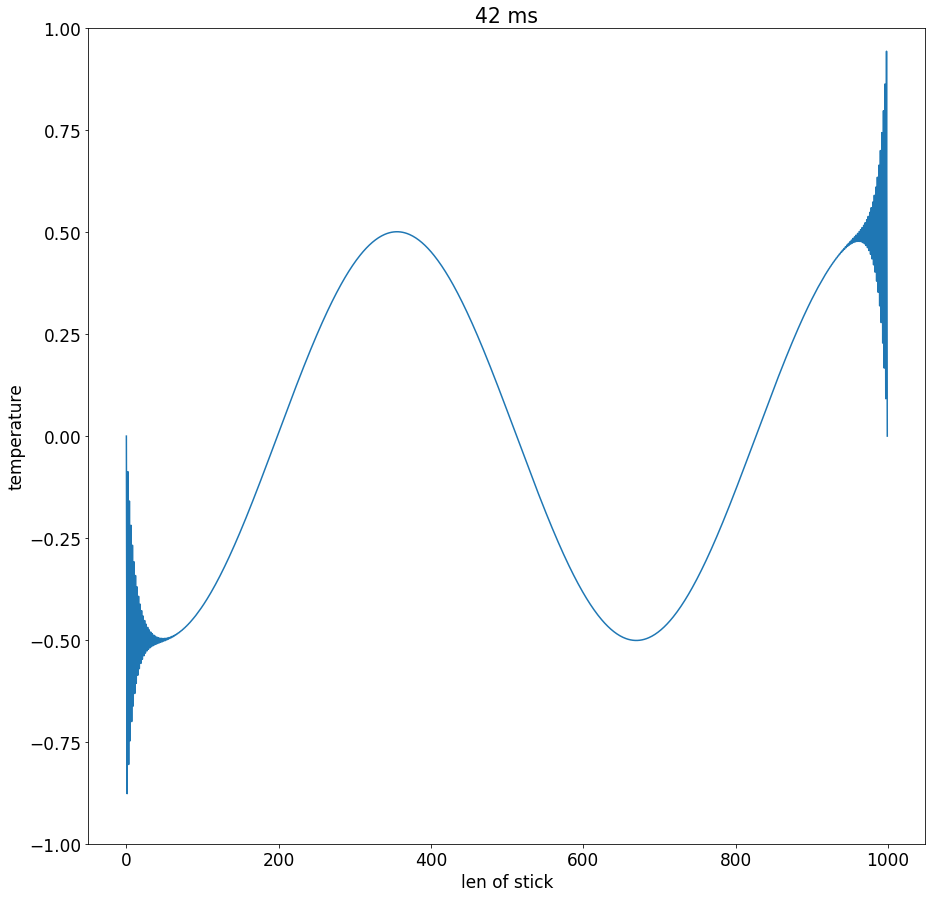

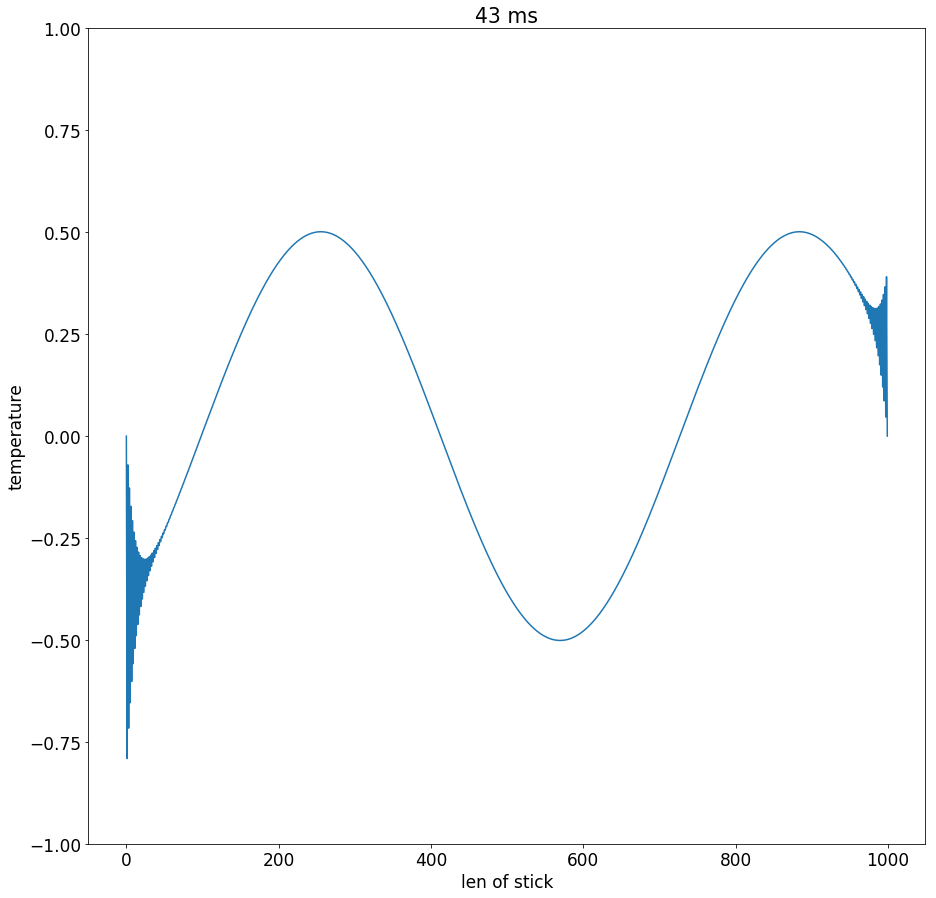

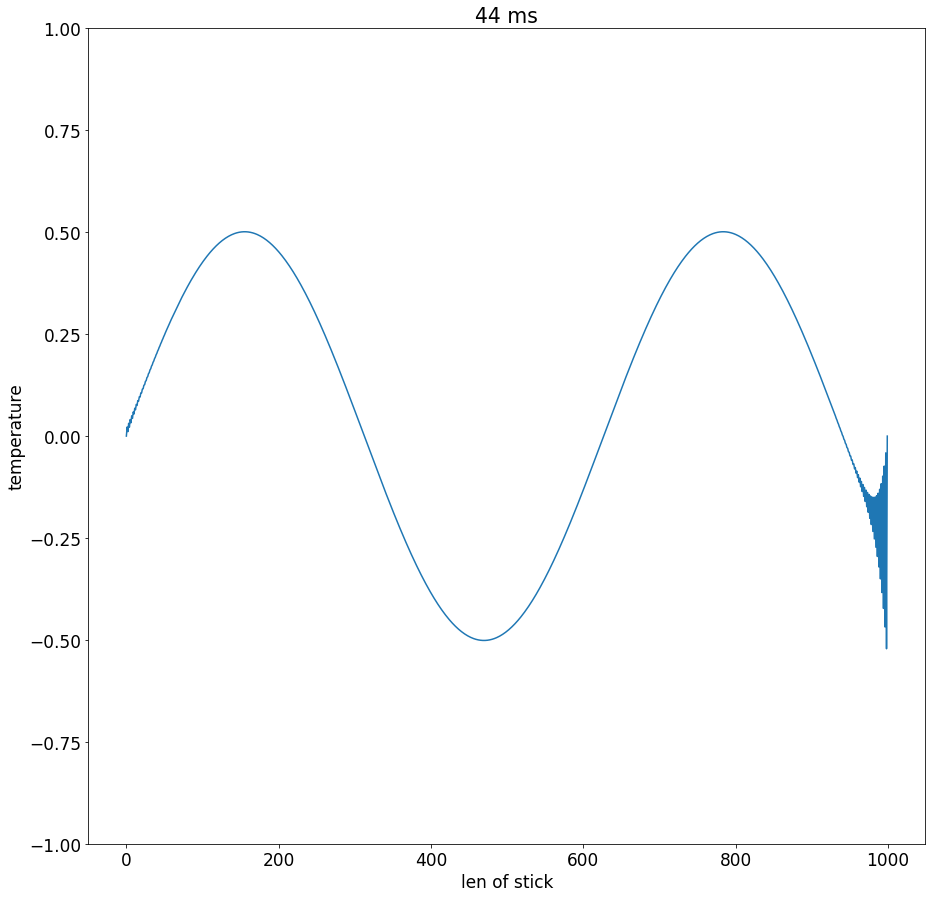

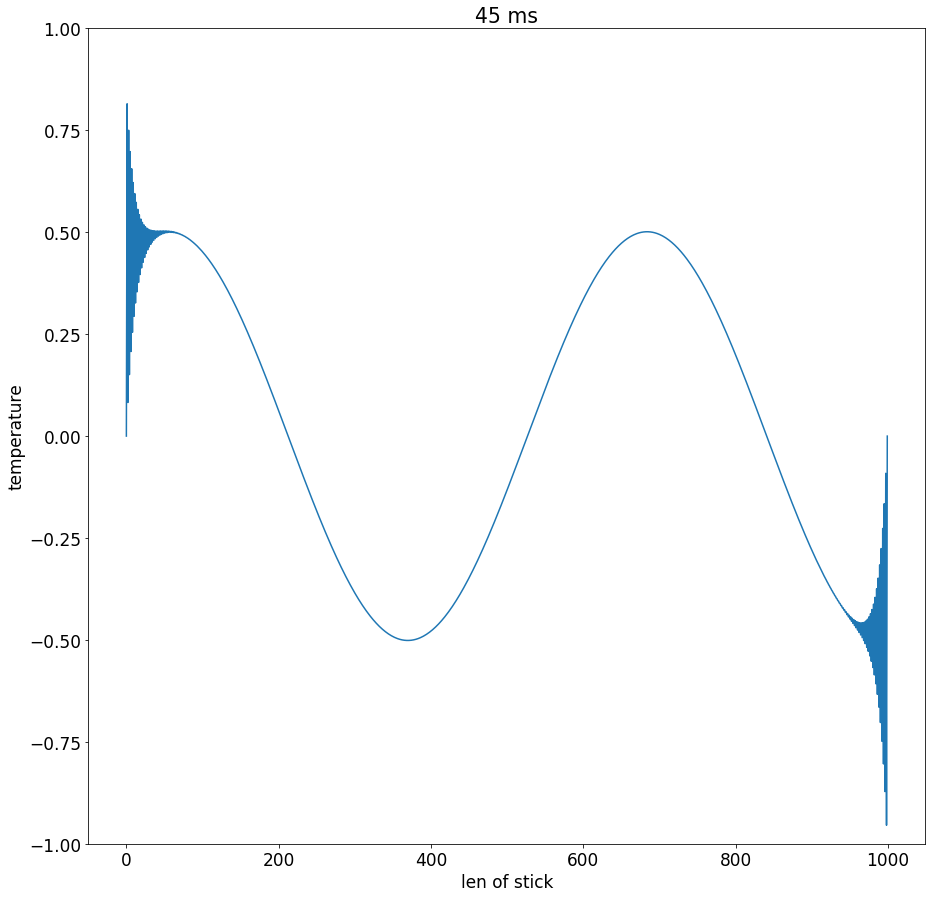

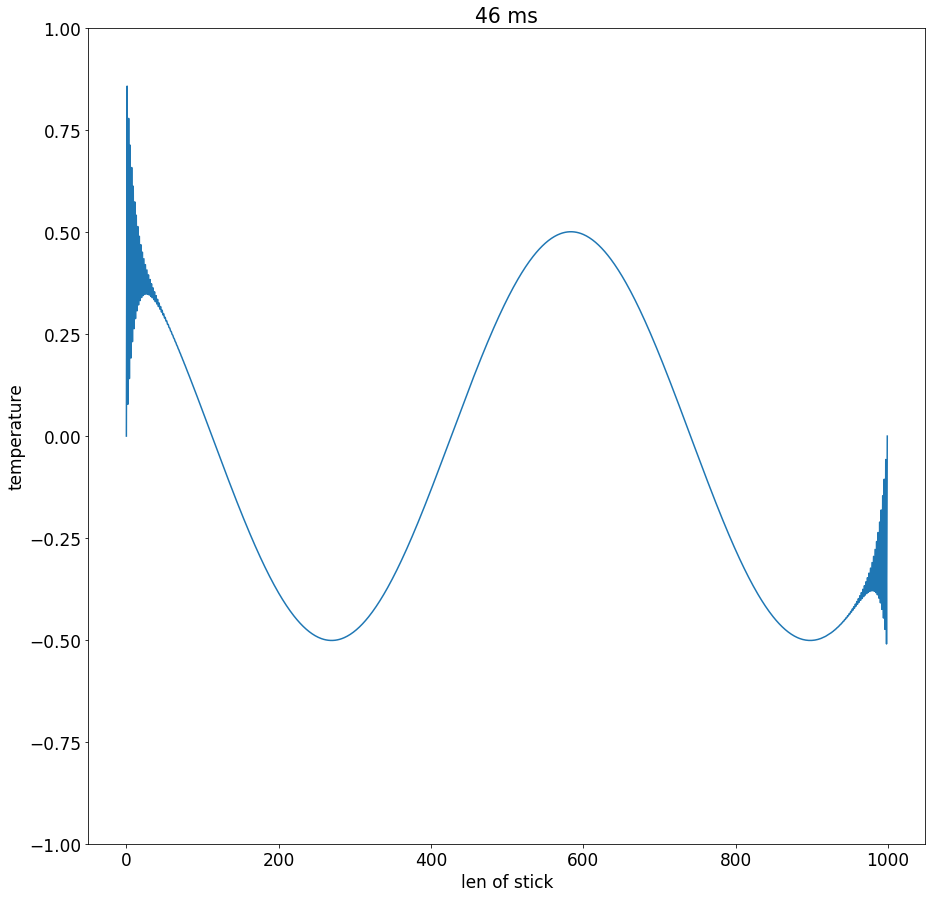

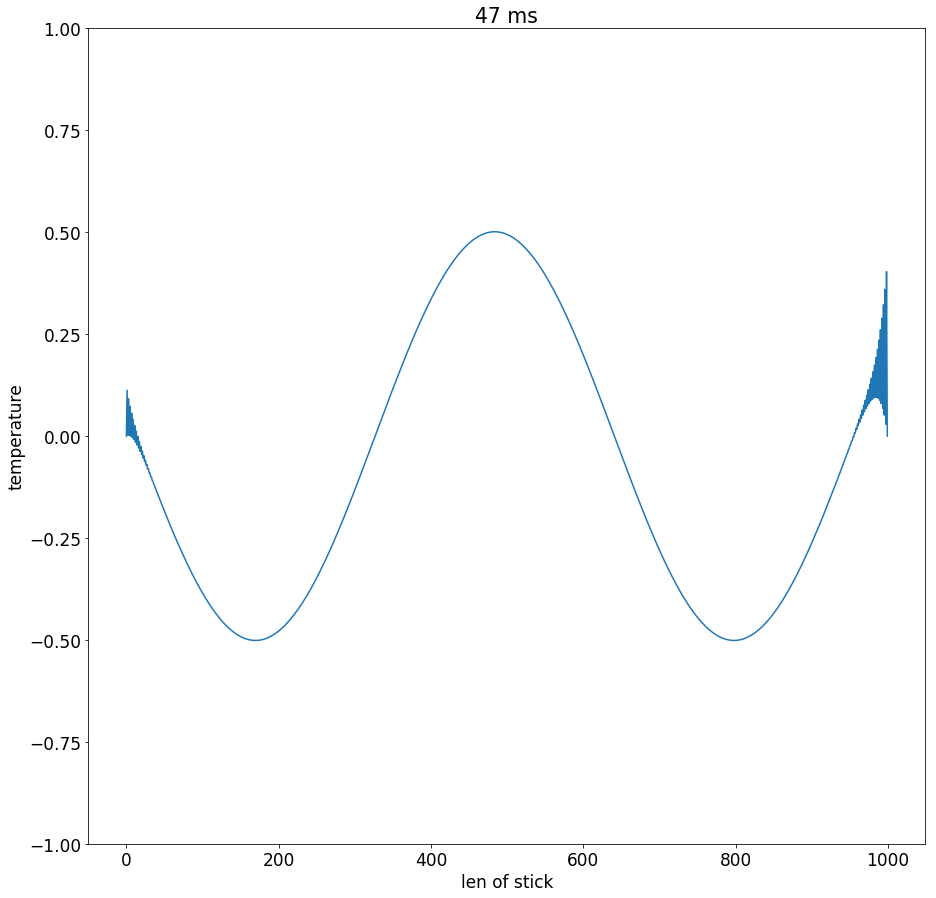

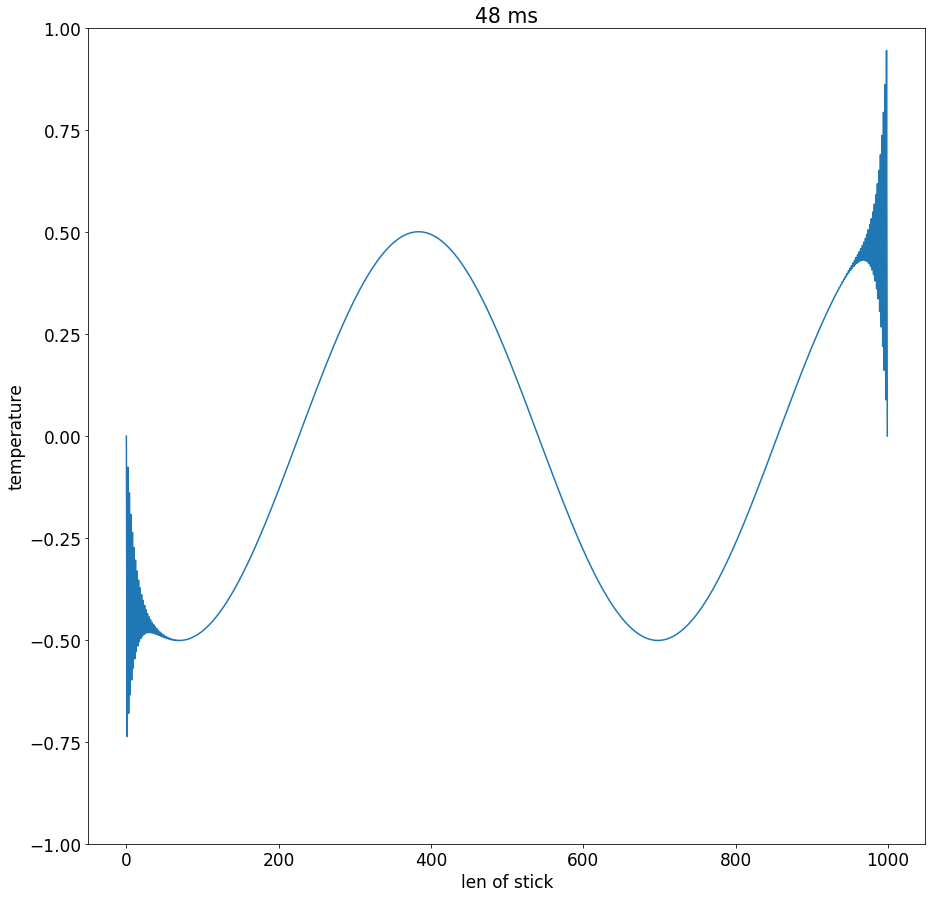

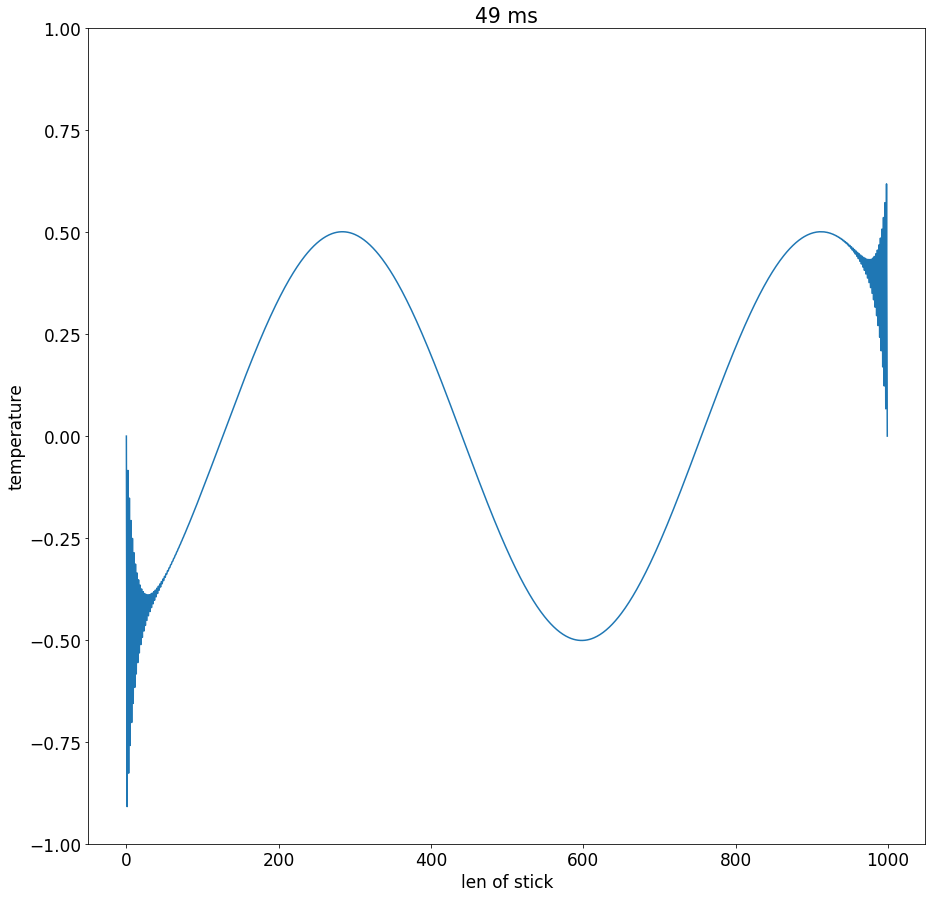

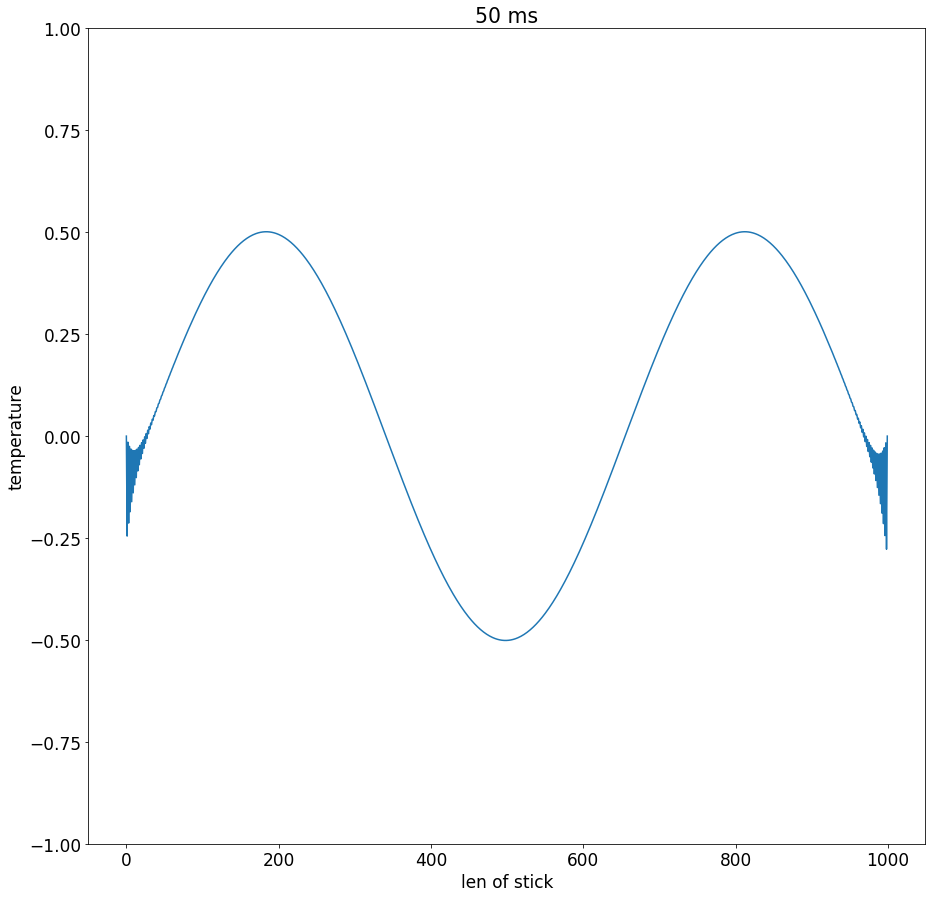

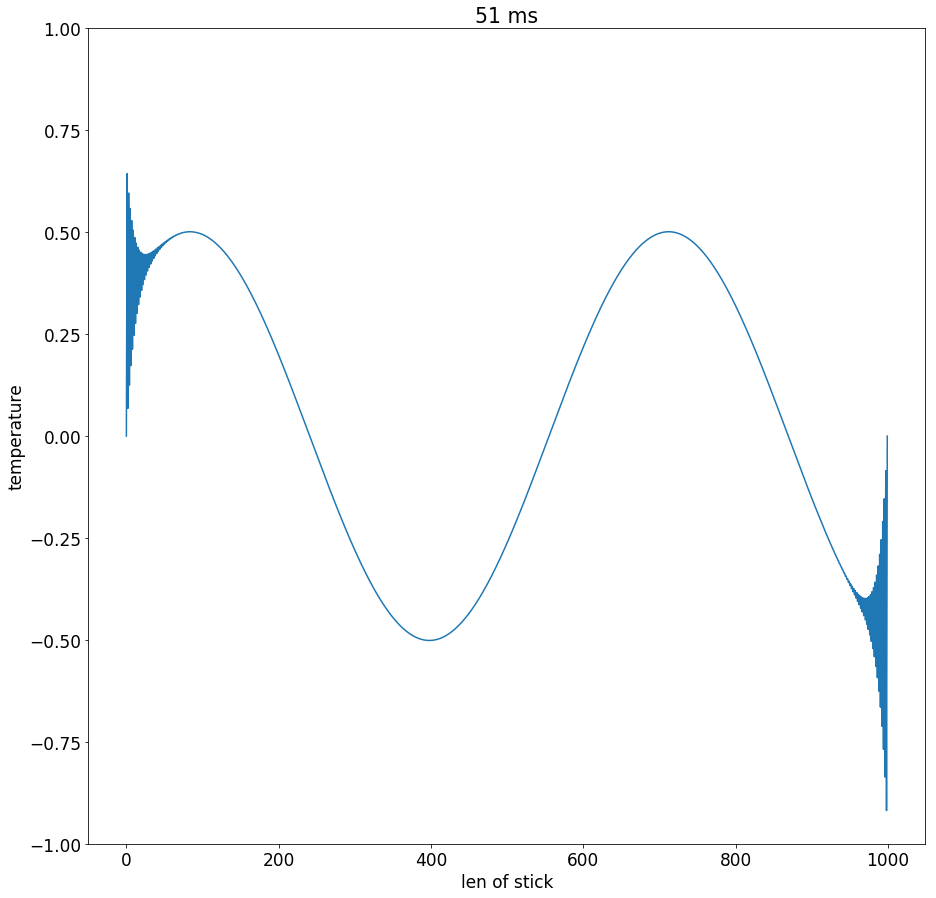

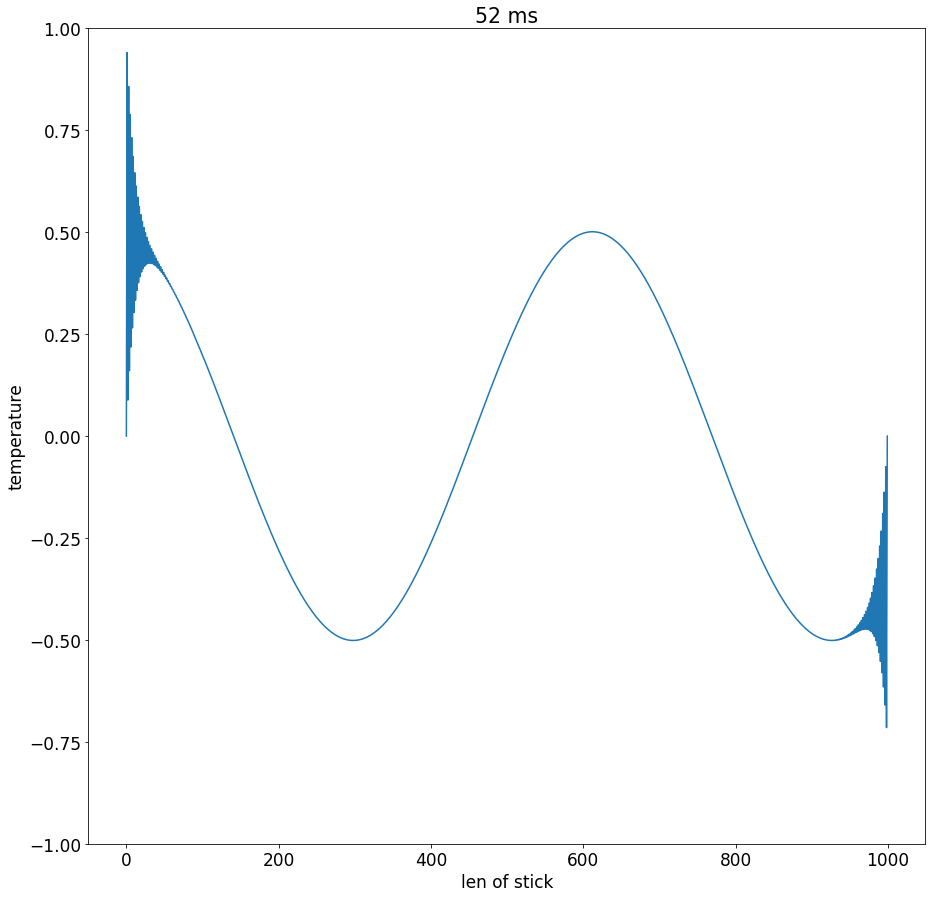

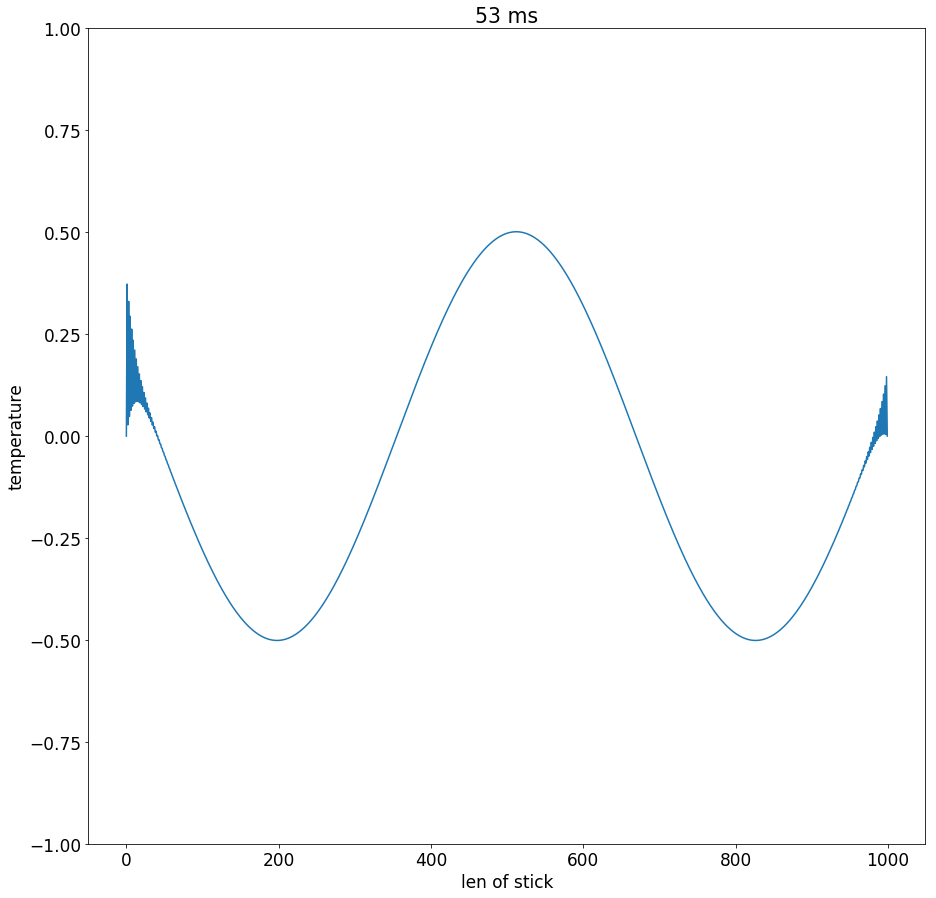

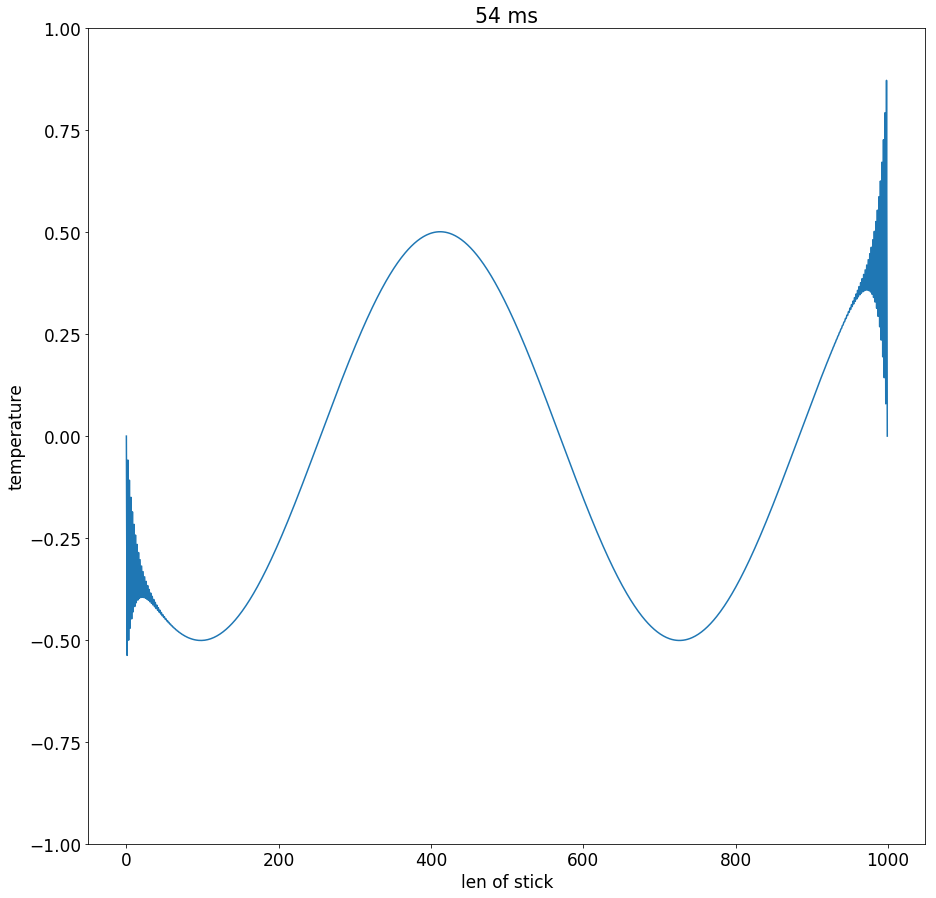

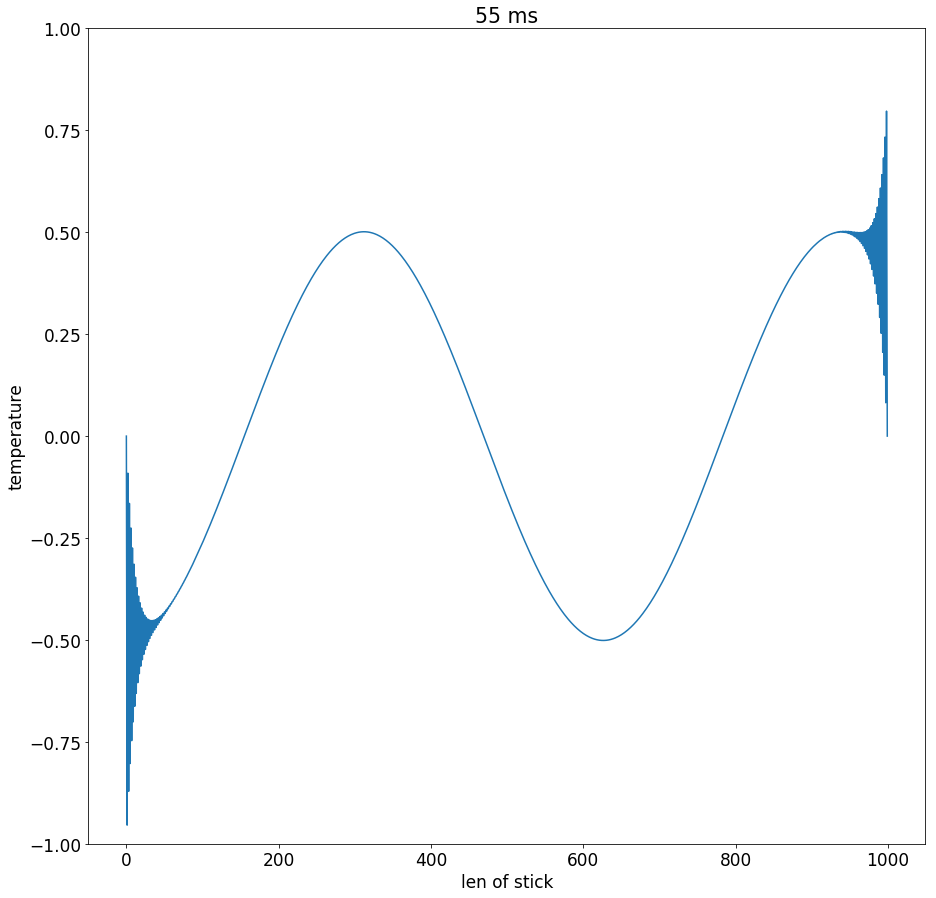

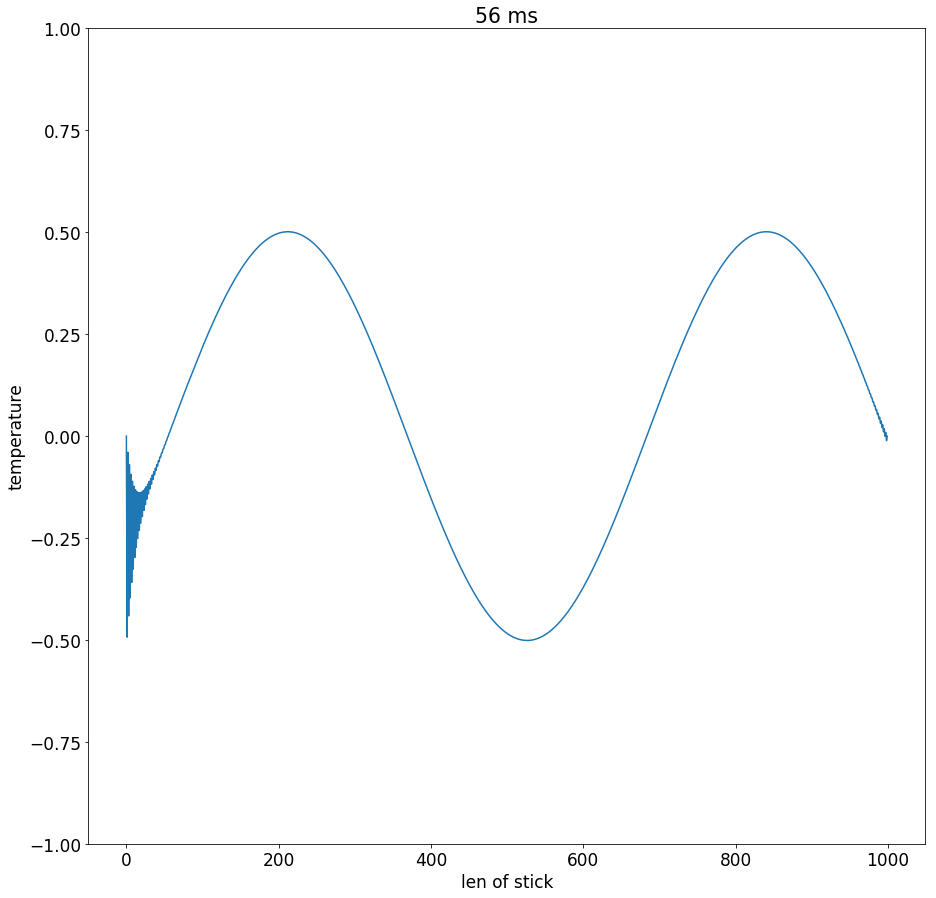

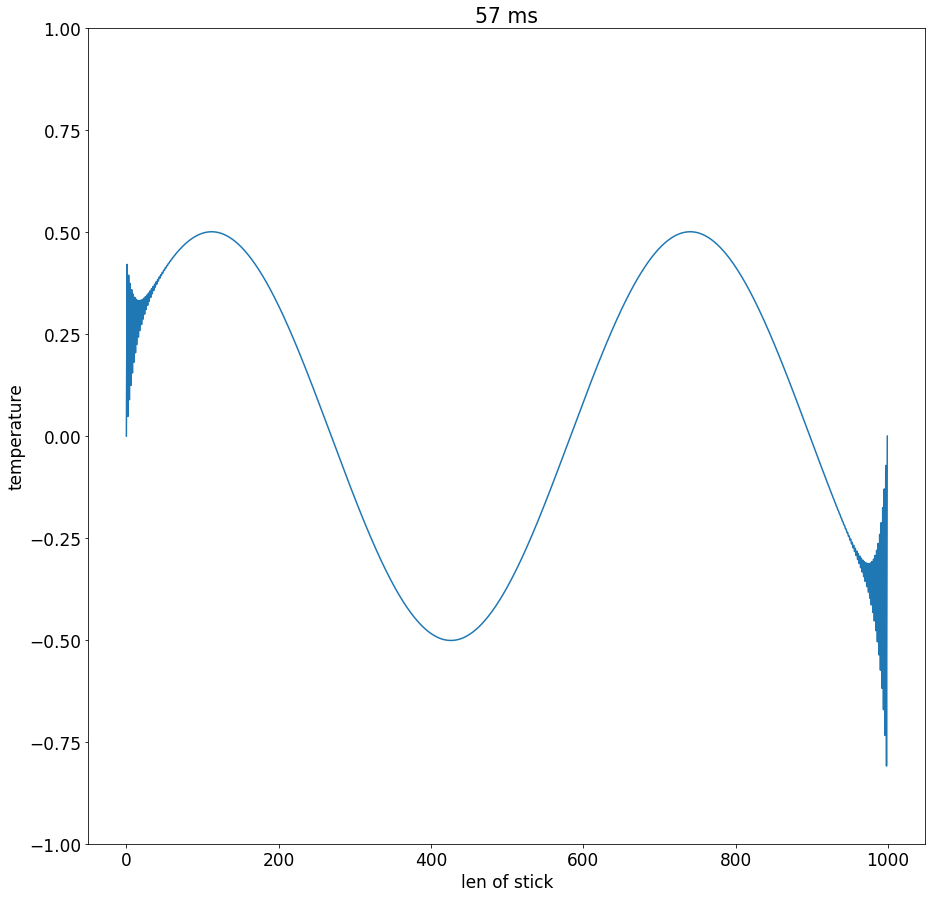

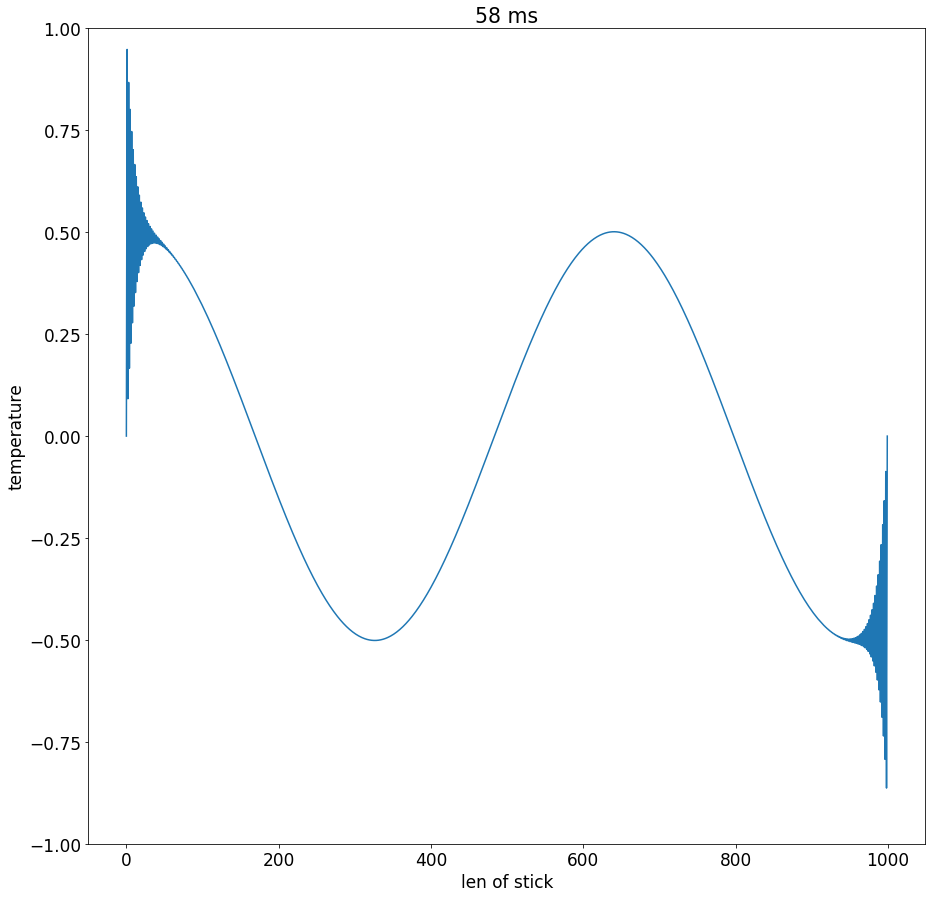

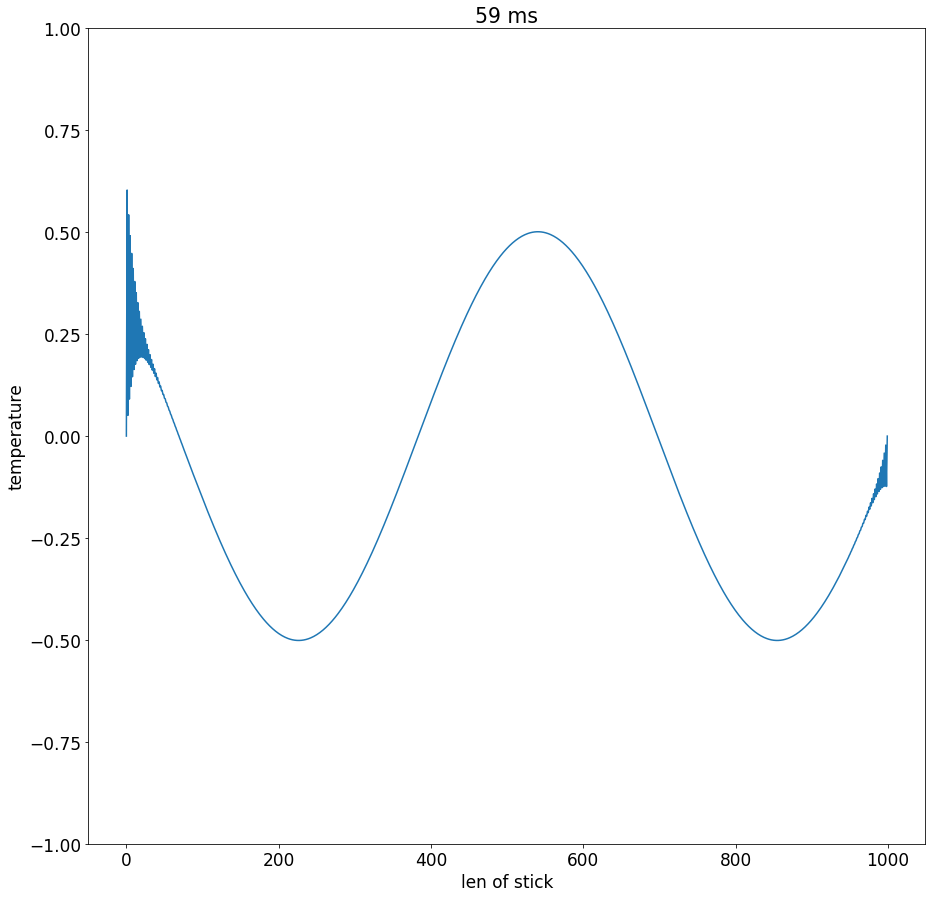

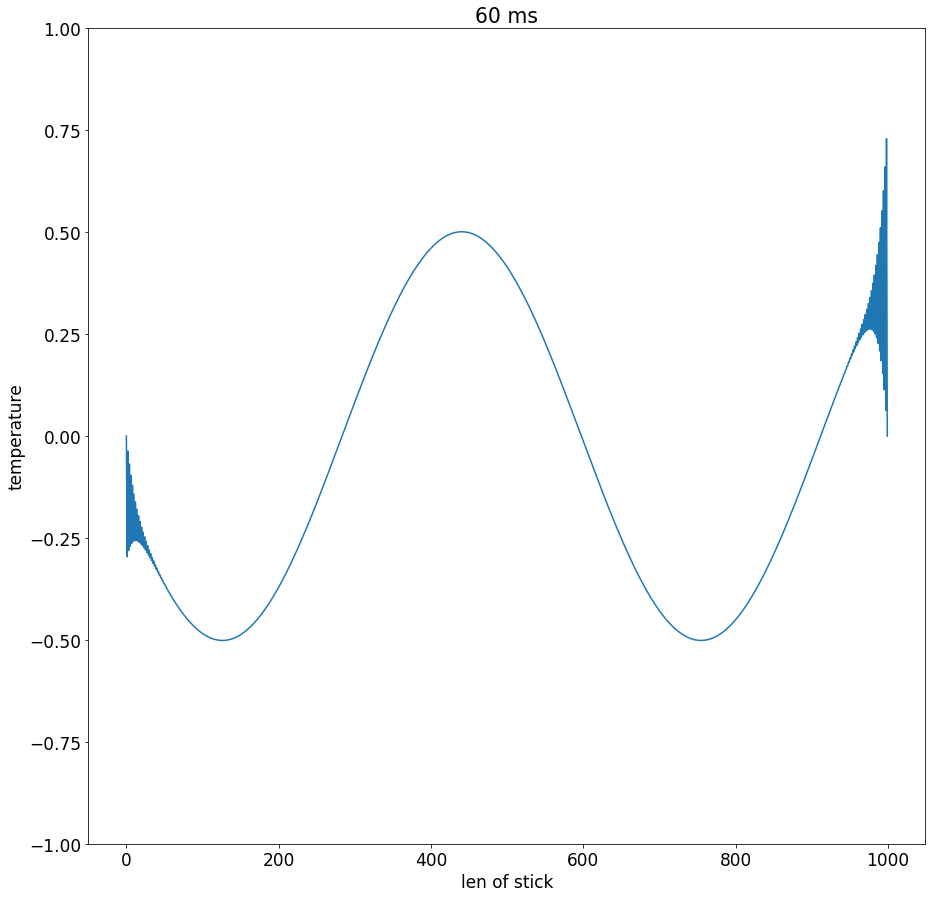

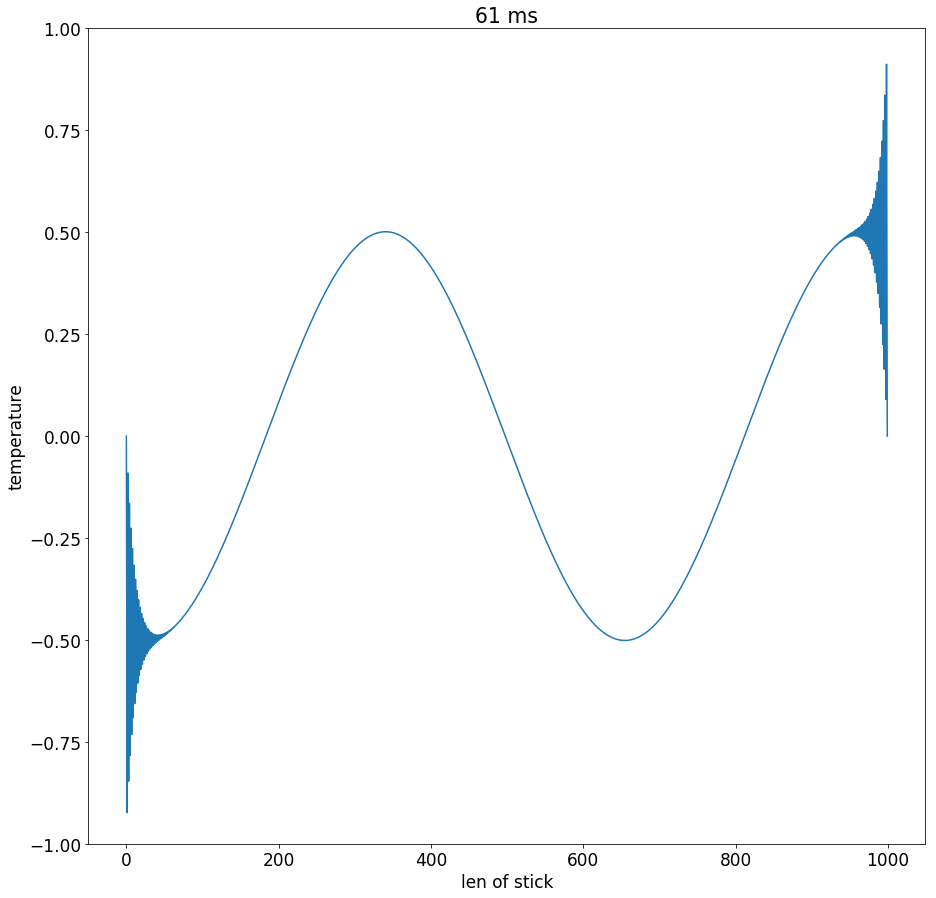

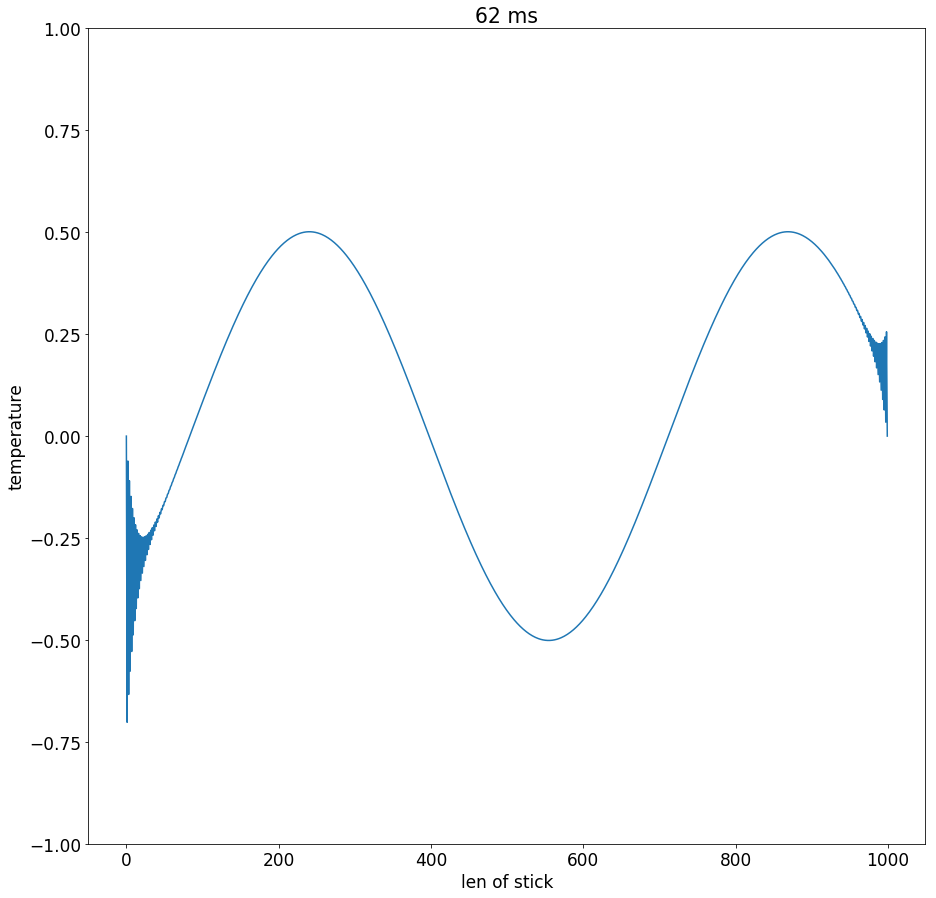

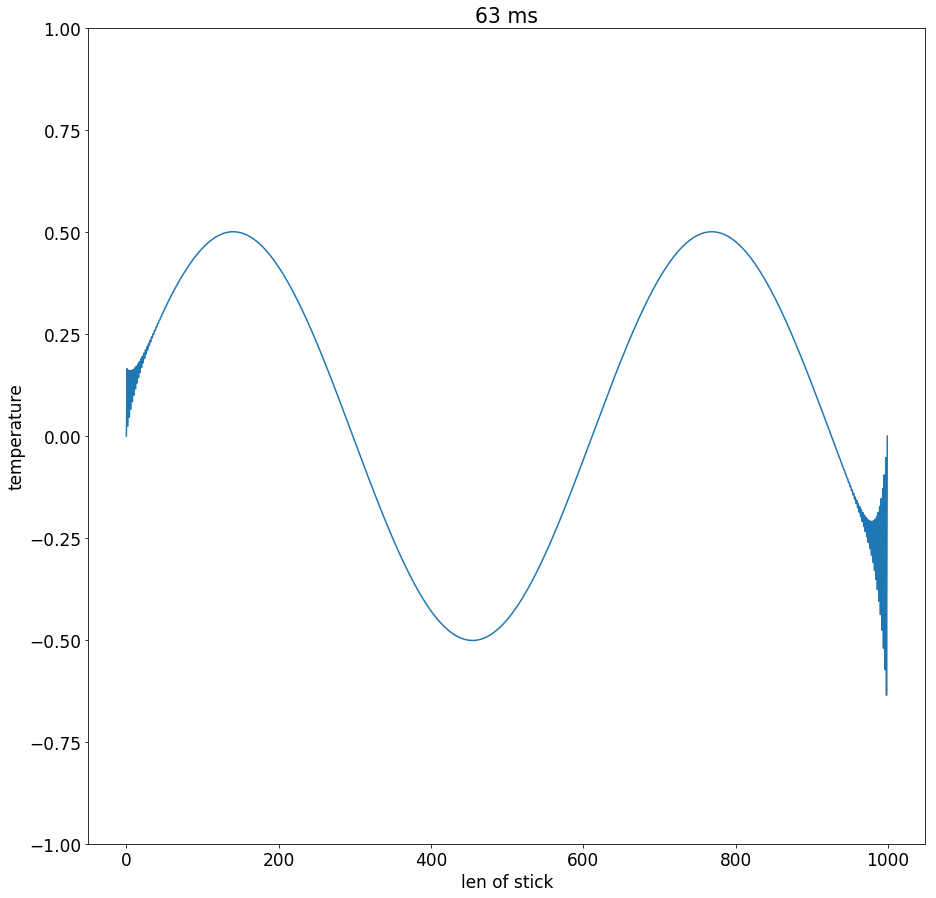

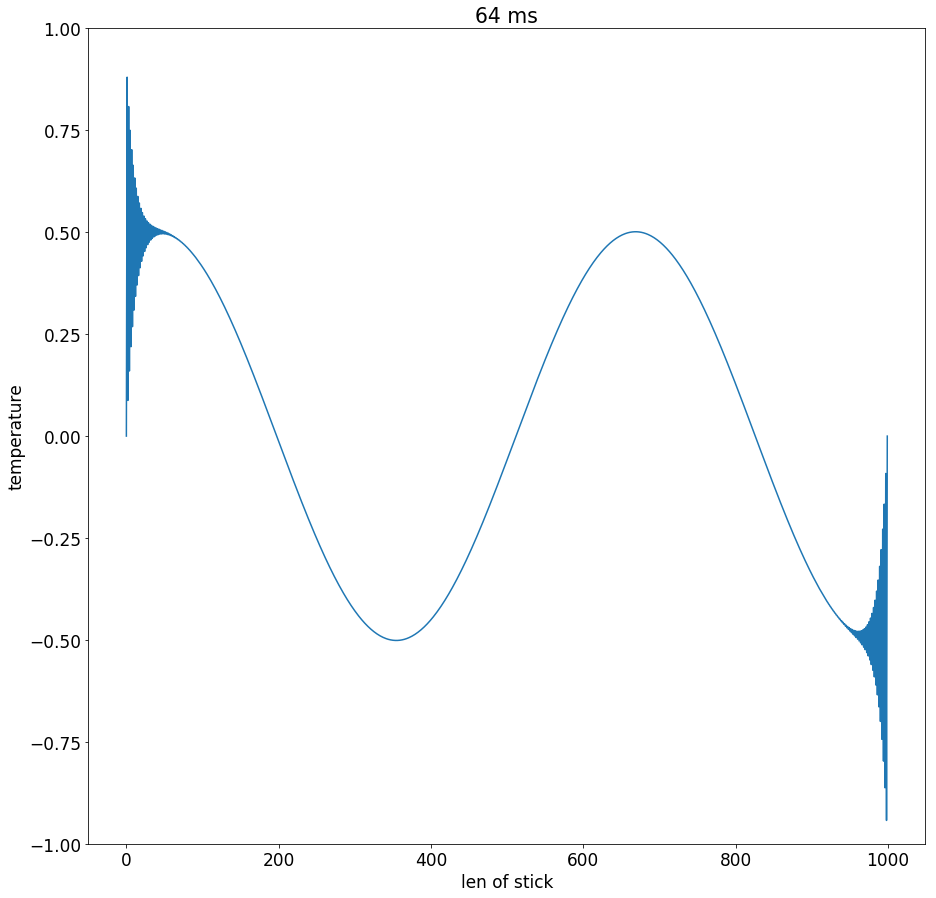

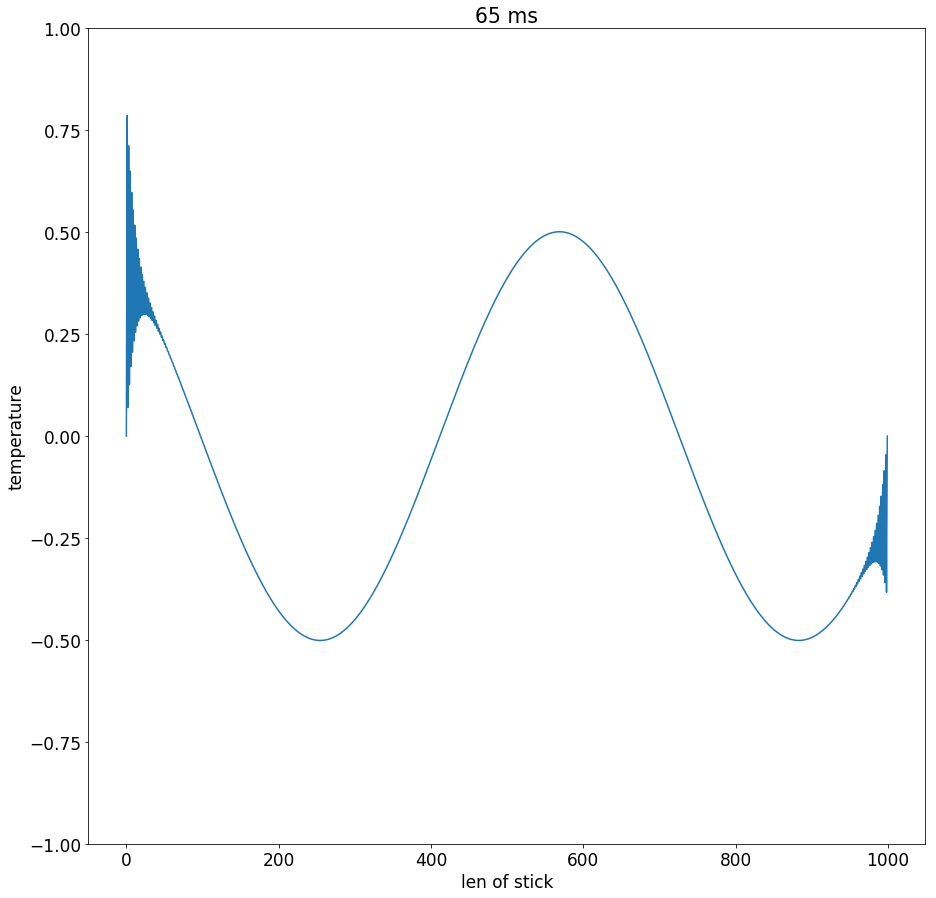

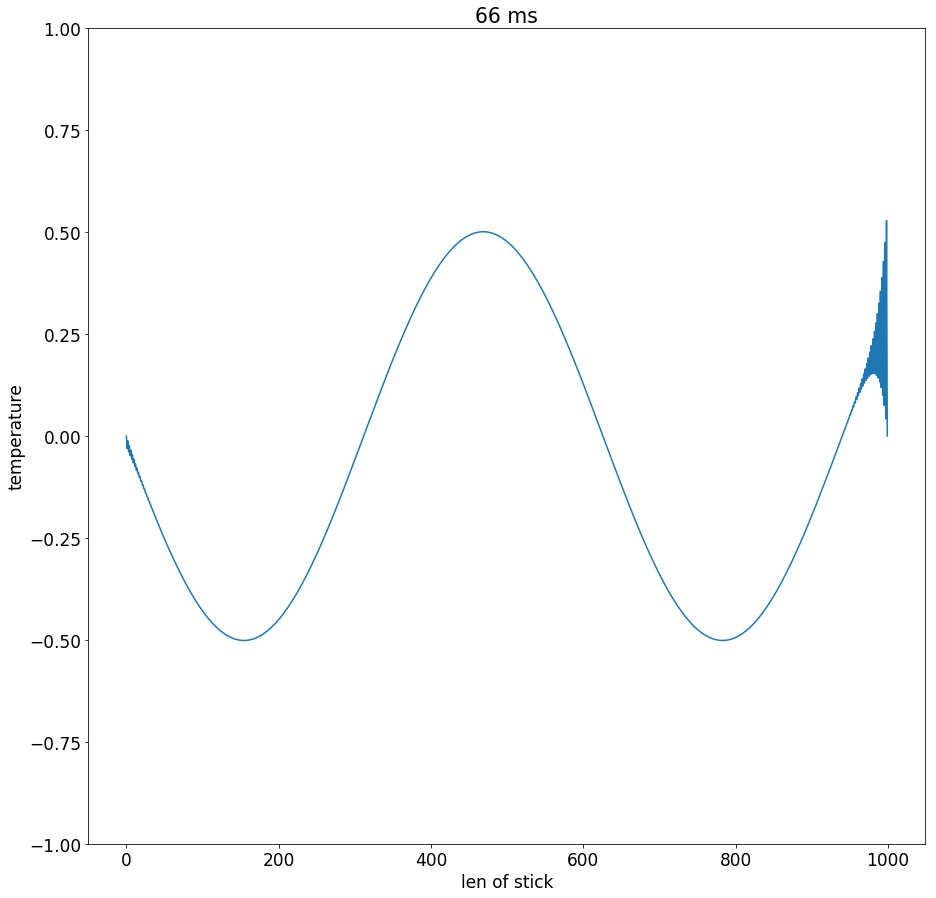

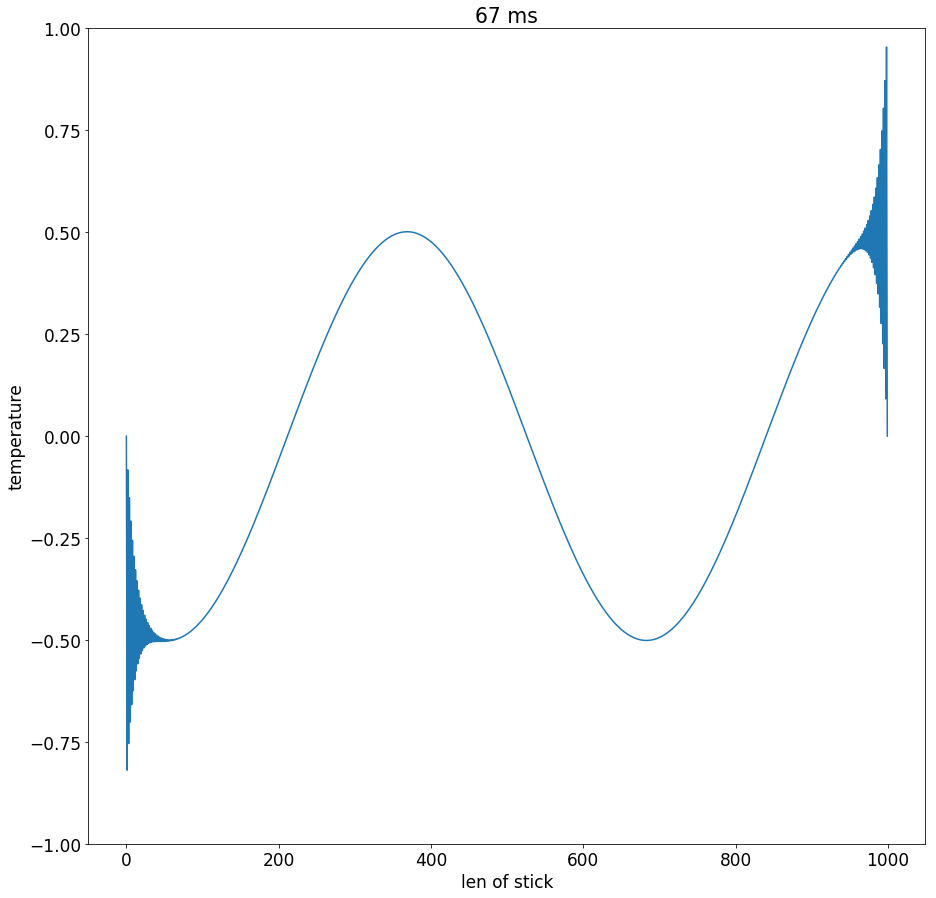

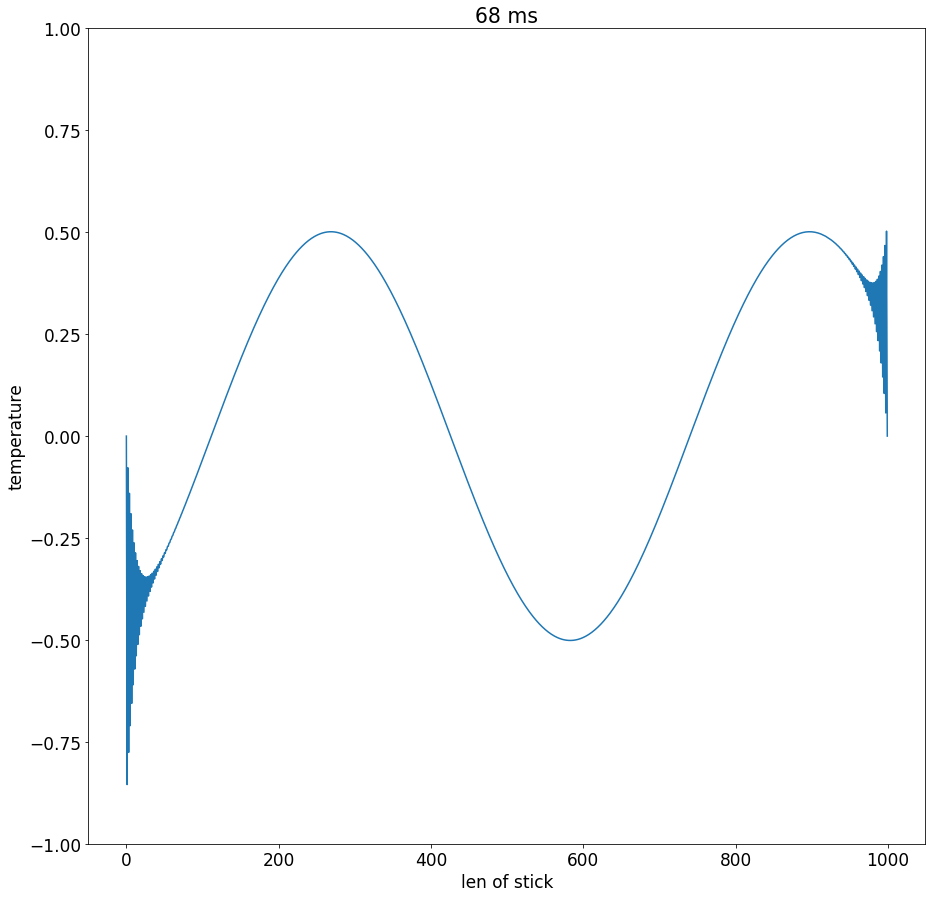

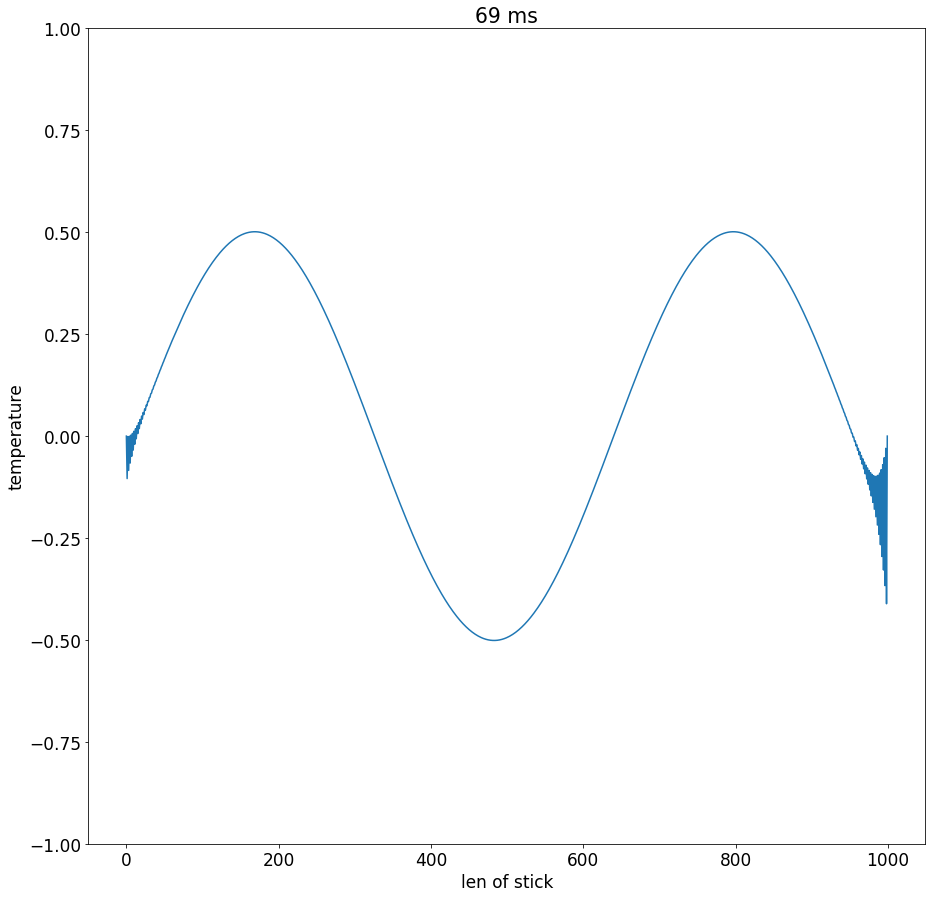

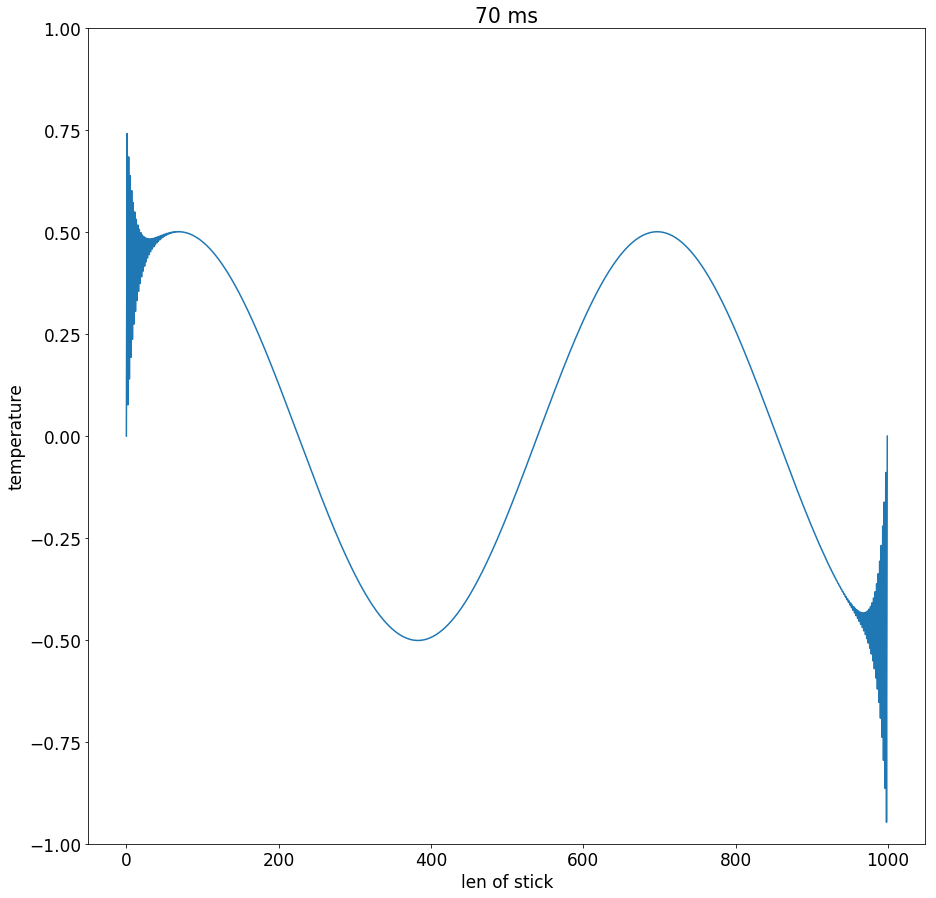

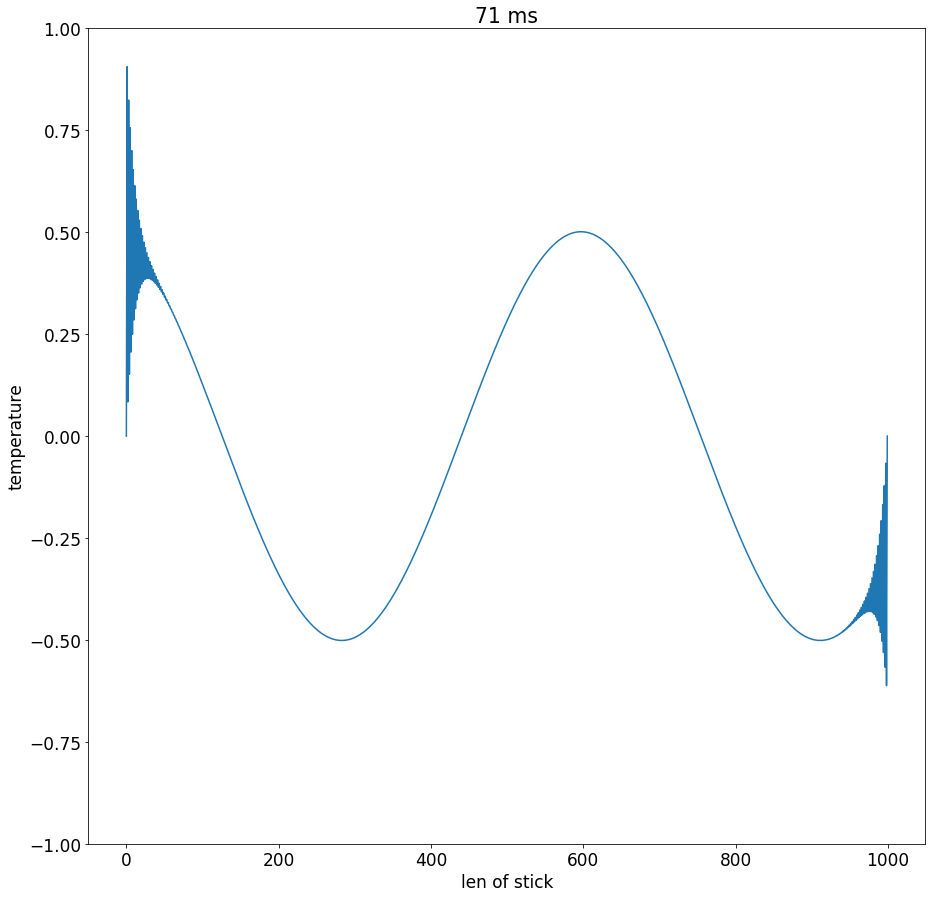

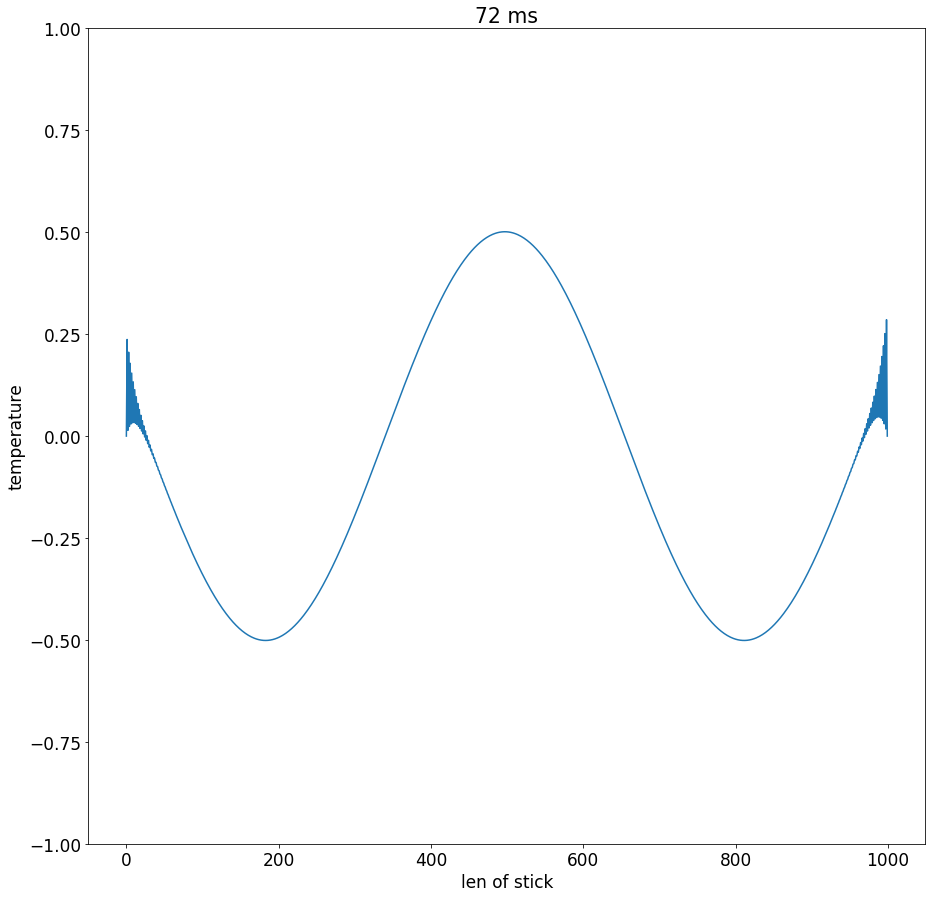

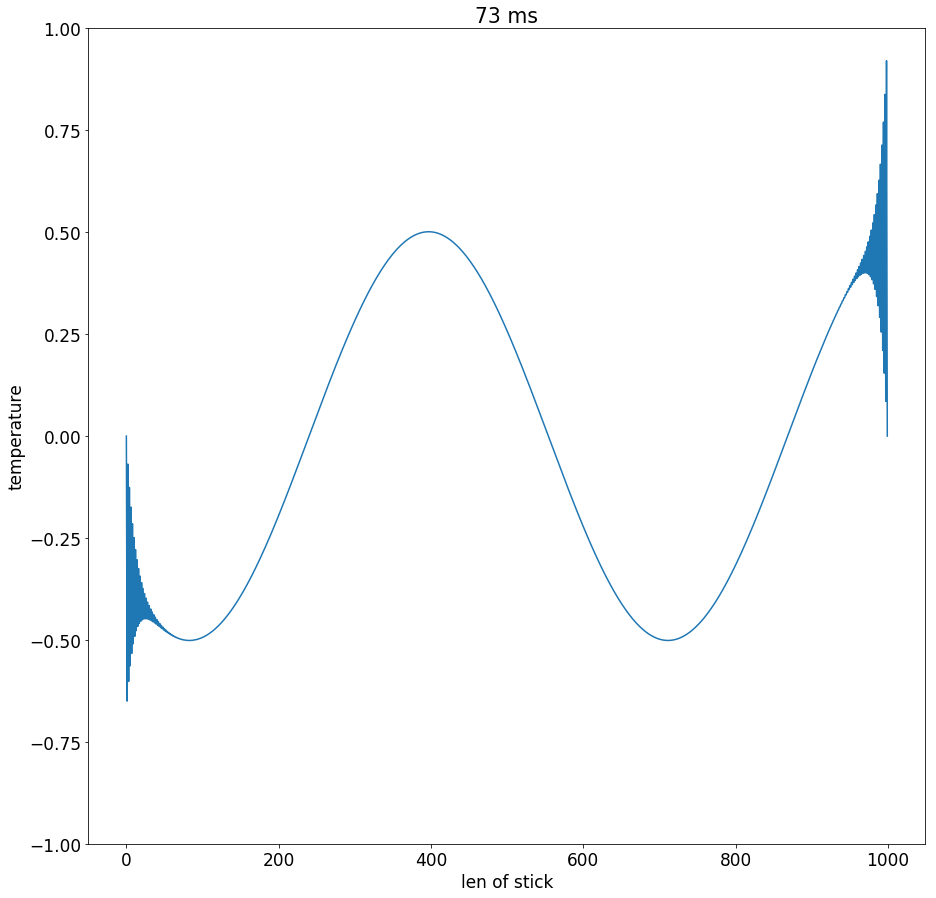

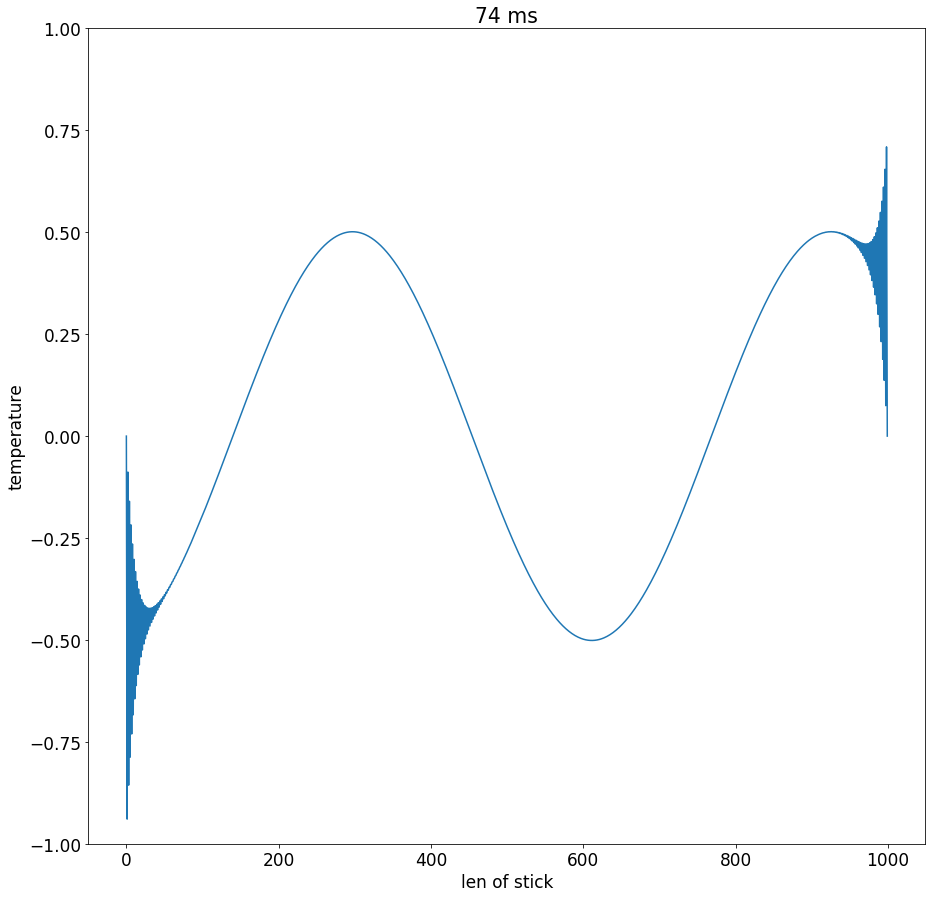

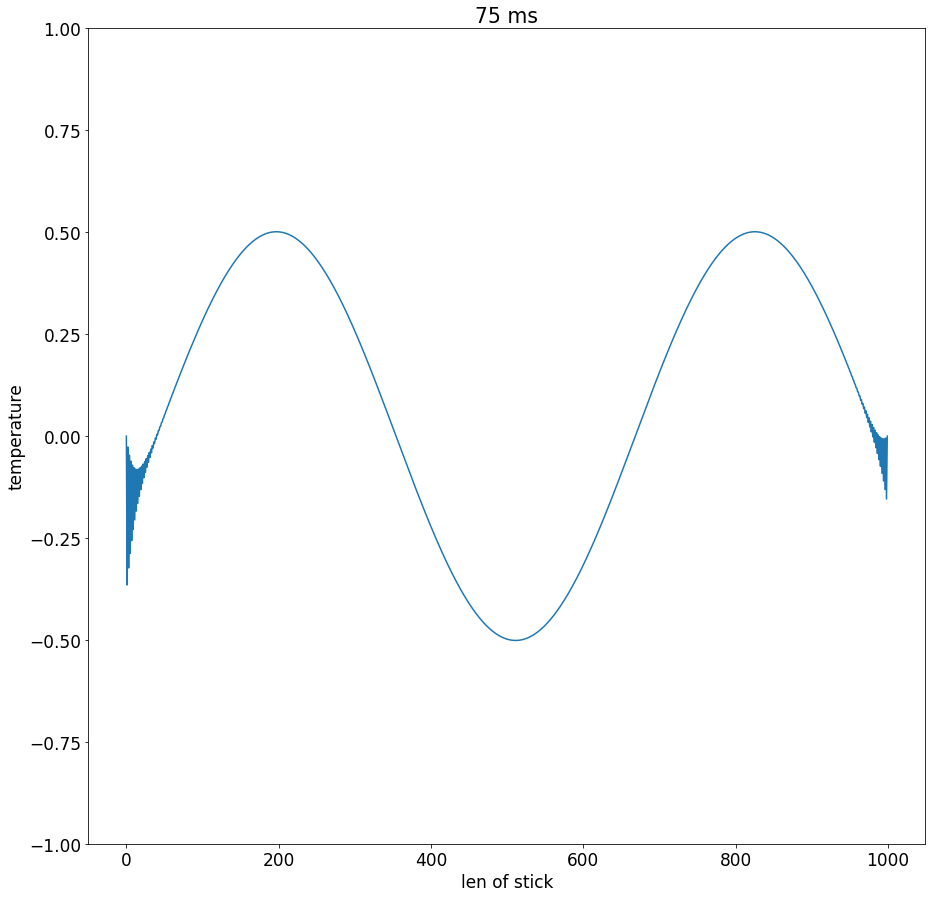

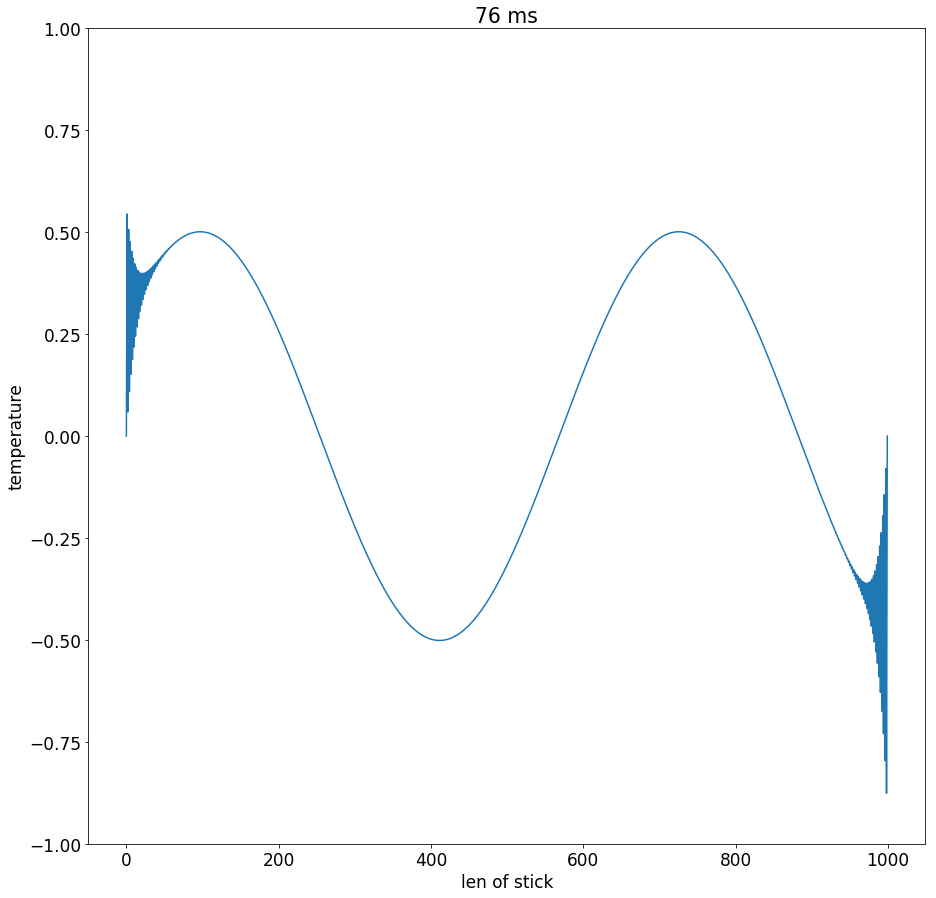

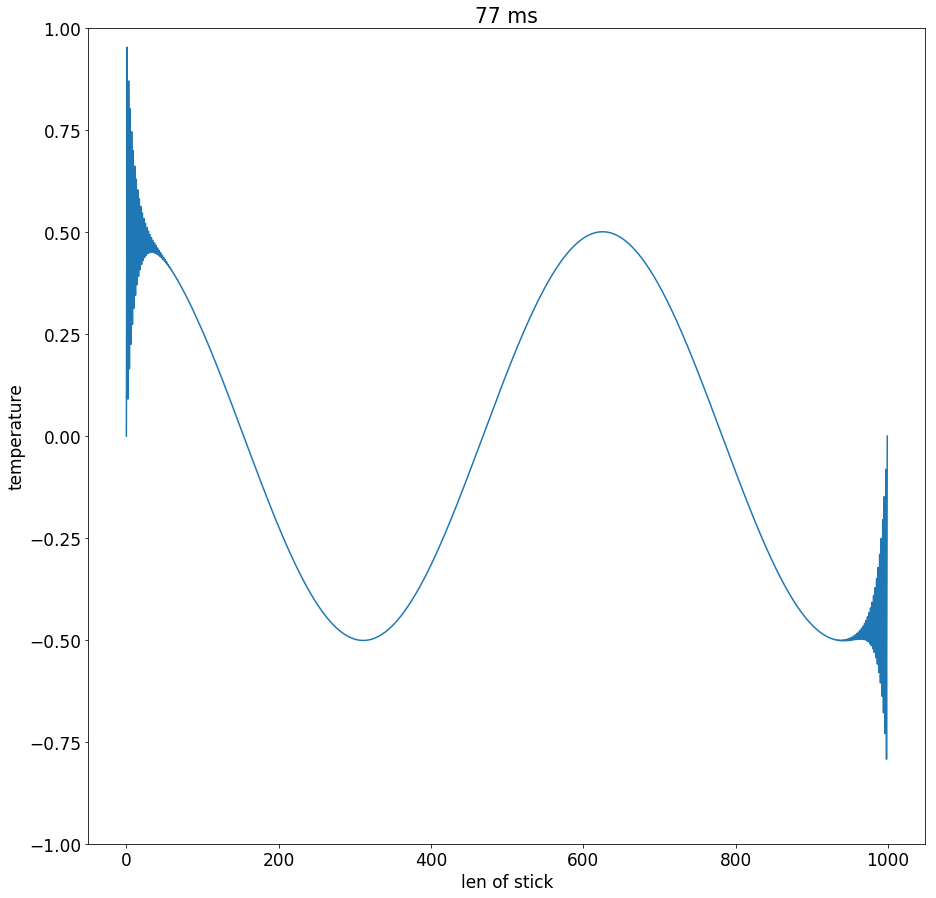

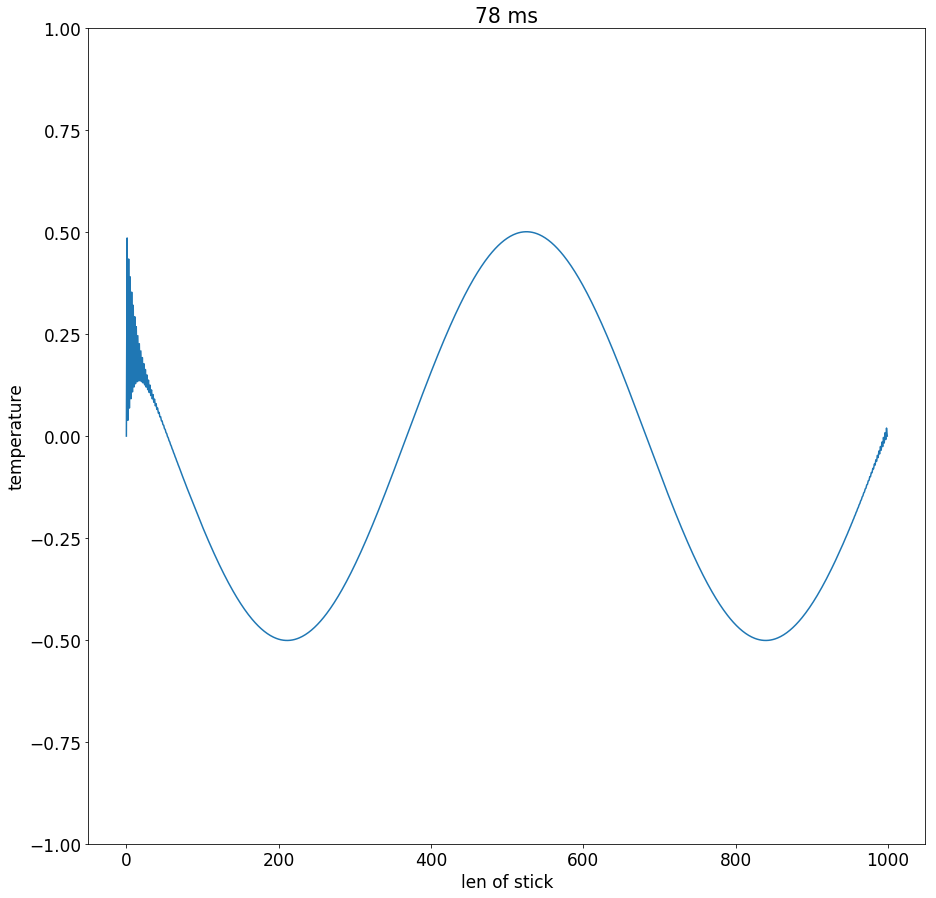

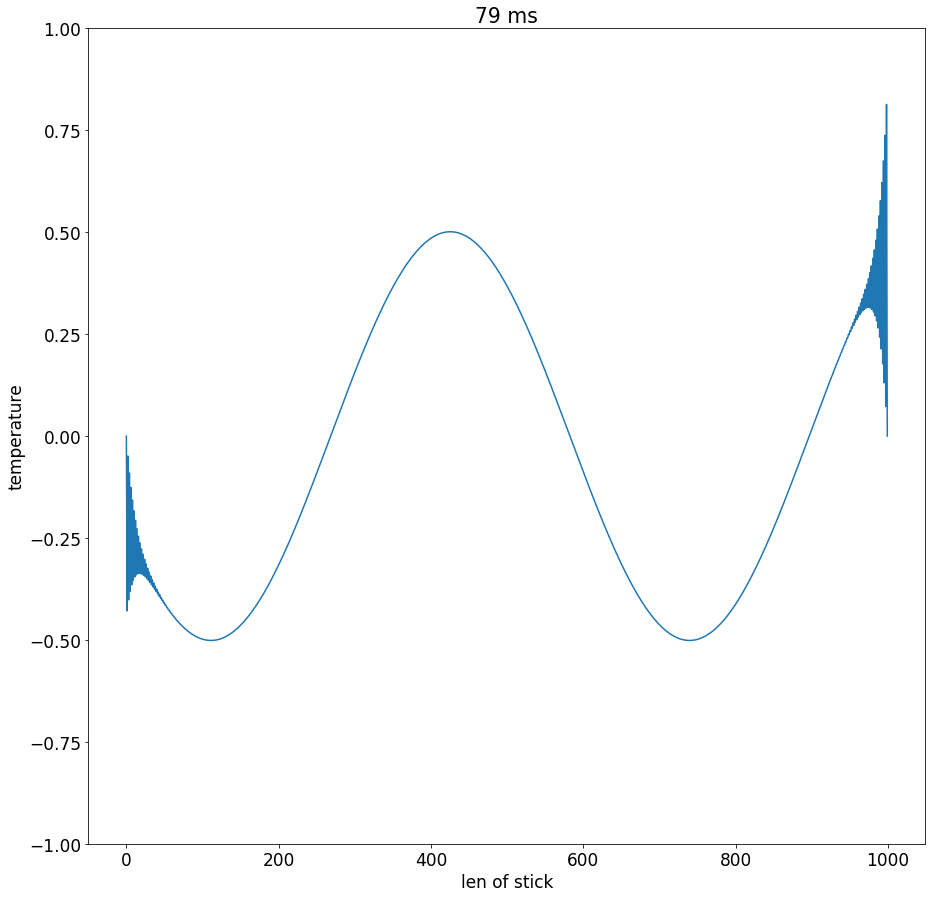

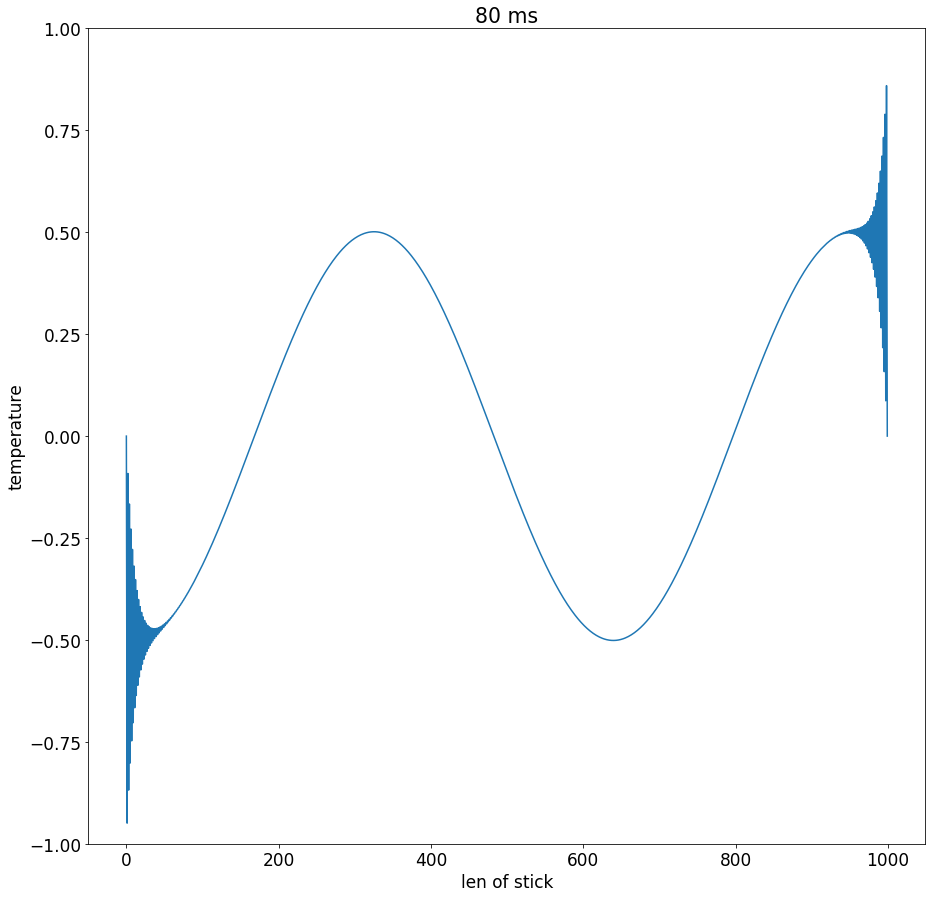

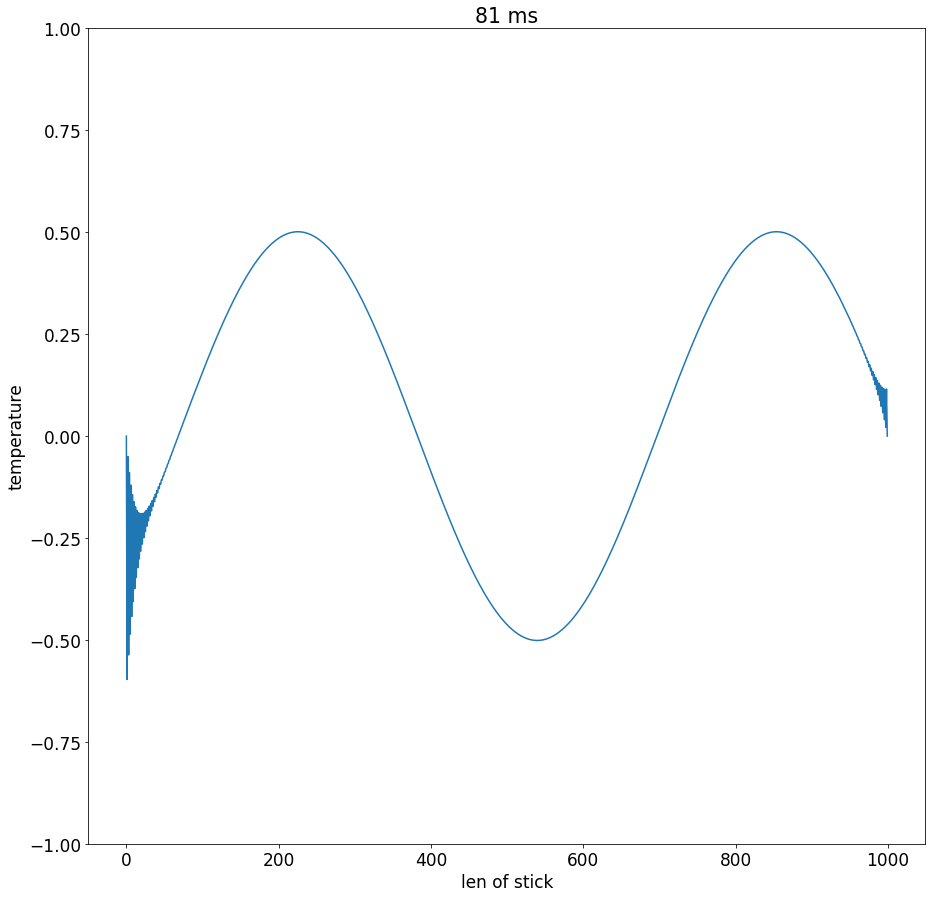

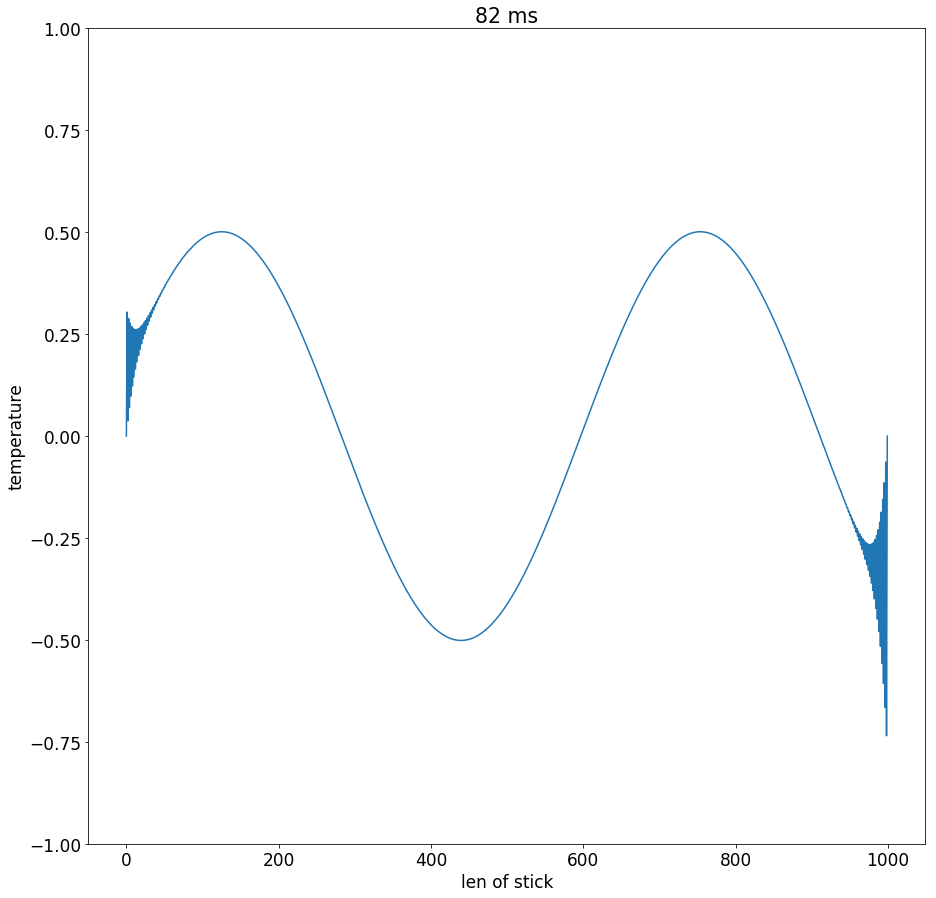

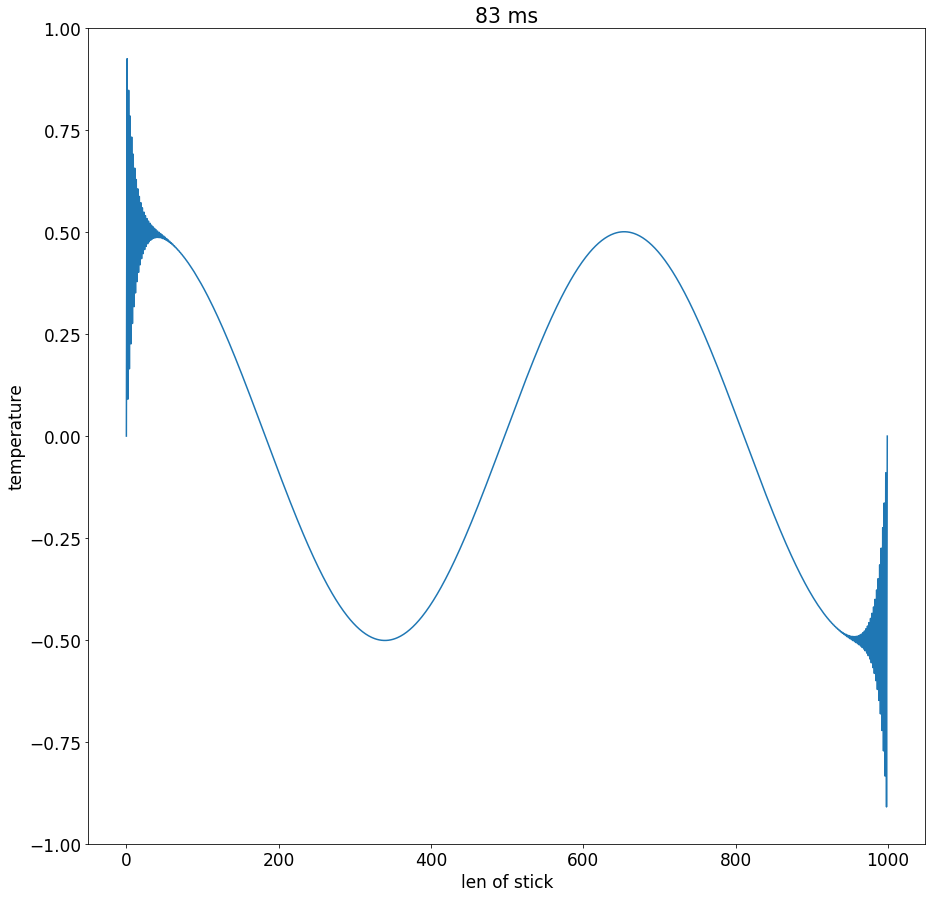

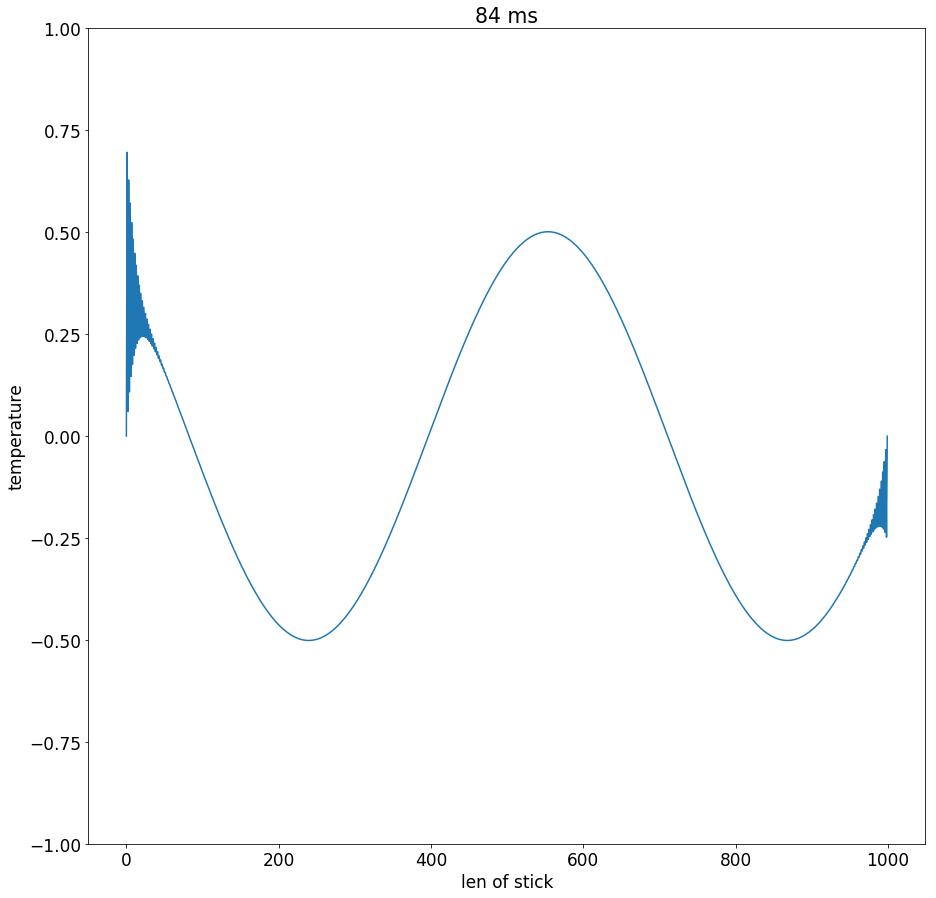

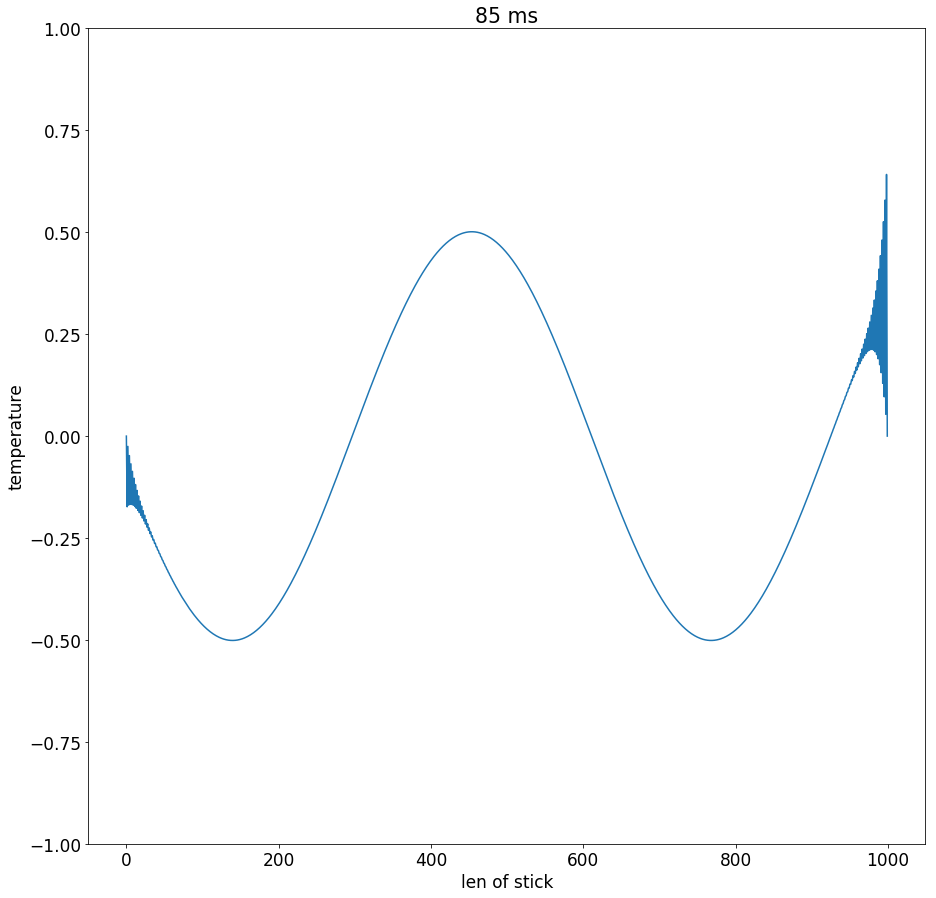

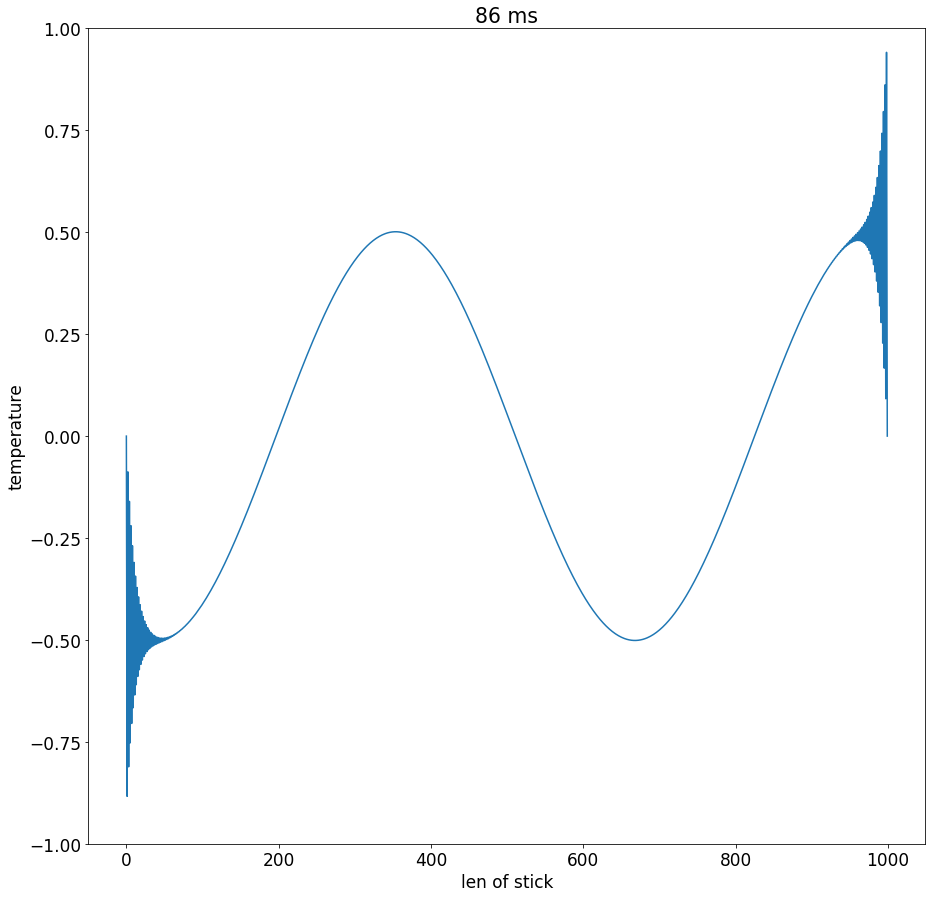

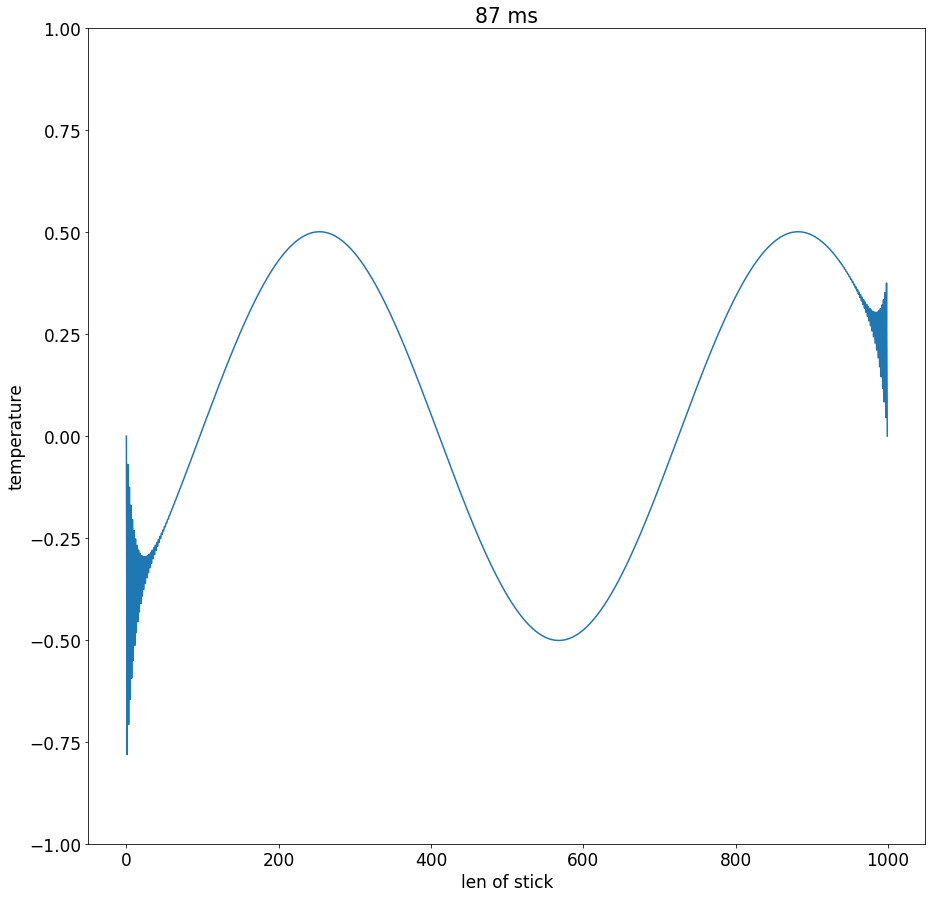

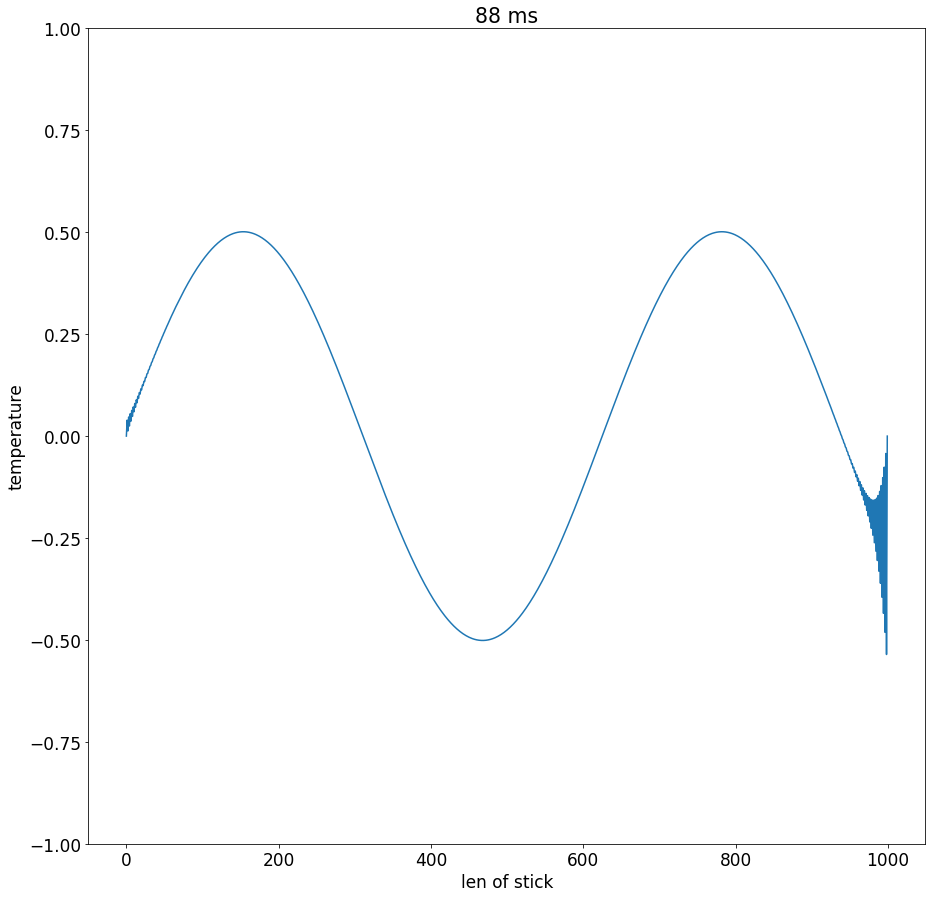

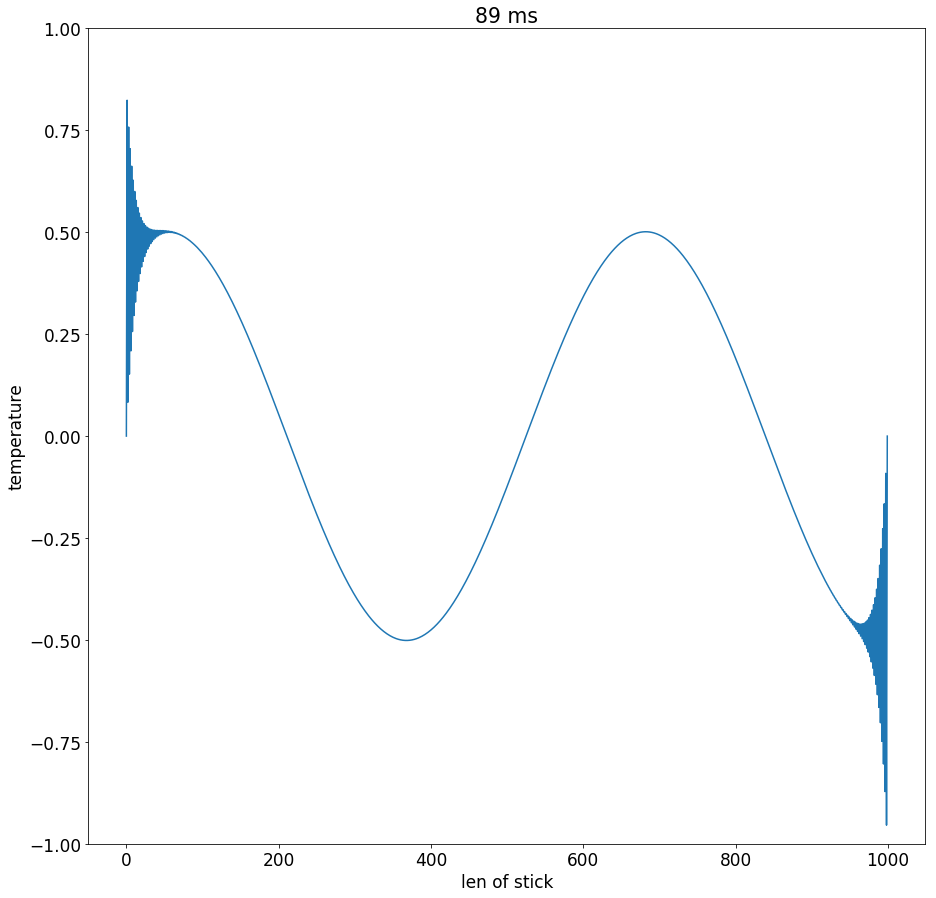

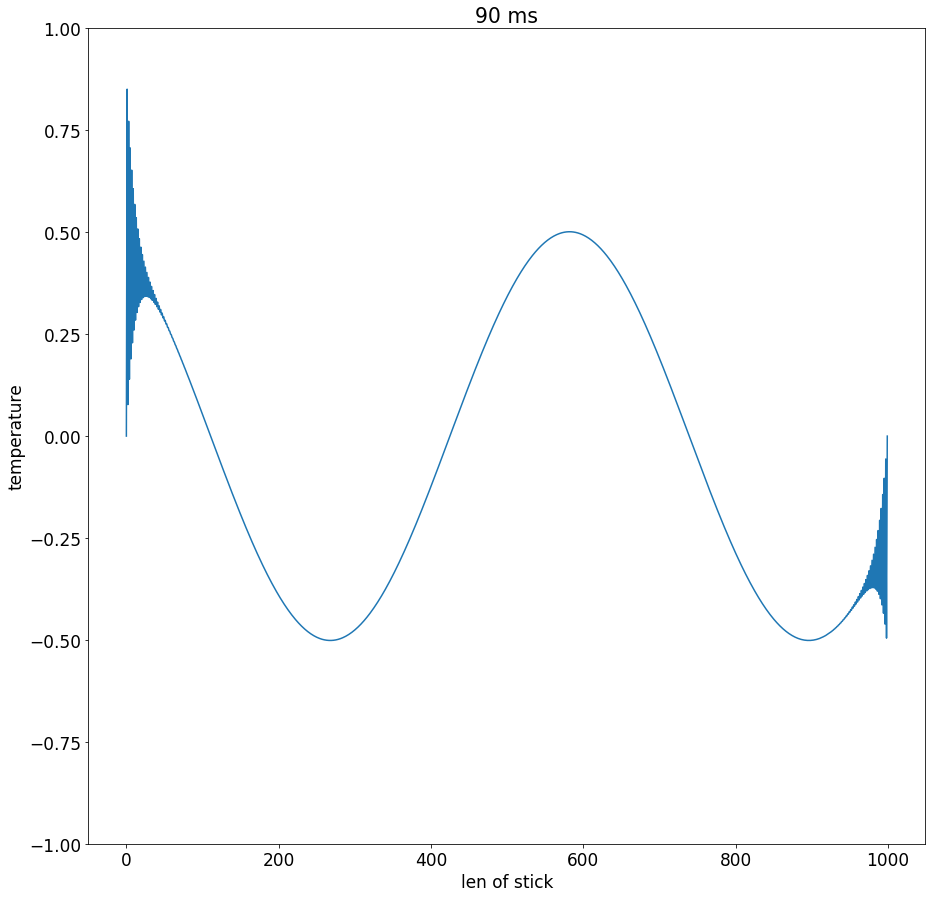

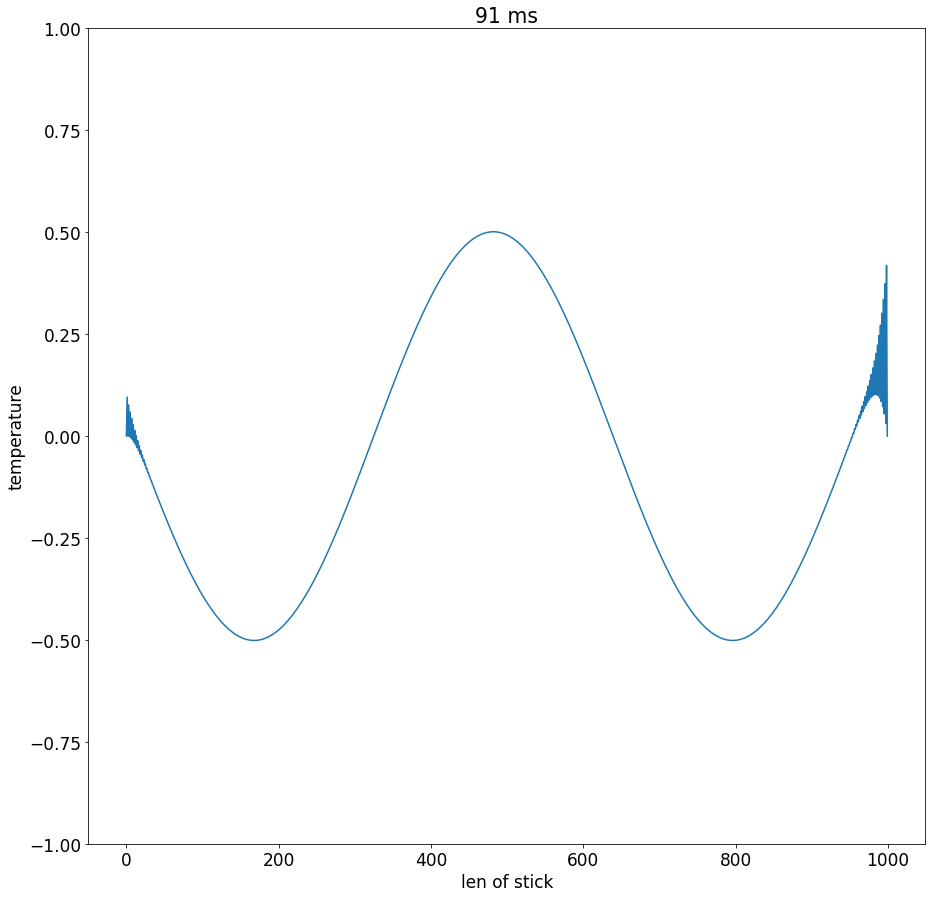

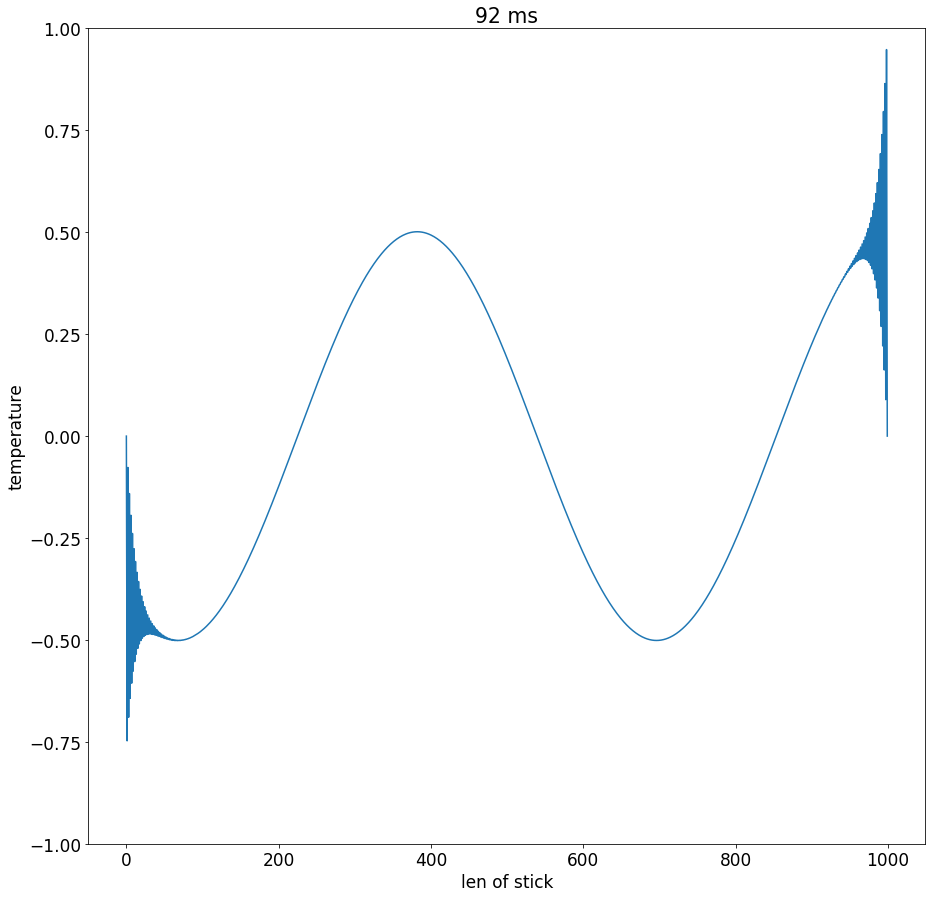

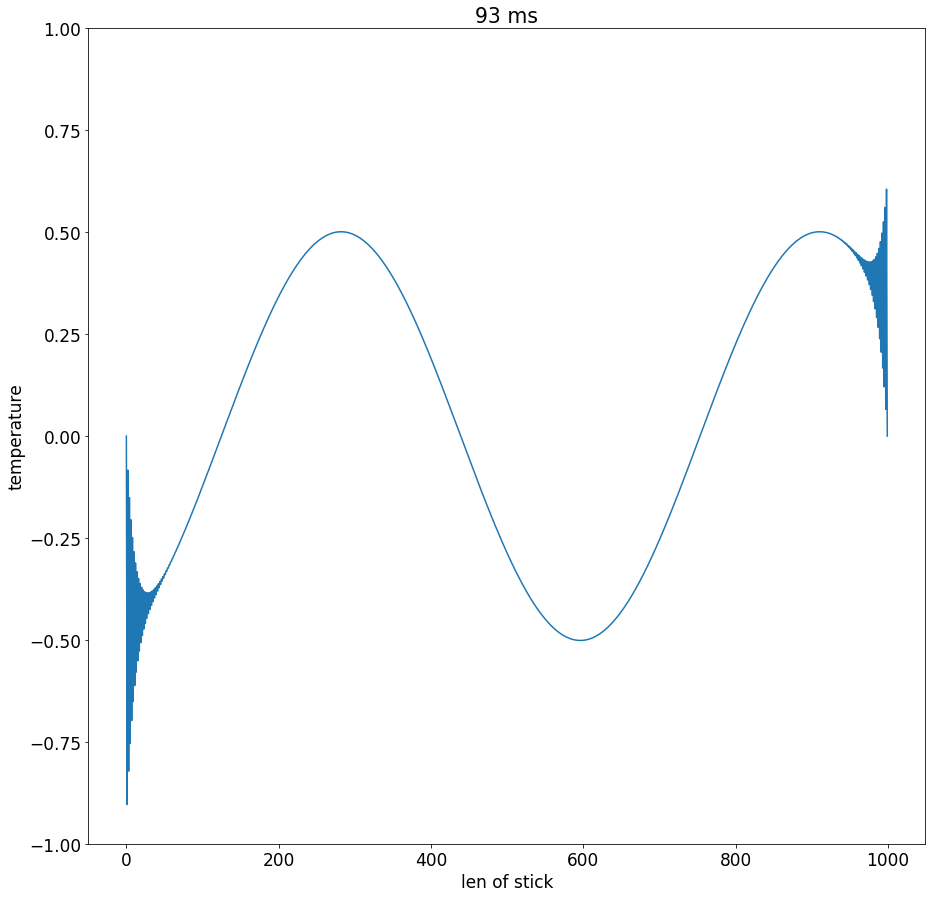

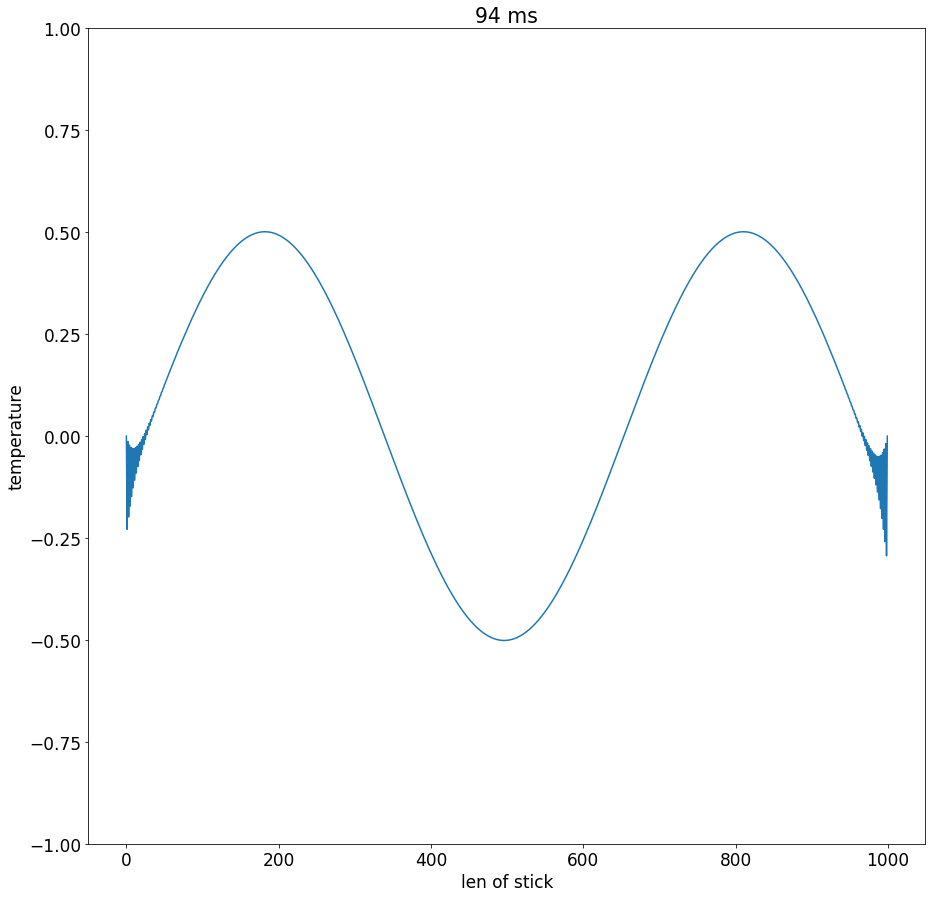

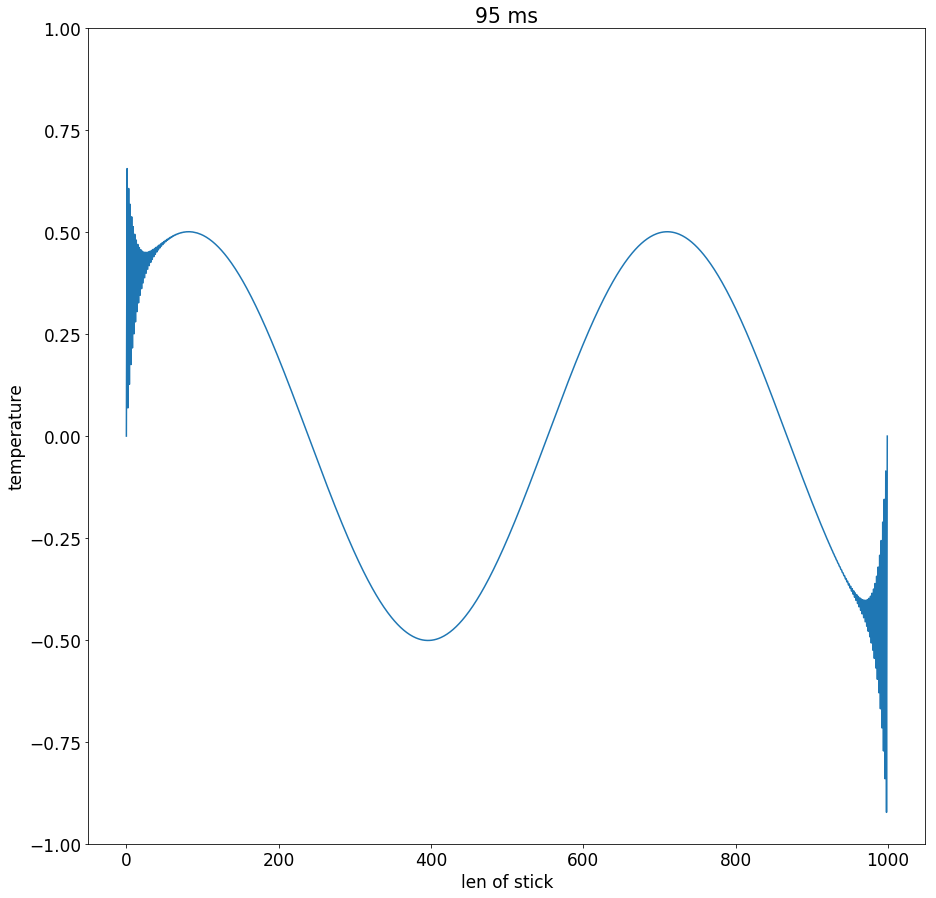

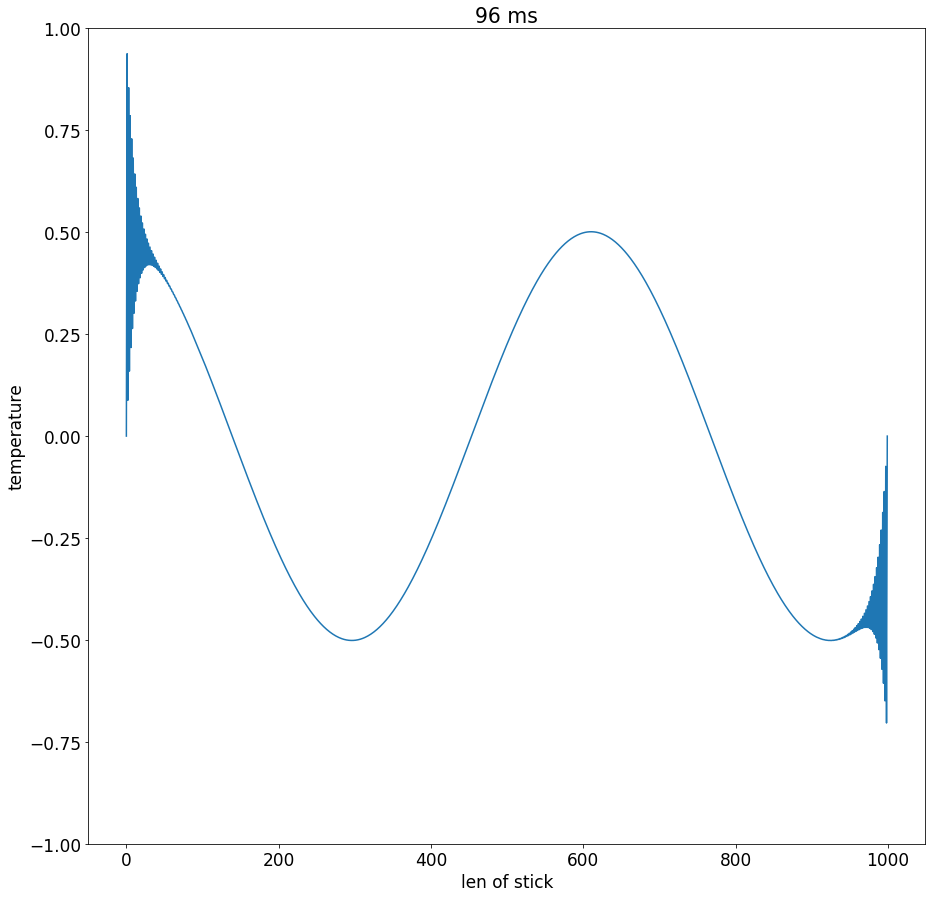

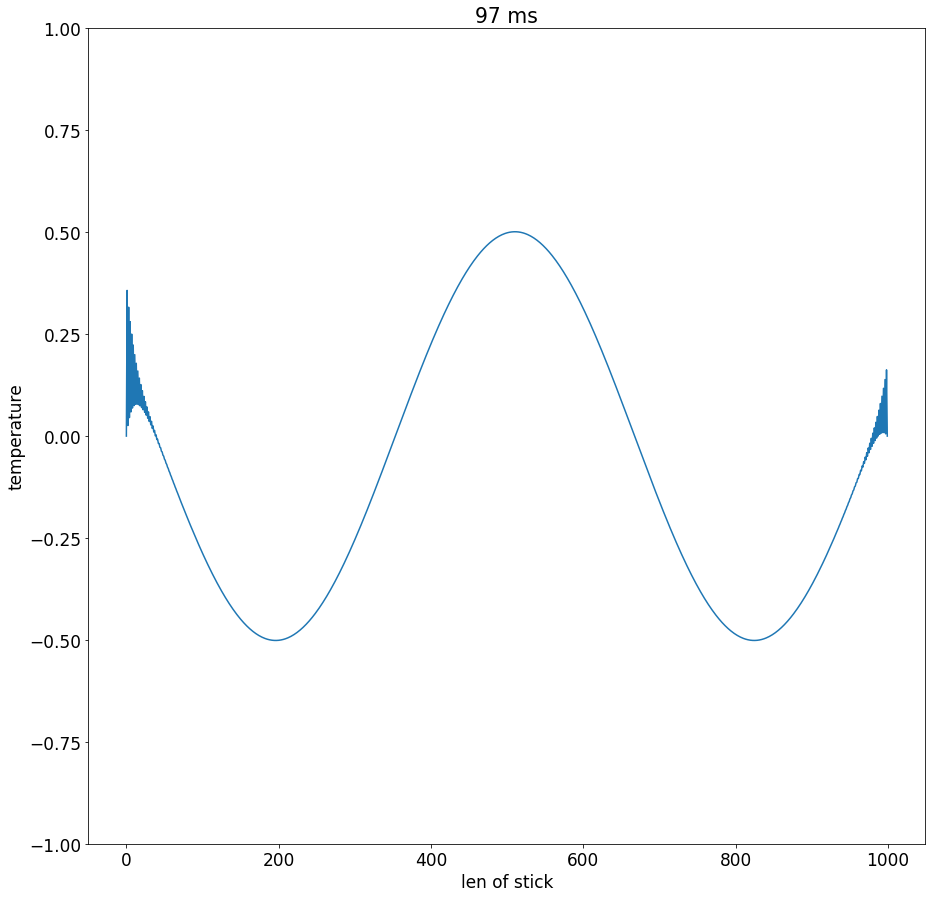

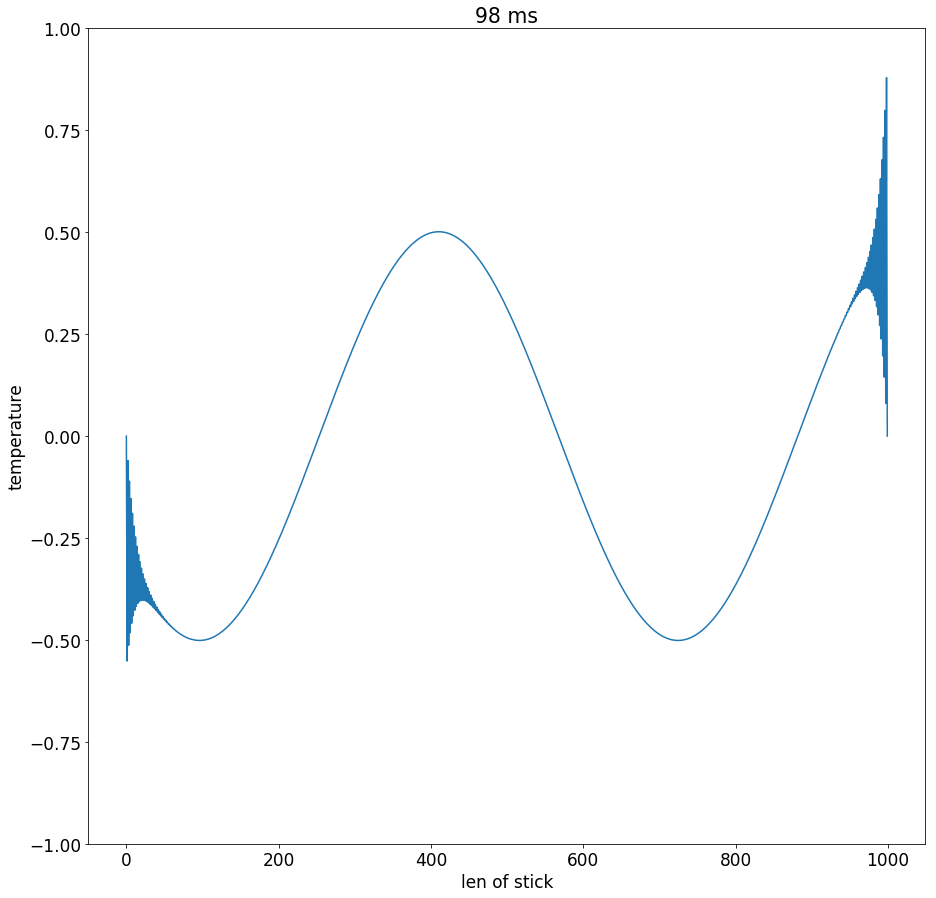

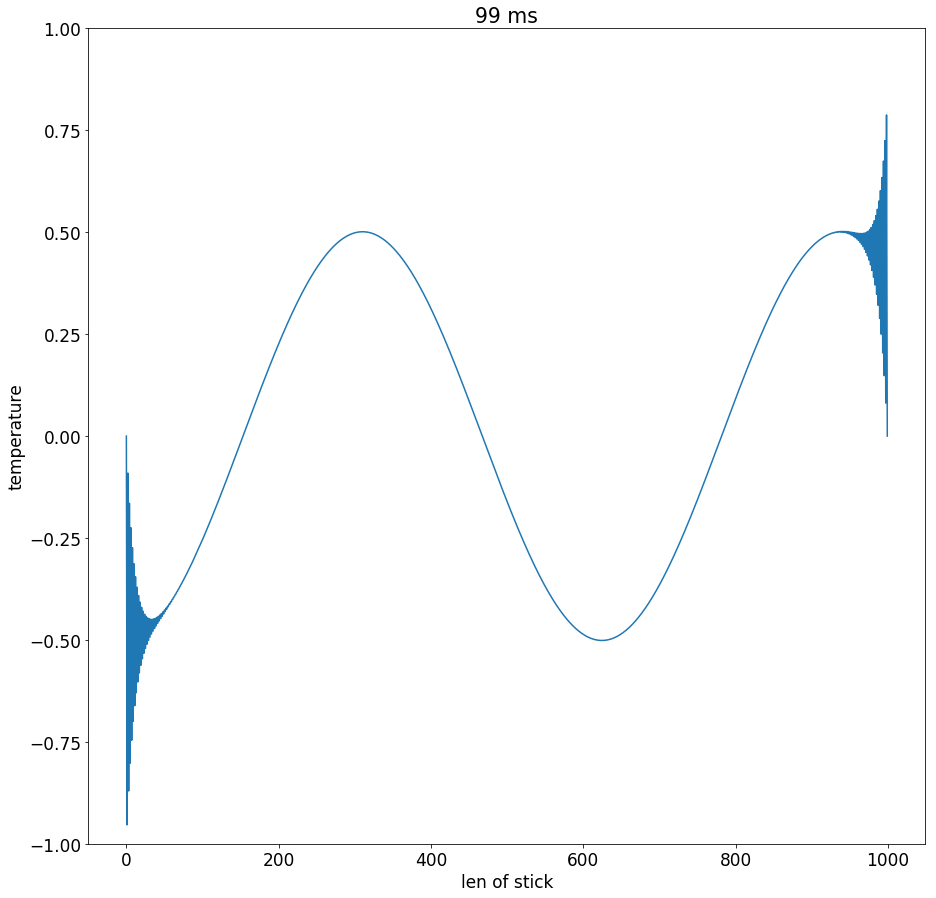

In [174]:
images = []
for i in range(100):
    images.append(MakeGif(i, 1))

In [175]:
imageio.mimsave('heat.gif', images, duration = 0.2)